# IBM HR Analytics Employee Attrition & Performance 

## Business task:
    Analysis of employees attrition & performance in order to improve epmloyees turnover and optimize HR strategy

## Datasource description:

Public datasets available on Kaggle: https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset

   Data is stored in a single csv file with 35 columns.
   IBM has gathered information on employee satisfaction, income, seniority and some demographics. 
   It includes the data of 1470 employees.

Licence: Open Database License (ODbL) 1.0 

Date: there is no information about the date on which data were gathered 

## Data cleaning and organization

In [31]:
# Import of libraries and files:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pylab
import shap

In [32]:
#Data import
data = pd.read_csv('C:/Users/korol/HR-Employee-Attrition.csv')
data.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...                         1            80                 0   
1  ...                         4            80                 1   
2  ...                         2            80                 0   
3  ...                         3            80                 0   
4  ...                         4            80                 1   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                  8                      0               1               6   
1                 10                      3               3              10   
2                  7                      3               3               0   
3                  8                      3               3               8   
4                  6                      3               3               2   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                  4                        0                     5  
1                  7                        1                     7  
2                  0                        0                     0  
3                  7                        3                     0  
4                  2                        2                     2  

[5 rows x 35 columns]

## Check NA and Duplicates

In [5]:
# Find NA values
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [7]:
# Find a duplicate rows
duplicates = data[data.duplicated()]
print(duplicates)

Empty DataFrame
Columns: [Age, Attrition, BusinessTravel, DailyRate, Department, DistanceFromHome, Education, EducationField, EmployeeCount, EmployeeNumber, EnvironmentSatisfaction, Gender, HourlyRate, JobInvolvement, JobLevel, JobRole, JobSatisfaction, MaritalStatus, MonthlyIncome, MonthlyRate, NumCompaniesWorked, Over18, OverTime, PercentSalaryHike, PerformanceRating, RelationshipSatisfaction, StandardHours, StockOptionLevel, TotalWorkingYears, TrainingTimesLastYear, WorkLifeBalance, YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager]
Index: []

[0 rows x 35 columns]


##### No duplicates and NA values were found

## Analysis of data: check distributions and identify dependencies

Let's start attrition distribution first:

[Text(0, 0.5, 'Employees'), Text(0.5, 1.0, 'Attrition distribution')]

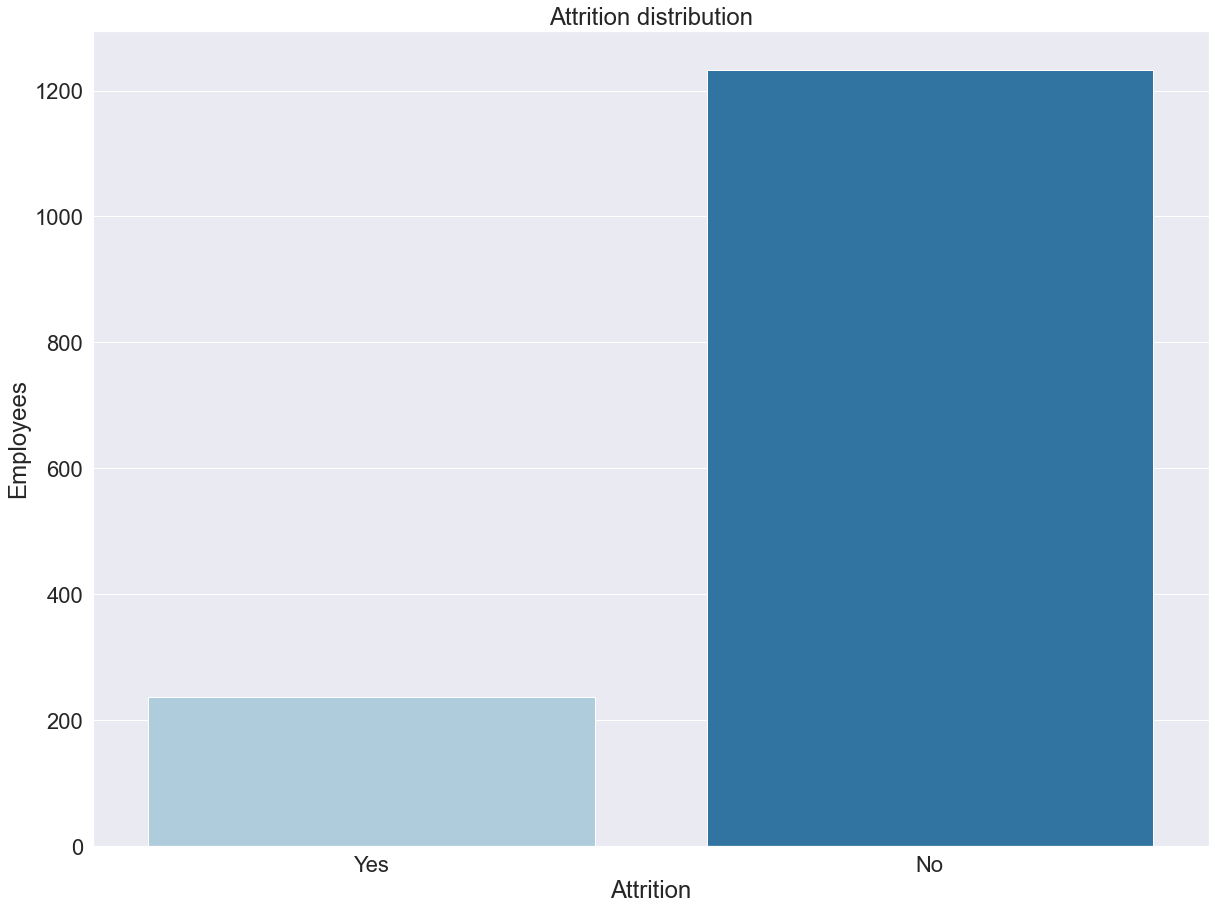

In [14]:
plt.figure(figsize=(20,15))
sns.set(font_scale=2)
g = sns.countplot(x = data['Attrition'],data = data,palette = 'Paired')
g.set(ylabel='Employees', title = 'Attrition distribution')


Attrition is a loss of employees through a natural process, such as retirement, resignation, elimination of a position, personal health, or other similar reasons. 
Usually attrition considered more of an amicable or a cordial departure from the organization.

However, it anyway can lead to the increase of workload for other employees, loss of expertise, productivity or increase of onboarding and training costs.

As we can see in IBM around 20% of employees have left or are about to leave. We will need to dive deeper to find the reasons


### Analysis of individual characteristics of employees

First, I will check how non-job factors affect Attrition rate

Hypotheses:
1. Female employees leave the company more often (assuming that the discrimination exists)
2. Young and old employees leave the compnay more often than middle age due to looking for a new career path (for a faster growth) or retirement
3. People with Bachelor or Master degree in Marketing, Engeneering, Human Resources or Other leave company more often because it is easier to find another position in another companies
4. Single employees leave company more often than others, because they have fewer obligations
 

[Text(0, 0.5, 'Employees'), Text(0.5, 1.0, 'Gender distribution')]

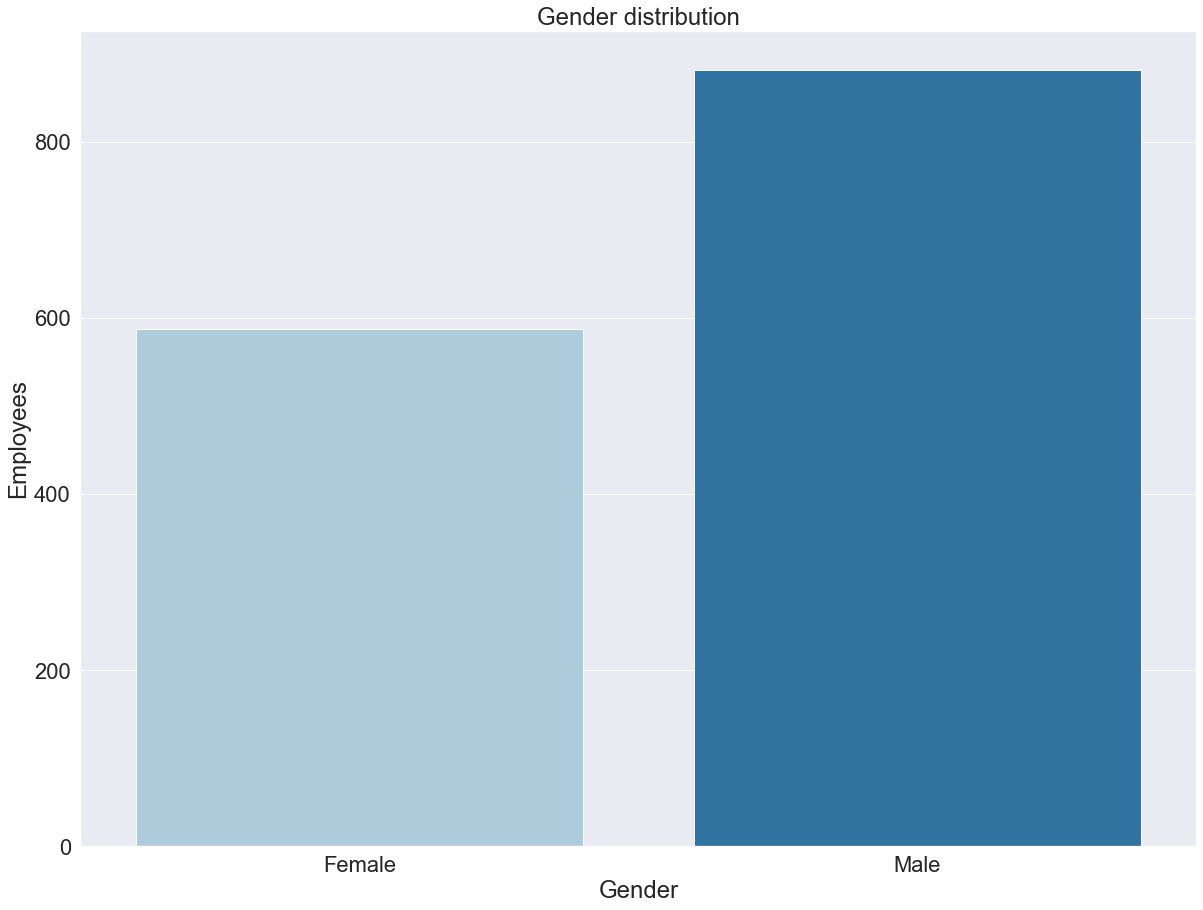

In [15]:
#Gender analysis
plt.figure(figsize=(20,15))
sns.set(font_scale=2)
g = sns.countplot(x = data['Gender'],data = data,palette = 'Paired')
g.set(ylabel='Employees', title = 'Gender distribution')

There are on 30% more men in the company than women

[Text(0, 0.5, 'Employees'),
 Text(0.5, 1.0, 'Attrition distribution with gender split')]

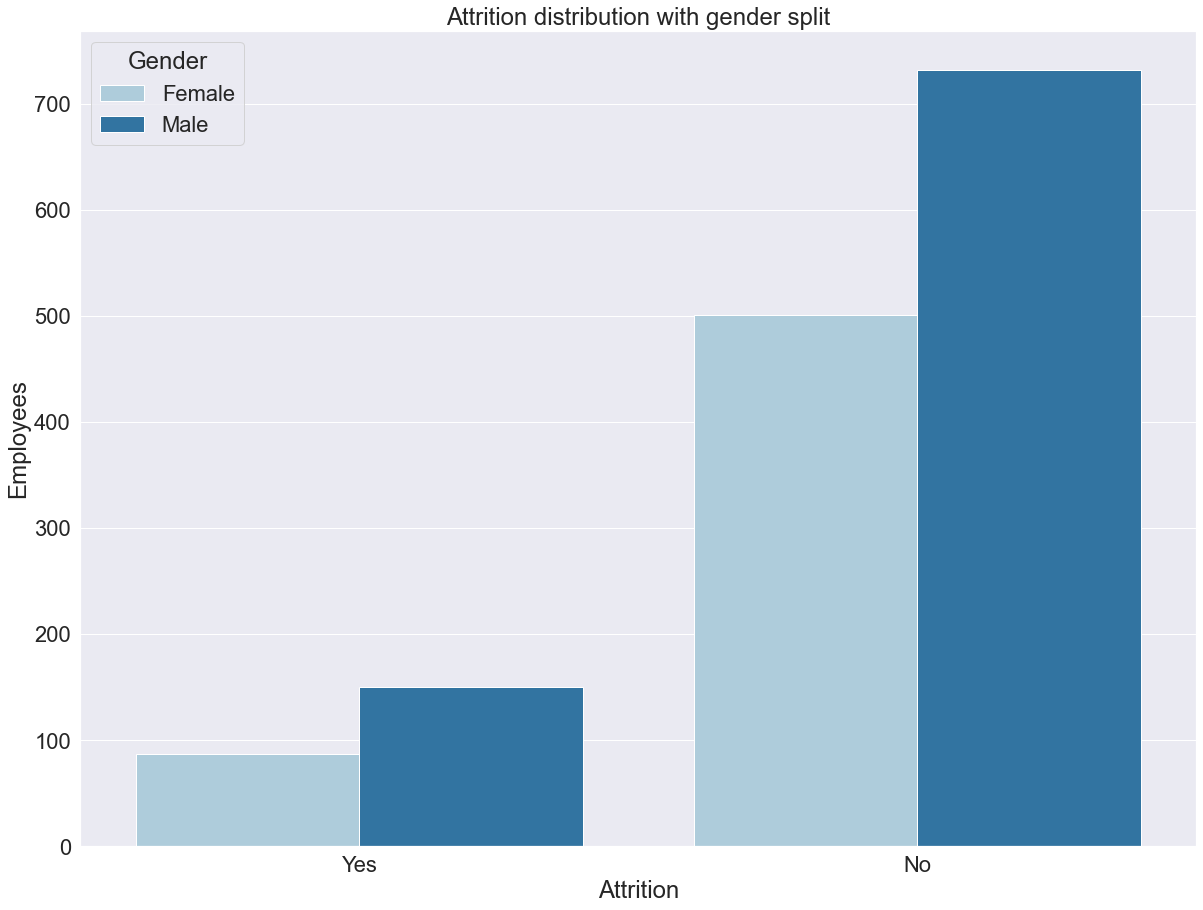

In [16]:
plt.figure(figsize=(20,15))
sns.set(font_scale=2)
g = sns.countplot(x = data['Attrition'],data = data,palette = 'Paired', hue = 'Gender')
g.set(ylabel='Employees', title = 'Attrition distribution with gender split')


In general the same % (17%) of women and men are about to leave the company. This can give us an idea that gender is not a key factor when we are looking at attrition rate. So we can say that women leave the company as often as men. 

Thus, the first hypothesis was wrong
We should continue investigation and check other factors which can affect attrition. 


[Text(0.5, 1.0, 'Age distribution in IBM')]

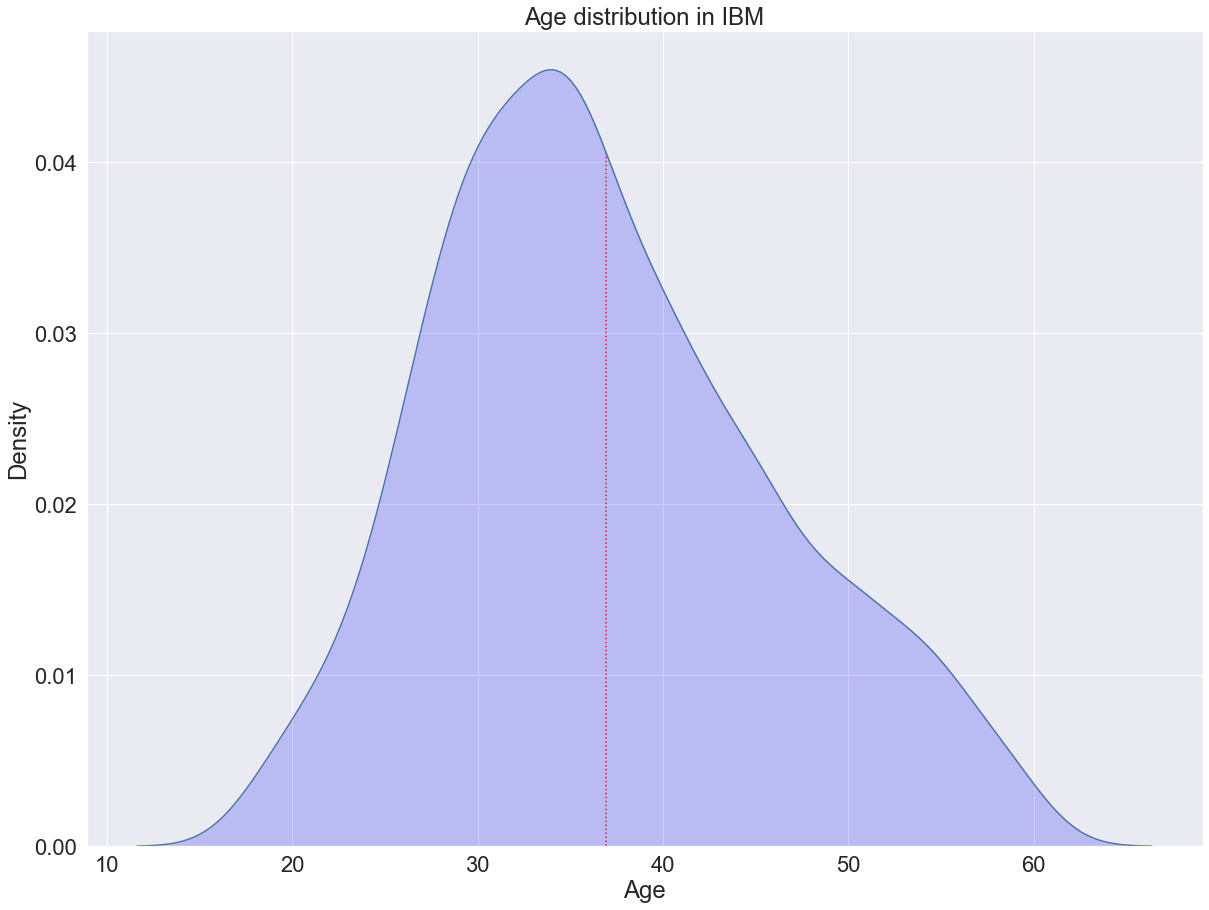

In [17]:
#Age analysis
#Average age in the company
plt.figure(figsize=(20,15))
sns.set(font_scale=2)
ax =sns.kdeplot(x='Age',
             palette = 'Paired',
             data=data)
            # kind="kde", bw_adjust=0.5,fill=True)
kdeline = ax.lines[0]
mean = data['Age'].mean()
xs = kdeline.get_xdata()
ys = kdeline.get_ydata()
height = np.interp(mean, xs, ys)
ax.vlines(mean, 0, height, color='crimson', ls=':')
ax.fill_between(xs, 0, ys, facecolor='blue', alpha=0.2)
ax.set(title = 'Age distribution in IBM')

Gender
Female    37.329932
Male      36.653061
Name: Age, dtype: float64

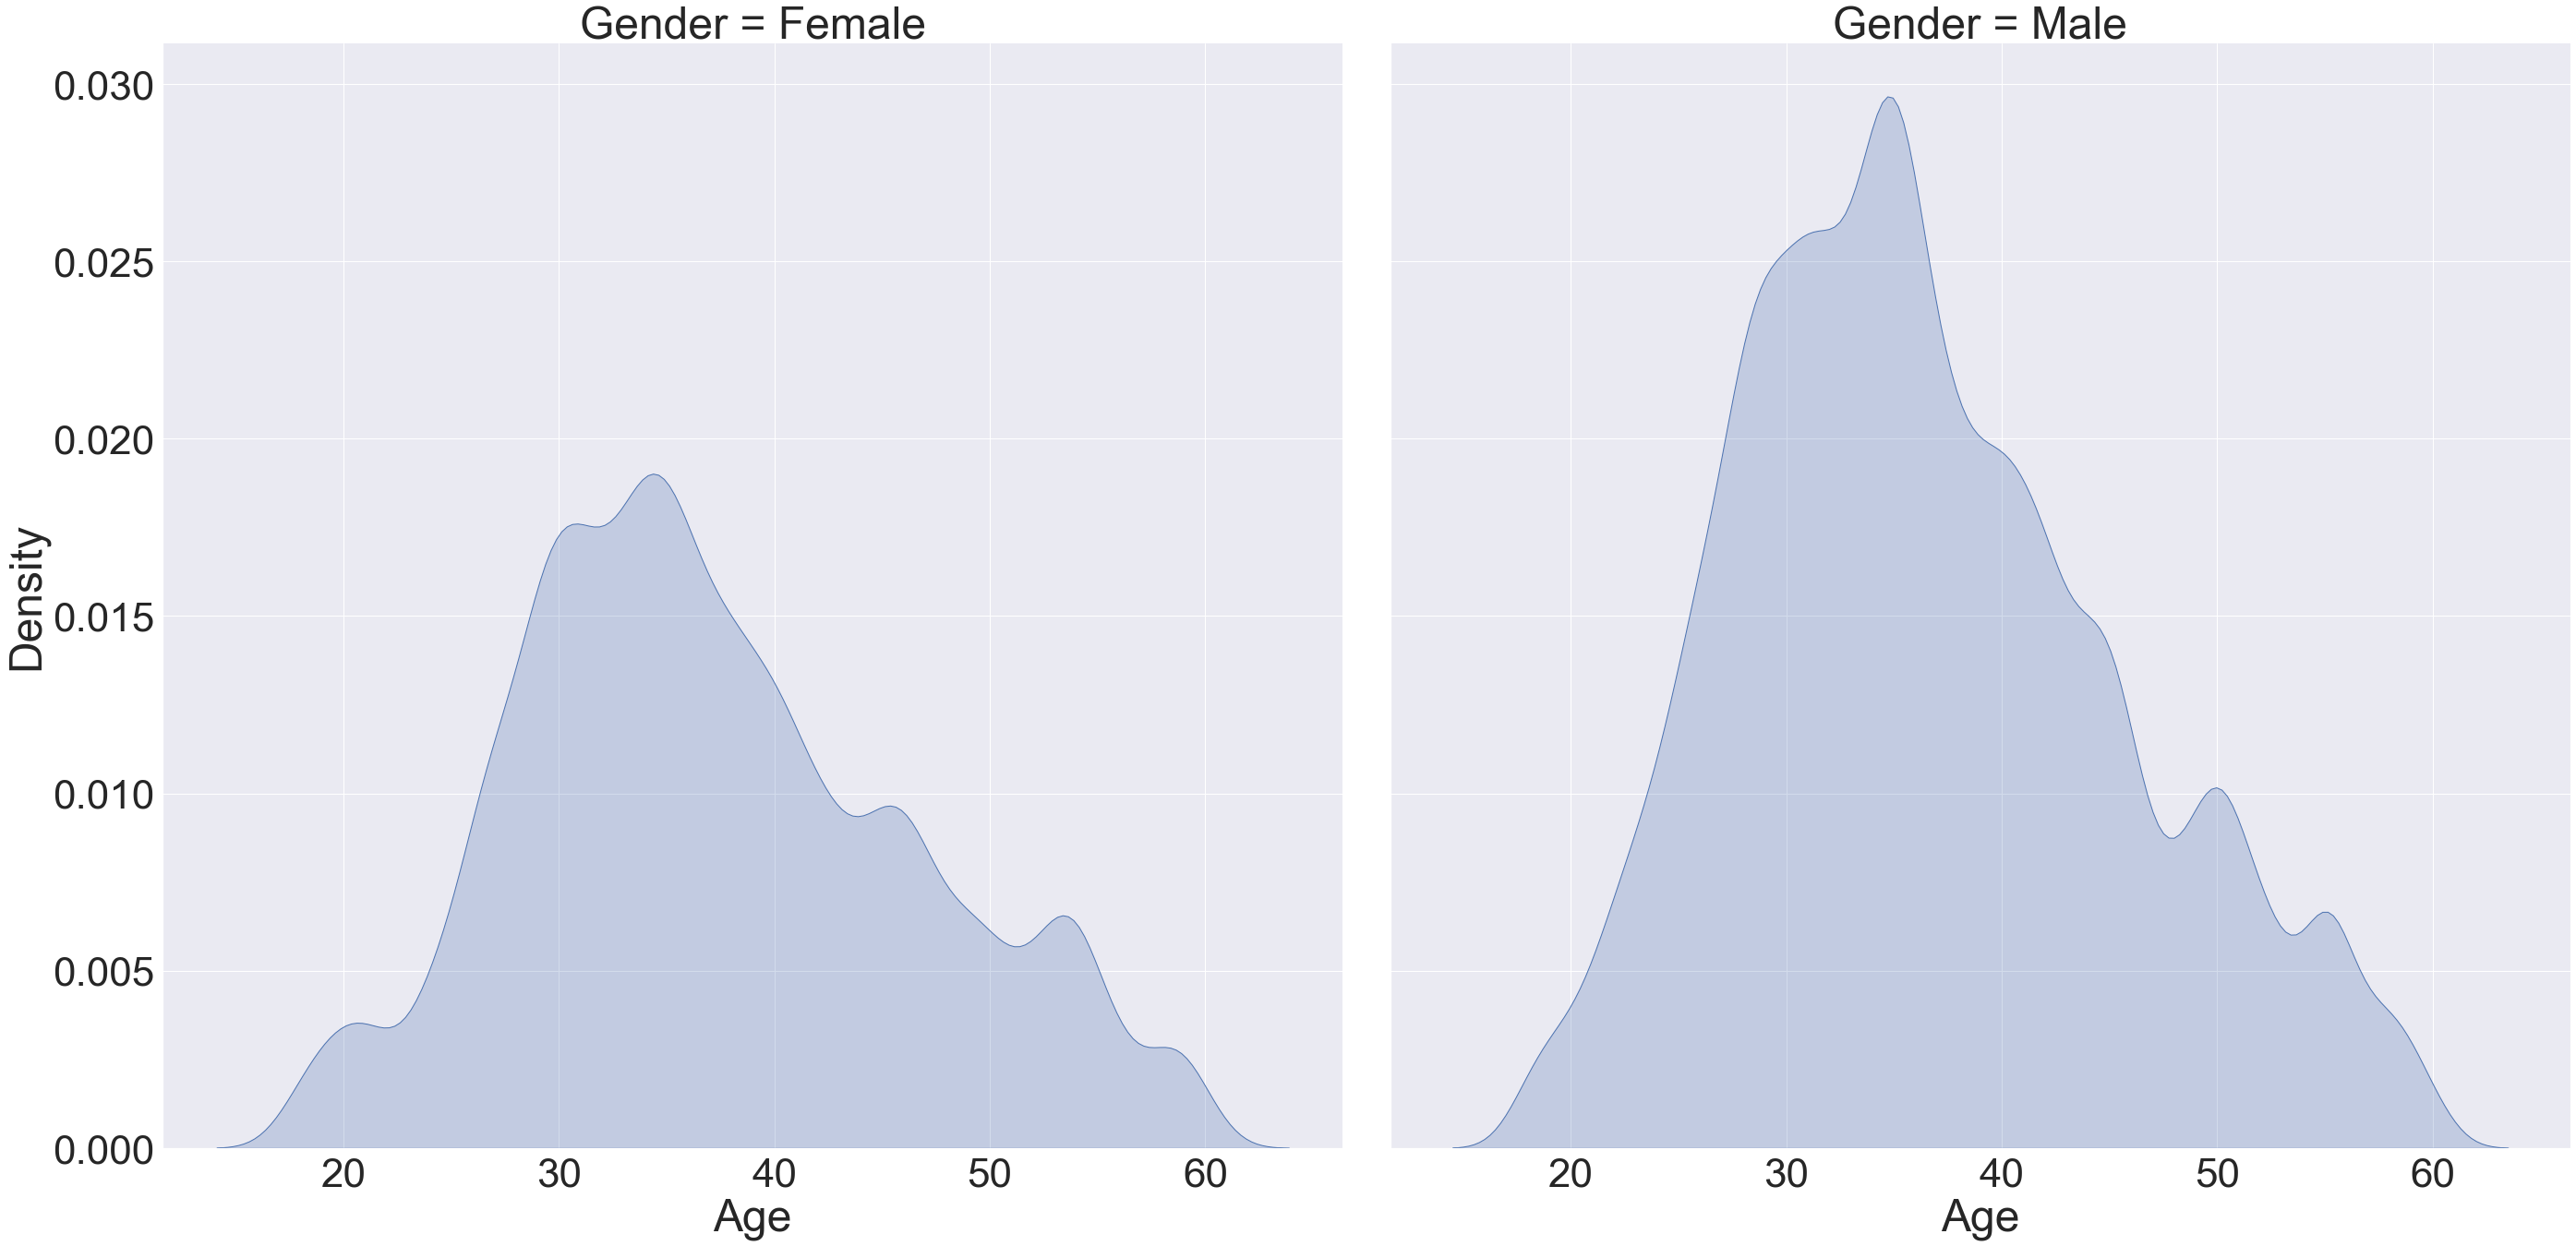

In [26]:
#Average age of men and women
sns.set(font_scale=4)
ax =sns.displot(x='Age',
             data=data,
             col = 'Gender',
             kind="kde", bw_adjust=0.5,fill=True,
             height = 20)

data.groupby('Gender').Age.mean()

In [33]:
#Group workers by age and check the attrition distibution
def agegroup(age):
    x=''
    if age>=18 and age< 25:
        x = 'Young adults'
    elif age>=25 and age<35:
        x = 'Adults'
    elif age>=35 and age<45:
        x = 'Middle-aged adults'
    elif age>=45 and age<60:
        x = 'Senior-aged adults'
    else:
        x = 'Old-aged adults'
    return x

data.insert(1, "AgeGroup", data["Age"])
data = data.assign(AgeGroup = data.Age)
data["AgeGroup"]=data["AgeGroup"].apply(agegroup)

[Text(0, 0.5, 'Employees'), Text(0.5, 1.0, 'Attrition based on age group')]

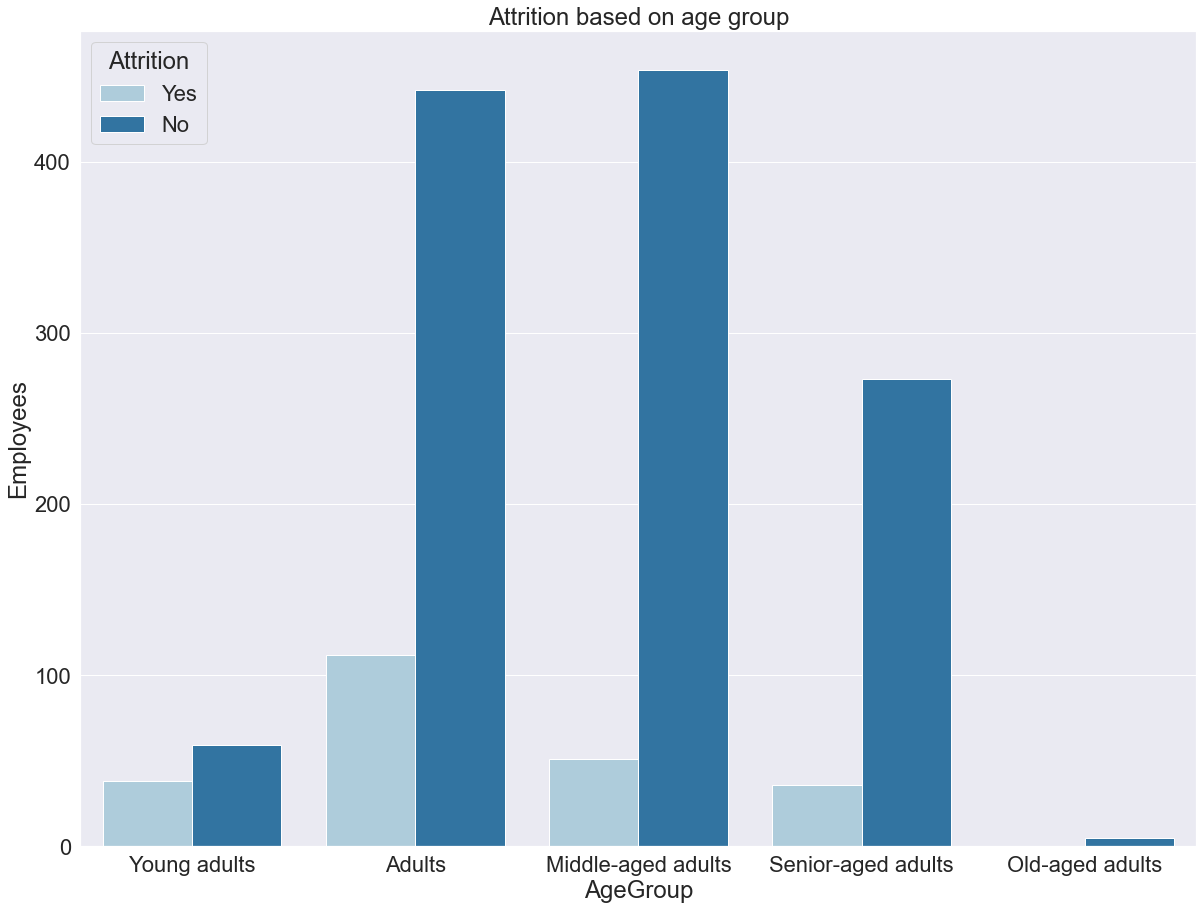

In [34]:
plt.figure(figsize=(20,15))
sns.set(font_scale=2)
order_list = ['Young adults','Adults','Middle-aged adults','Senior-aged adults','Old-aged adults']
g = sns.countplot(x = data['AgeGroup'],data = data,palette = 'Paired', hue = 'Attrition', order = order_list )
g.set(ylabel='Employees', title = 'Attrition based on age group')

As we can see the distribution of age for men and women is quite similar as well as average age.
Average age in the company is around 37.

As for our second hypothesis, it is partially true: young  and adult specialists leave the company more often. It can be explained by the fact, that in this age people are looking for a fast growth or may be a career change.
While in age from 35 and older people already found their place, so there is no need to look for something else. 
Plus, it is also related to the world change: younger generations are mostly focused on opening their own companies or work in a flexible way, while the older generation is mostly focused on stability and keeping the position


As a next step we will have a look at education and marital status of employees.

<AxesSubplot:ylabel='EducationField'>

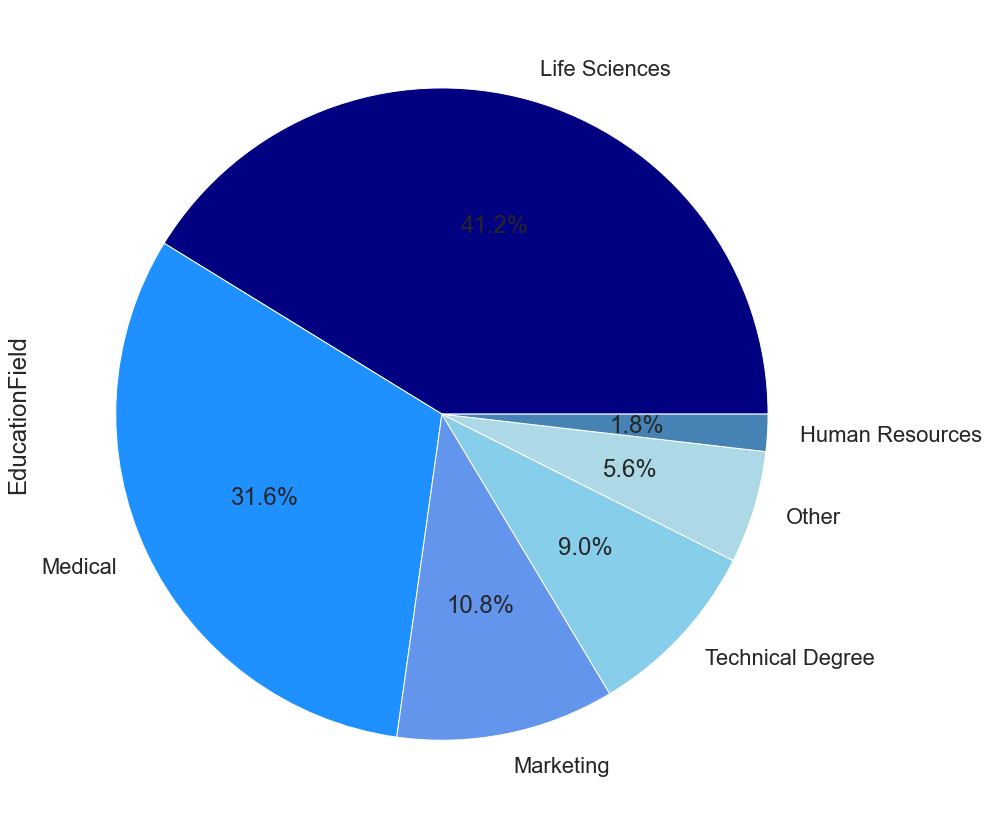

In [35]:
# Education analysis
plt.figure(figsize=(20,15))
sns.set(font_scale=2)
data['EducationField'].value_counts().plot.pie(autopct='%1.1f%%',colors = ['navy', 'dodgerblue','cornflowerblue', 'skyblue','lightblue', 'steelblue'])               

[Text(0, 0.5, 'Employees'), Text(0.5, 1.0, 'Education distribution in IBM')]

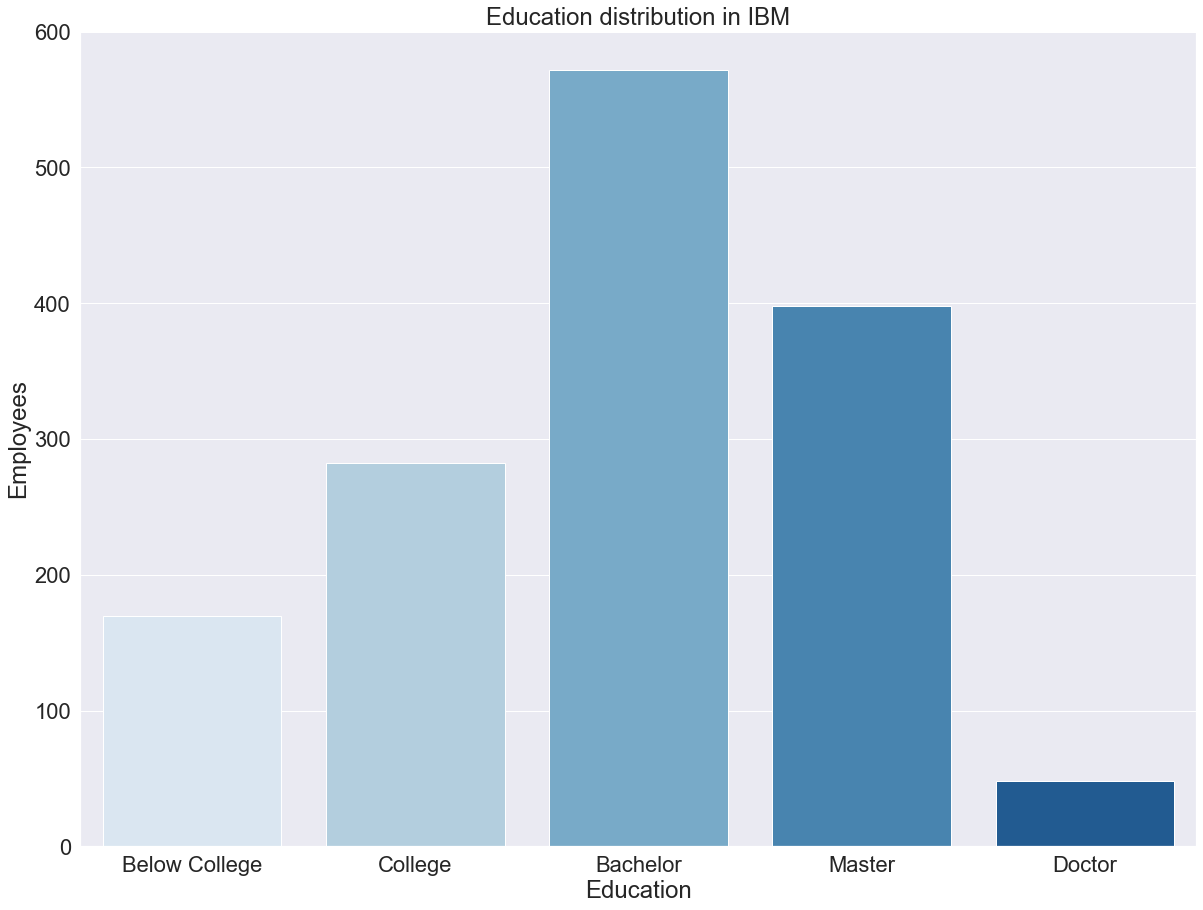

In [37]:
plt.figure(figsize=(20,15))
sns.set(font_scale=2)
ax =sns.countplot(x='Education',
             data=data,
             palette = 'Blues',
            )             
ax.set_xticklabels(['Below College','College','Bachelor','Master','Doctor'])  
ax.set(ylabel='Employees', title = 'Education distribution in IBM')

[Text(0, 0.5, 'Employees'),
 Text(0.5, 1.0, 'Education distribution in IBM based on attrition')]

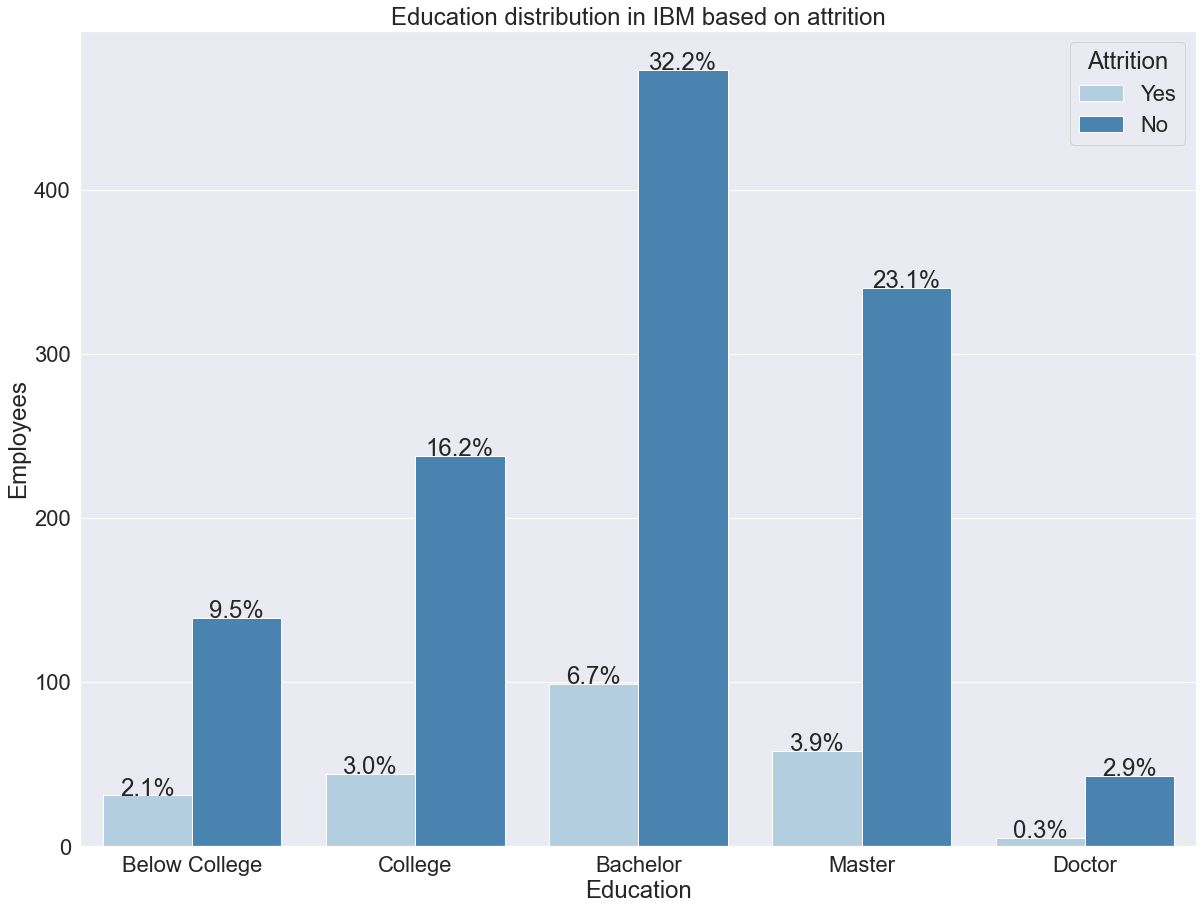

In [38]:
plt.figure(figsize=(20,15))
sns.set(font_scale=2)
total = float(len(data))
ax =sns.countplot(x='Education',
             data=data,
             palette = 'Blues',
             hue = 'Attrition'
            )  
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + (p.get_width())/2
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')           
ax.set_xticklabels(['Below College','College','Bachelor','Master','Doctor'])  
ax.set(ylabel='Employees', title = 'Education distribution in IBM based on attrition') 

[Text(0, 0.5, 'Employees'),
 Text(0.5, 1.0, 'Education field distribution in IBM based on attrition')]

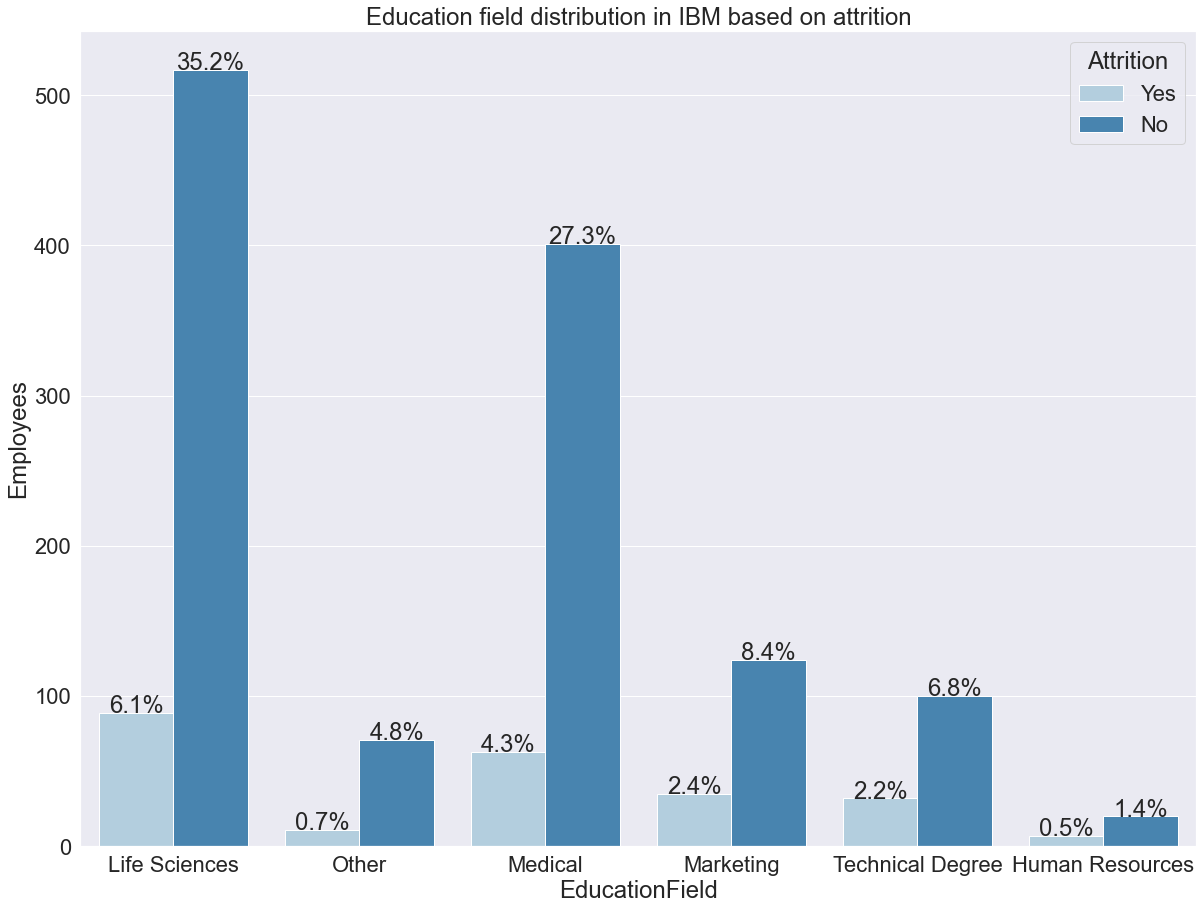

In [41]:
plt.figure(figsize=(20,15))
sns.set(font_scale=2)
total = float(len(data))
ax =sns.countplot(x='EducationField',
             data=data,
             palette = 'Blues',
             hue = 'Attrition'
            )  
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + (p.get_width())/2
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')           
ax.set(ylabel='Employees', title = 'Education field distribution in IBM based on attrition') 

Using the countplot function without specifying `order` is likely to produce an incorrect plot.


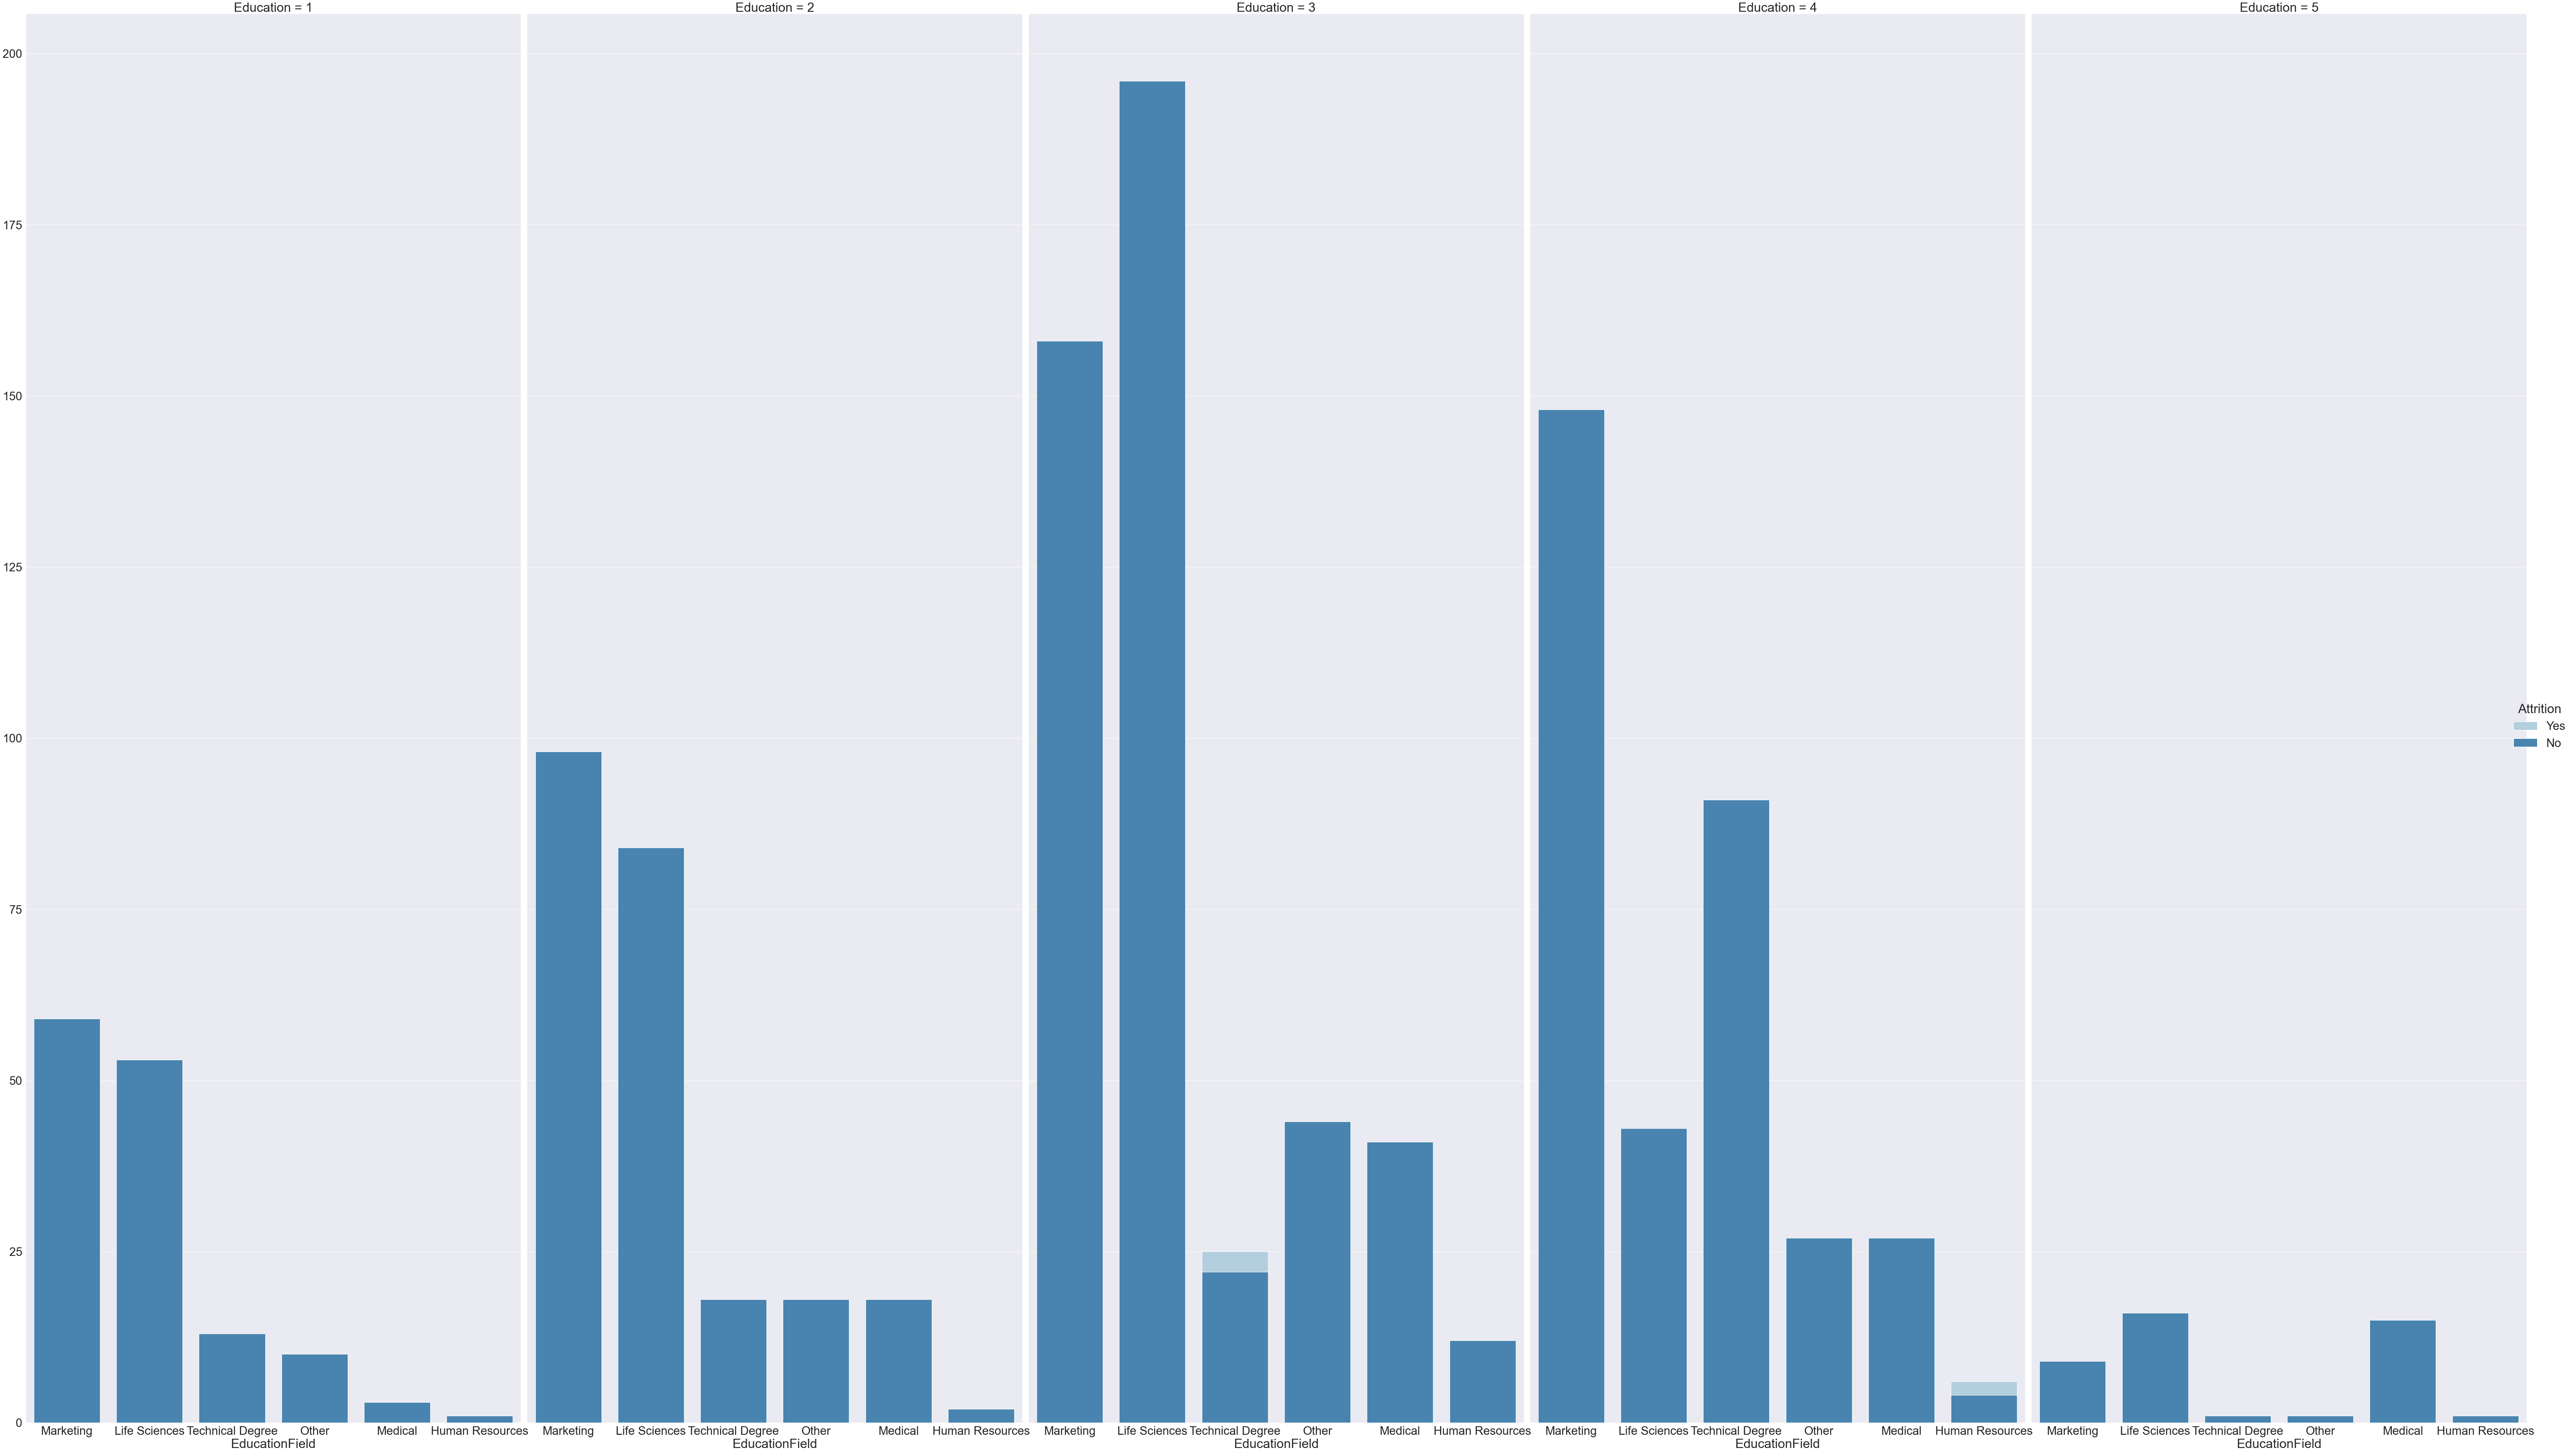

In [72]:
sns.set(font_scale=3)
g = sns.FacetGrid(data, col="Education", hue = 'Attrition',palette = 'Blues', height=30, aspect=1.5)
g.map(sns.countplot, "EducationField")
g.add_legend()
g.fig.set_size_inches(100,60)

#double click on the graph to make it bigger

Majority of IBM employees have a life science or medical education.
At the same time, at the company, we can see people with different degrees. Most of the employees have Bachelor or Master Degrees.

If we analyze how often employees with different degrees leave the company, we will see that mostly it is people with education level "Below Colledge". People with a colledge eductaion, Bachelor or Master degree leave the company with the same consistency.
Doctors prefer to stay in the company, which is expected. As far as doctors are mostly work in labs with scientific subjects.

If we will look who is mostly leaving the company, it will be Bachelors with technical speciality or Masters in human resources.

In general, we can say that 3rd hypothesis is correct. However, we found an interesting insight about the employees which do not have the high education level. They leave company also quite often. 

Probably IBM can think about the courses or some other programs to help them to get degree and let them move on the career ladder.

[Text(0, 0.5, 'Employees'),
 Text(0.5, 1.0, 'Marital Status of Employees in IBM')]

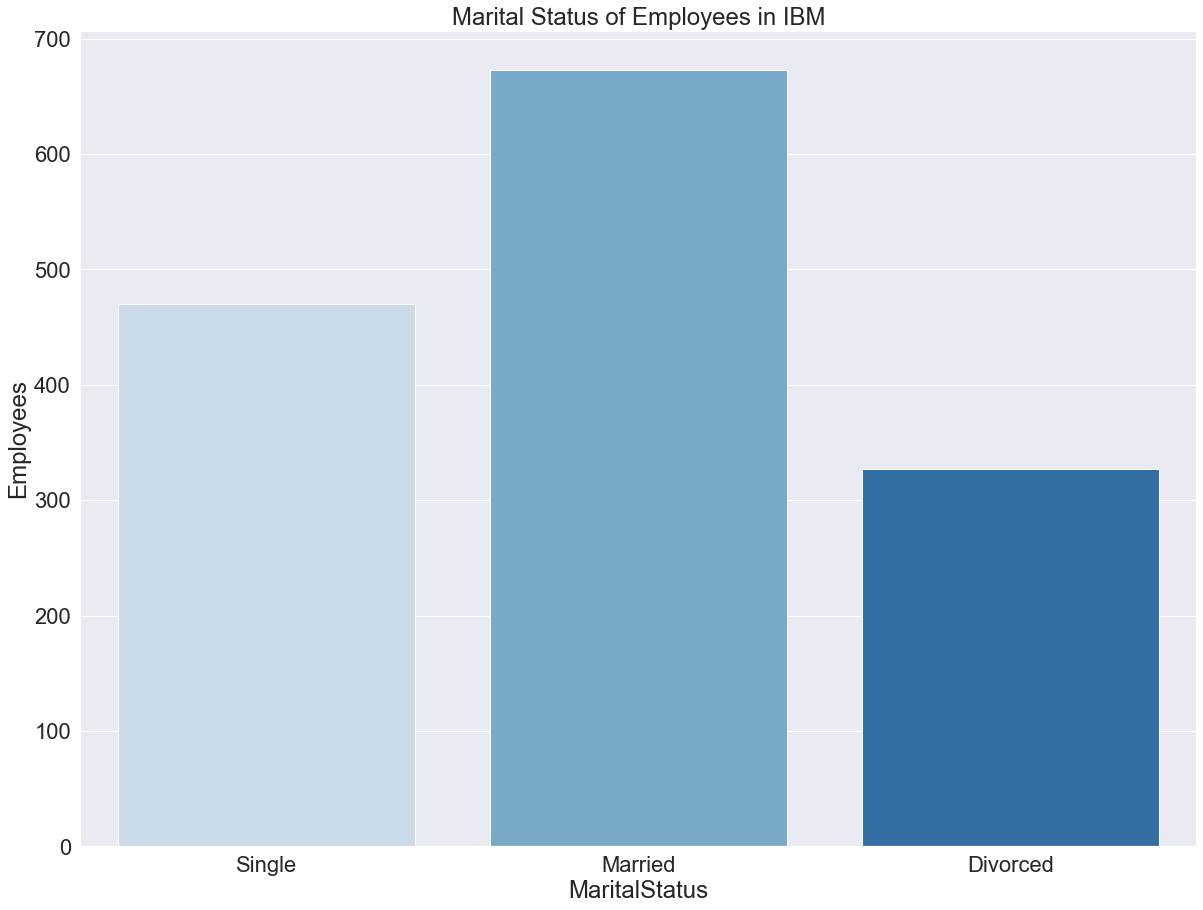

In [73]:
# Marital analysis
plt.figure(figsize=(20,15))
sns.set(font_scale=2)
ax =sns.countplot(x='MaritalStatus',
             palette = 'Blues',
             data=data)
ax.set(ylabel='Employees', title = 'Marital Status of Employees in IBM') 

Using the countplot function without specifying `order` is likely to produce an incorrect plot.


<Figure size 1440x1080 with 0 Axes>

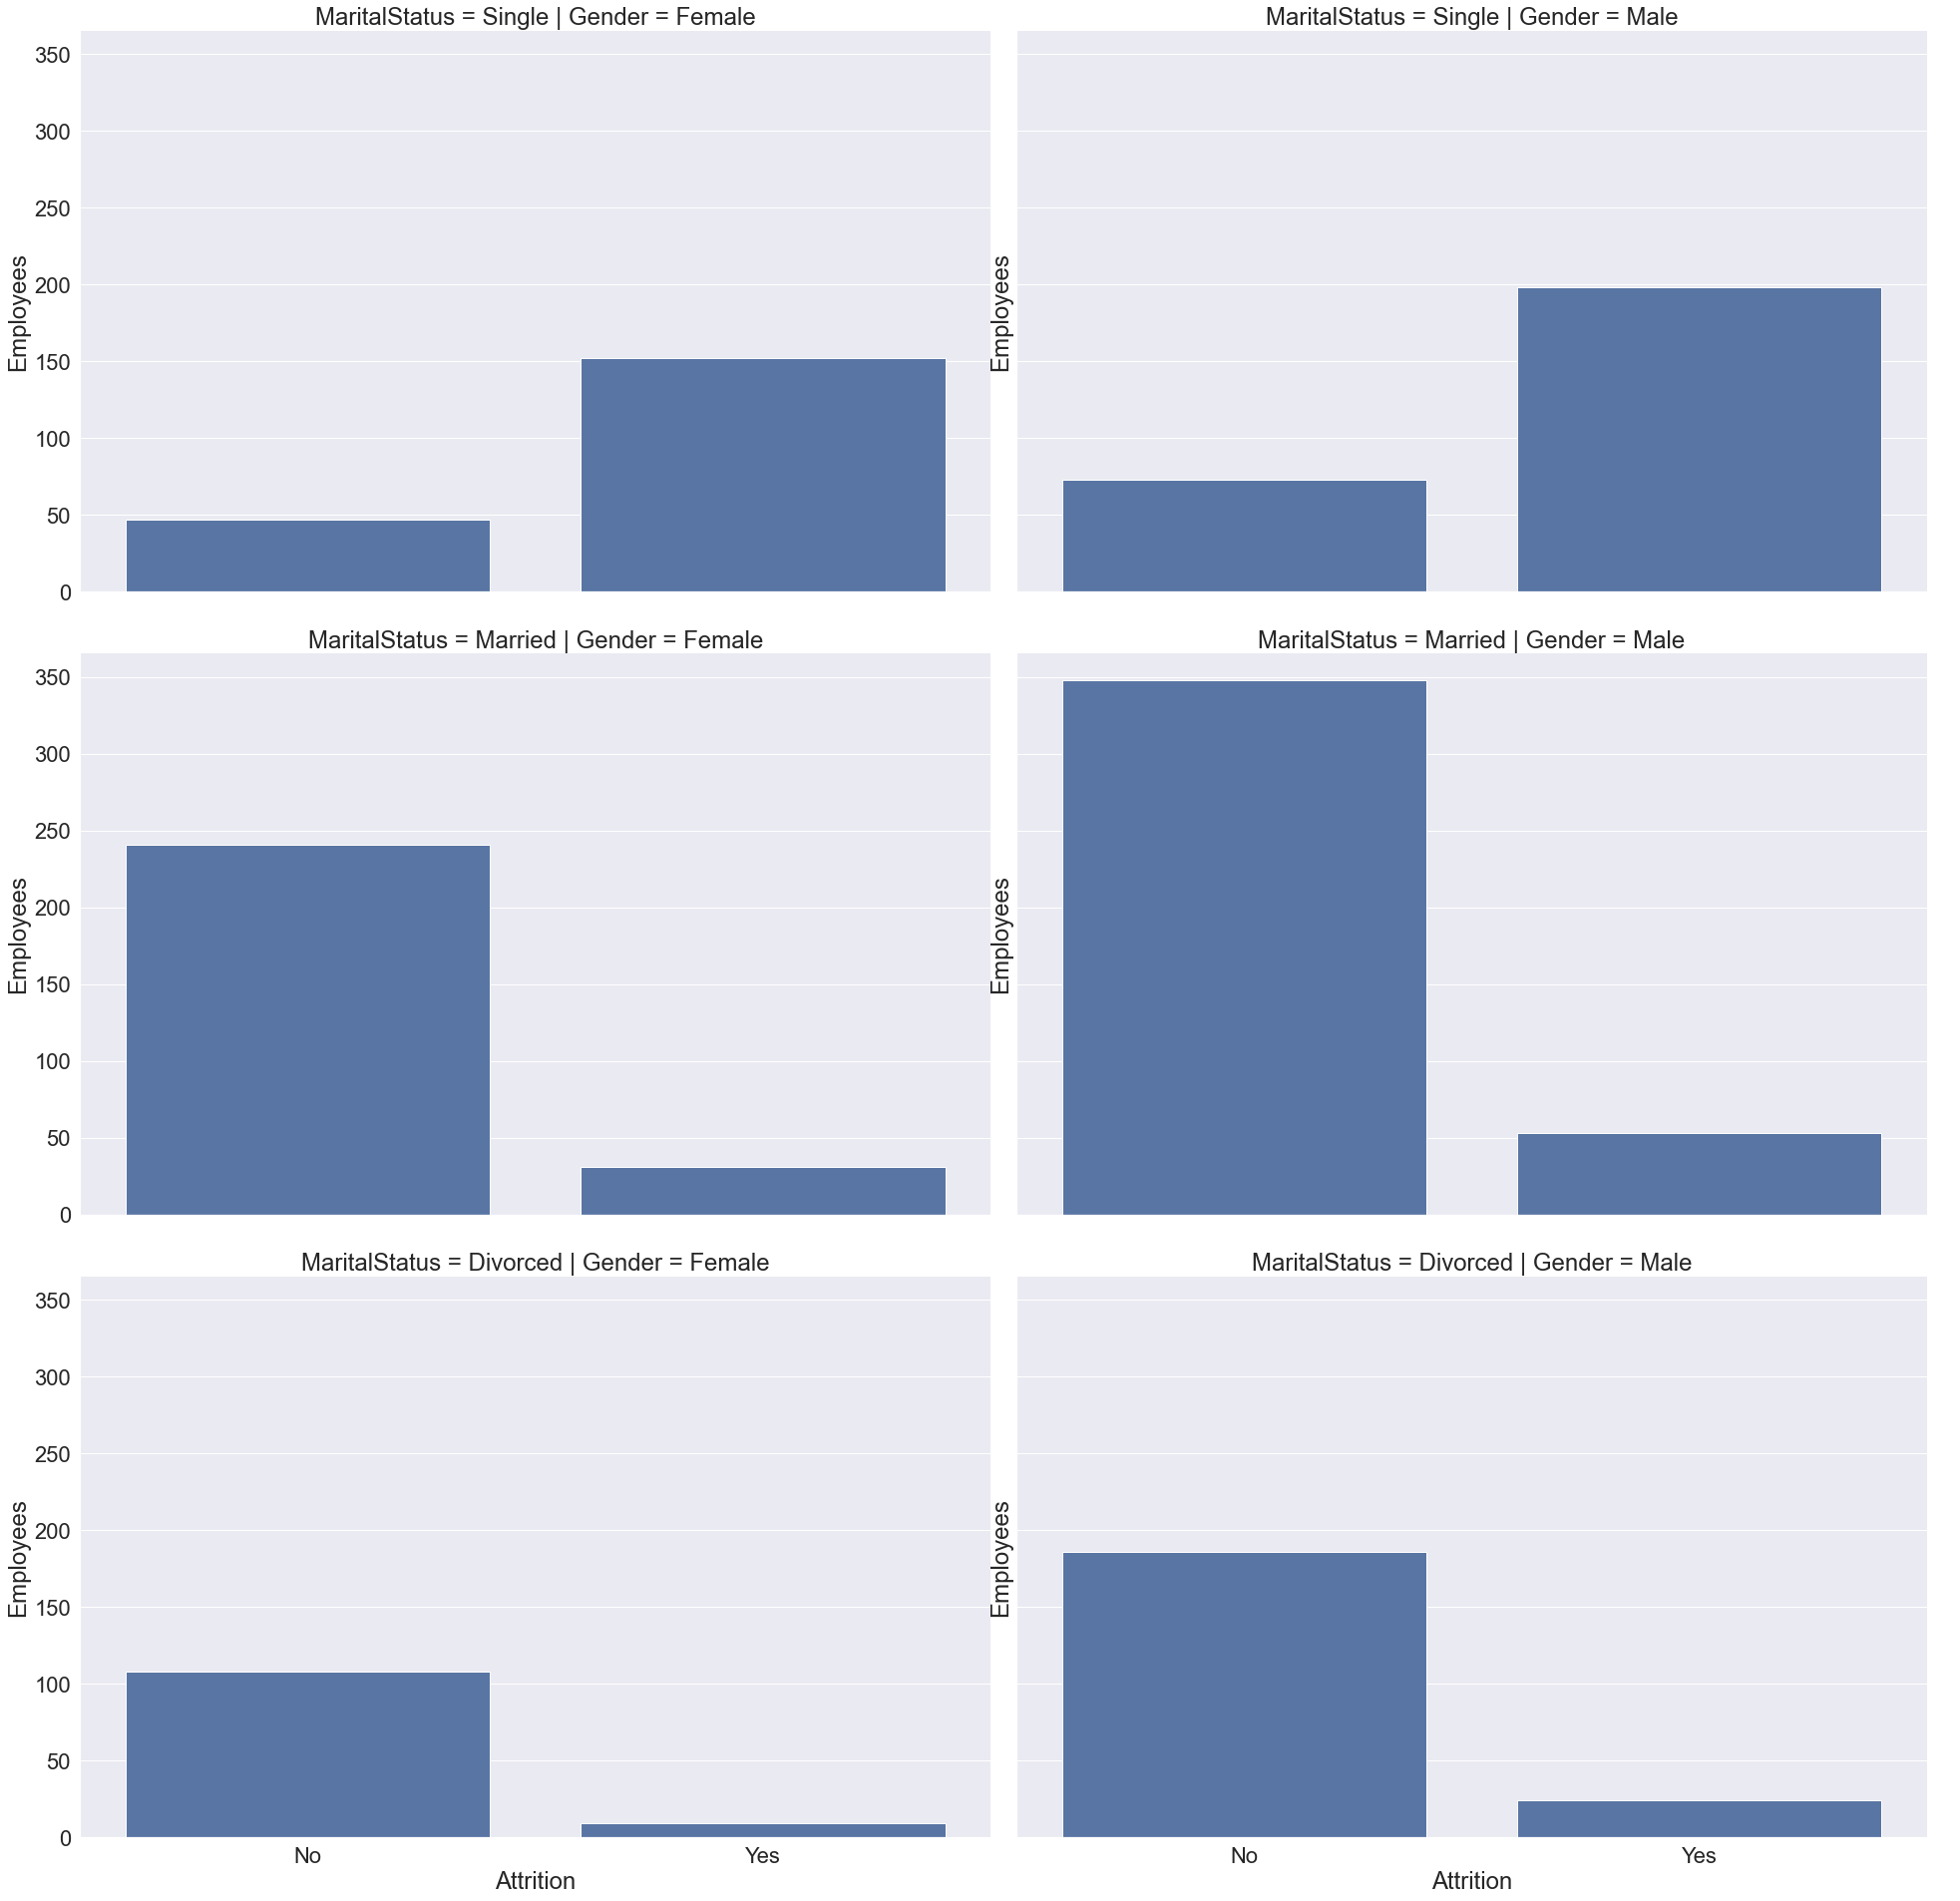

In [74]:
plt.figure(figsize=(20,15))
sns.set(font_scale=2)
g = sns.FacetGrid(data, col="Gender", row = 'MaritalStatus', palette = 'Blues',height=9, aspect=1.5)
g.map(sns.countplot, "Attrition")
g.add_legend()
g.set(ylabel='Employees')

[Text(0, 0.5, 'Employees'),
 Text(0.5, 1.0, 'Attrition analysis based on Marital Status')]

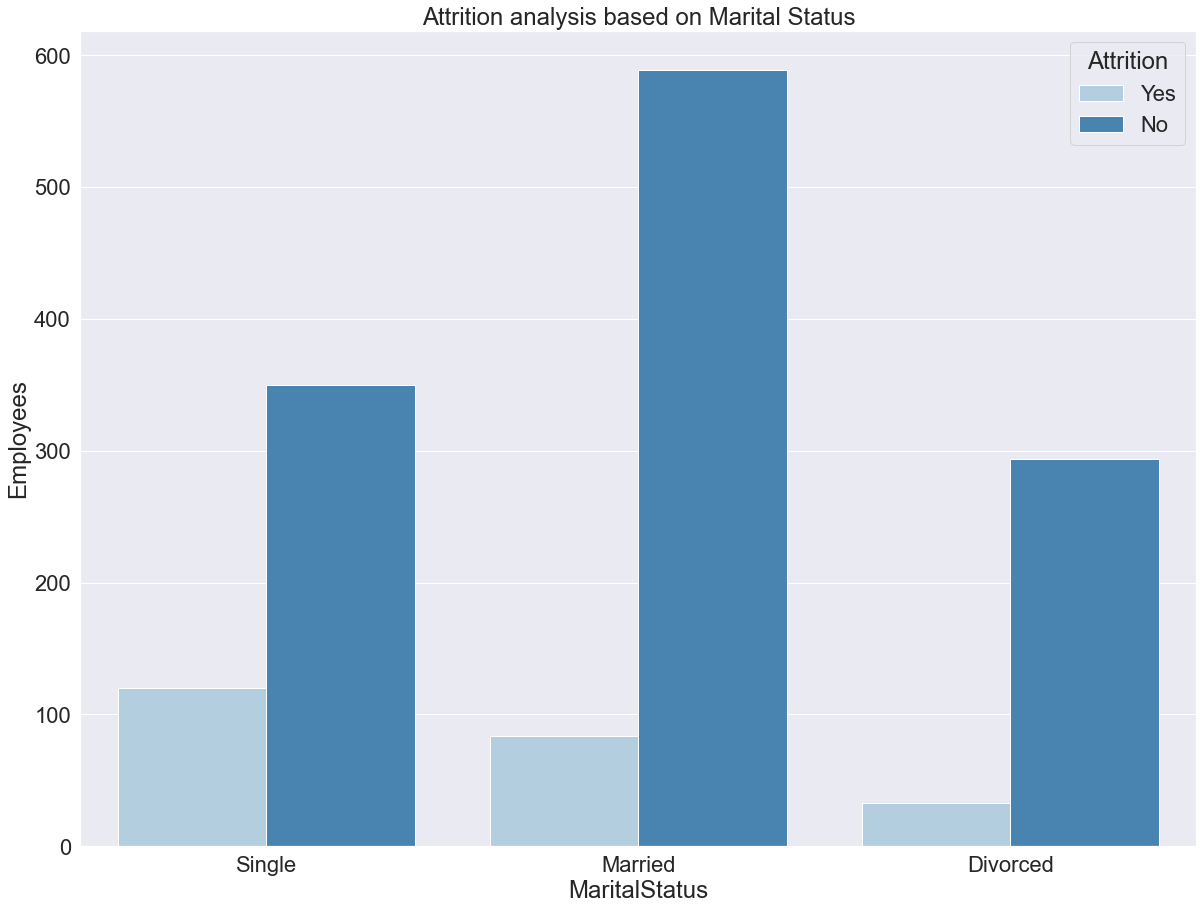

In [76]:
plt.figure(figsize=(20,15))
sns.set(font_scale=2)
ax =sns.countplot(x='MaritalStatus',
             palette = 'Blues',
             data=data,
             hue = 'Attrition')
ax.set(ylabel='Employees', title = 'Attrition analysis based on Marital Status')

Most of IBM employees are married and as we can see they prefer to stay in the company. This can be related to the necessity to provide a good life for their children, pay for a mortgage, etc.
Single employees leave the company more often. This is true for women and men.
It is worth getting deeper and check why this employee leave the company.

Thus, we can make a small conclusion:
    1. Young and Adult specialists leave the comapny more often 
    2. Bachelors with technical speciality, Masters in human resources and employees with below college education quit the company
    3. Single employees prefer to leave IBM more often than other employees.



## Analysis of comfort of an employee in IBM

Here we will check other factors which can impact employees behavior

Hypotheses:
1. Female employees leave the company more often because of frequent travelling
2. Longer the distance from home to work, higher the chance that employees will leave the company

[Text(0, 0.5, 'Employees'), Text(0.5, 1.0, 'Business travels in IBM')]

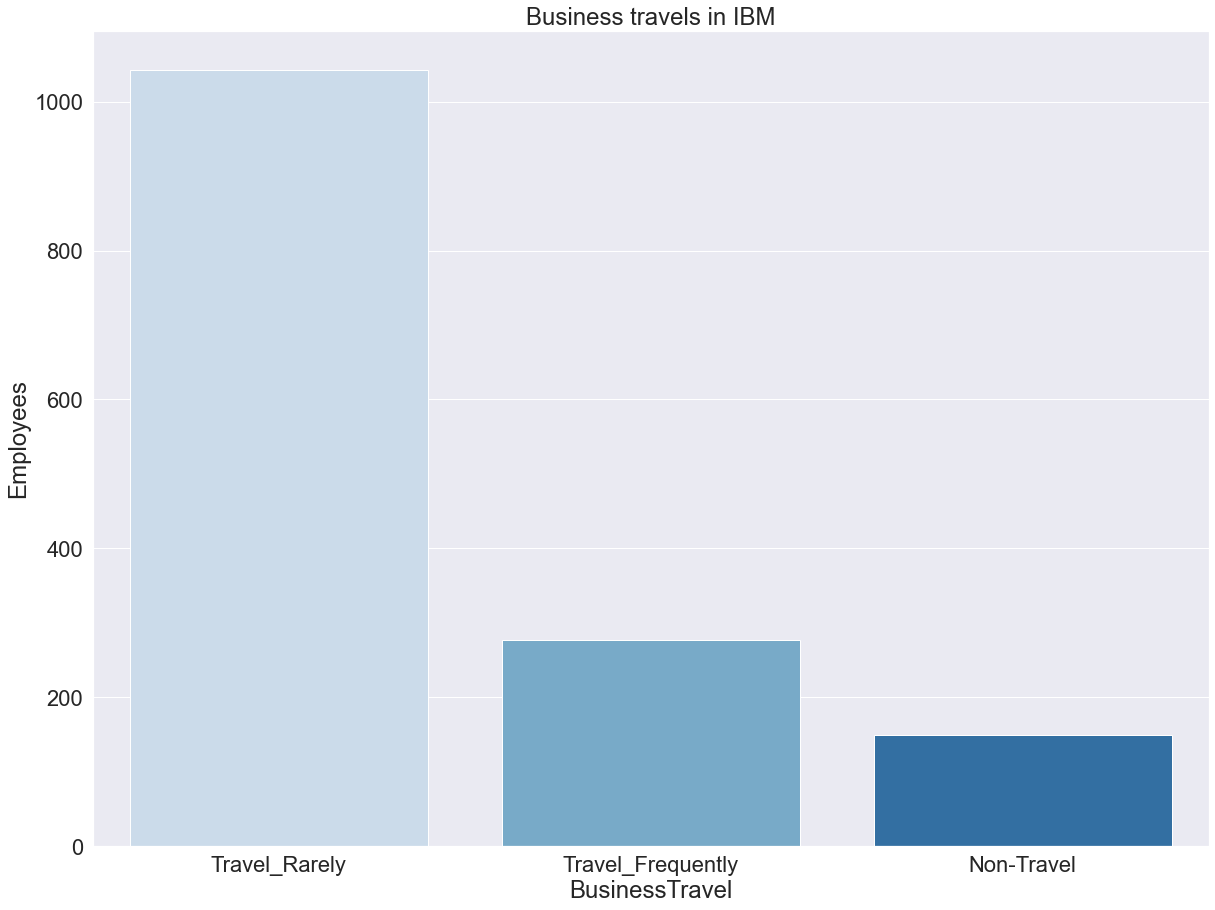

In [77]:
#Business travals  
plt.figure(figsize=(20,15))
sns.set(font_scale=2)
ax =sns.countplot(x='BusinessTravel',
             palette = 'Blues',
             data=data)
ax.set(ylabel='Employees', title = 'Business travels in IBM') 

[Text(0, 0.5, 'Employees'),
 Text(0.5, 1.0, 'Attrition analysis based on business travel frequency')]

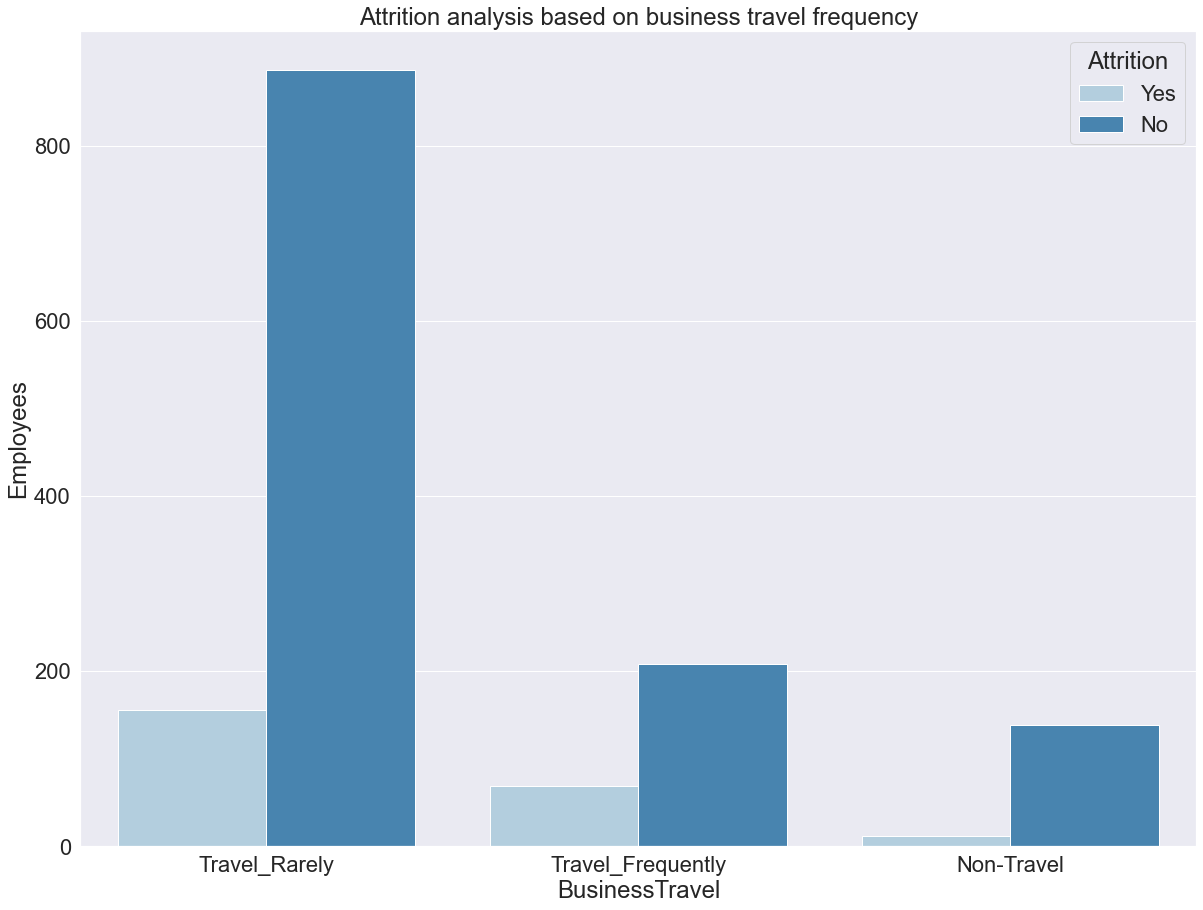

In [78]:
plt.figure(figsize=(20,15))
sns.set(font_scale=2)
ax =sns.countplot(x='BusinessTravel',
             palette = 'Blues',
             data=data,
             hue = 'Attrition')
ax.set(ylabel='Employees', title = 'Attrition analysis based on business travel frequency')

Using the countplot function without specifying `order` is likely to produce an incorrect plot.


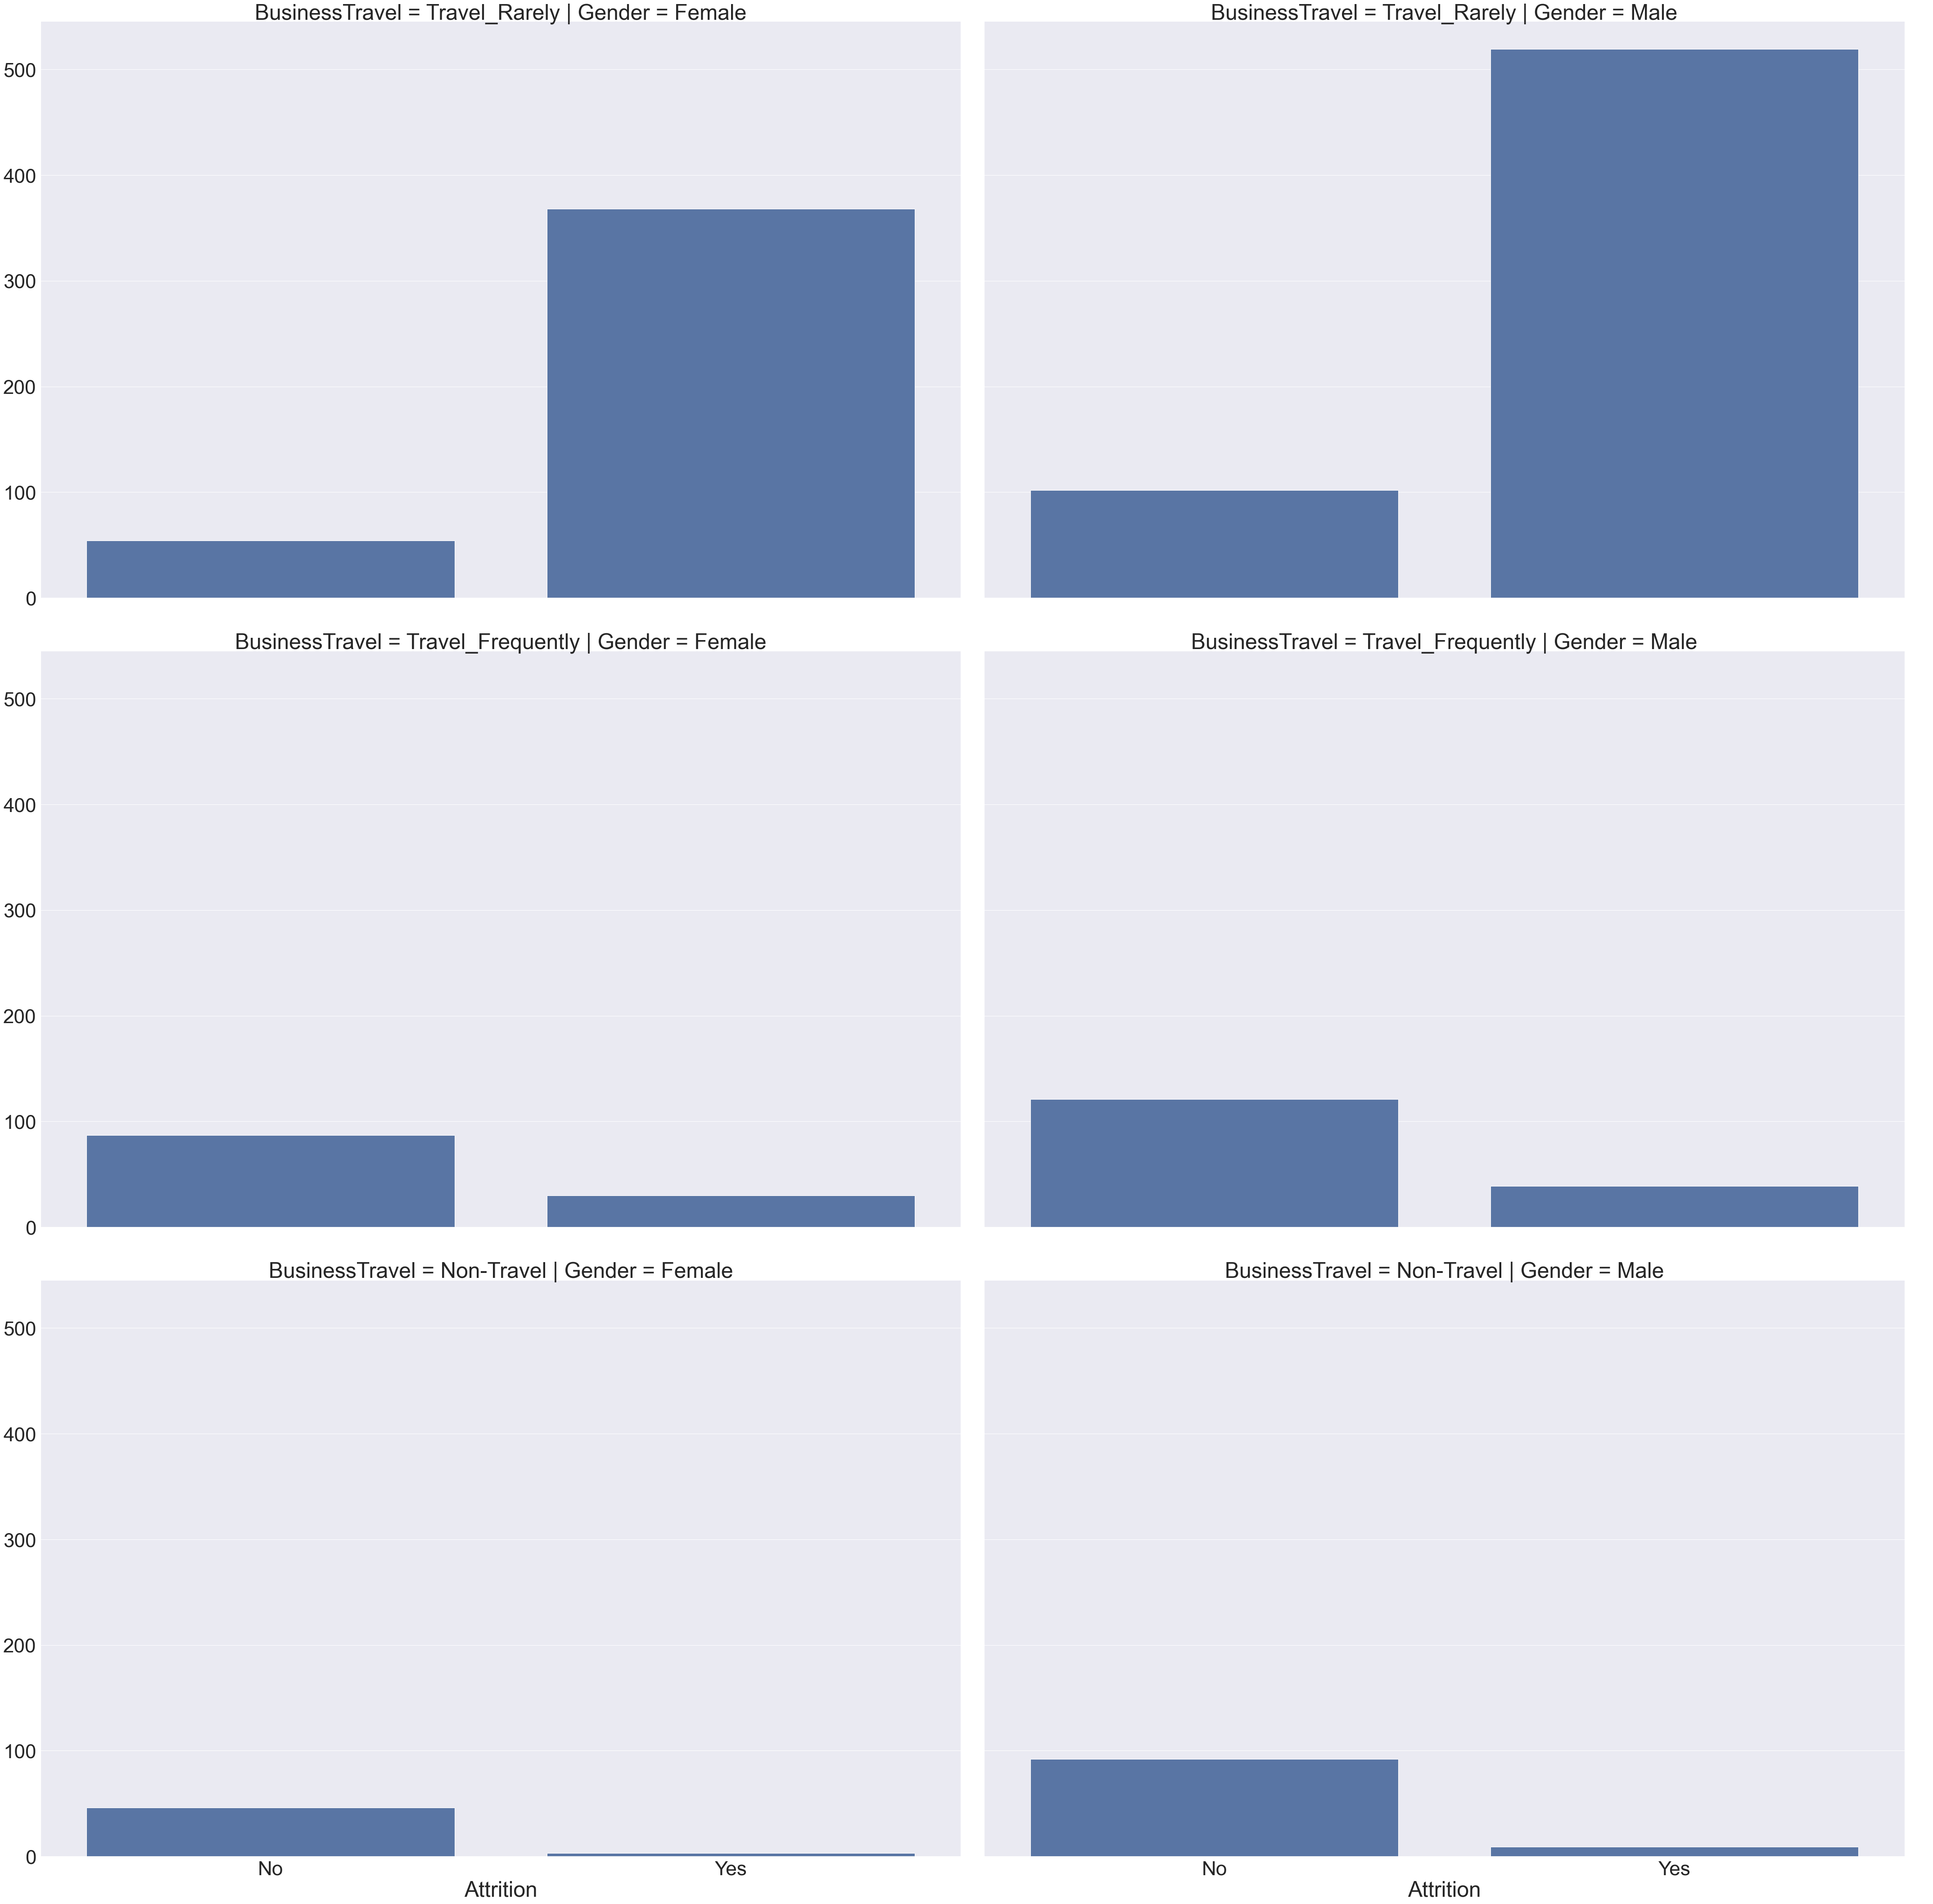

In [79]:
sns.set(font_scale=4)
g = sns.FacetGrid(data, col="Gender", row = 'BusinessTravel',palette = 'Blues', height=20, aspect=1.5)
g.map(sns.countplot, "Attrition")
g.add_legend()

IBM employees travel quite often. This is one of the factors which makes people leave.
The 1st hypothesis is not fully correct, because men leave company as often as women when it is related to travelling.

For IBM it would be interesting to consider online meeting (when it is possible) to reduce travel

[Text(0, 0.5, 'Employees'),
 Text(0.5, 1.0, 'Distribution of attrition in IBM based on distance from work to home')]

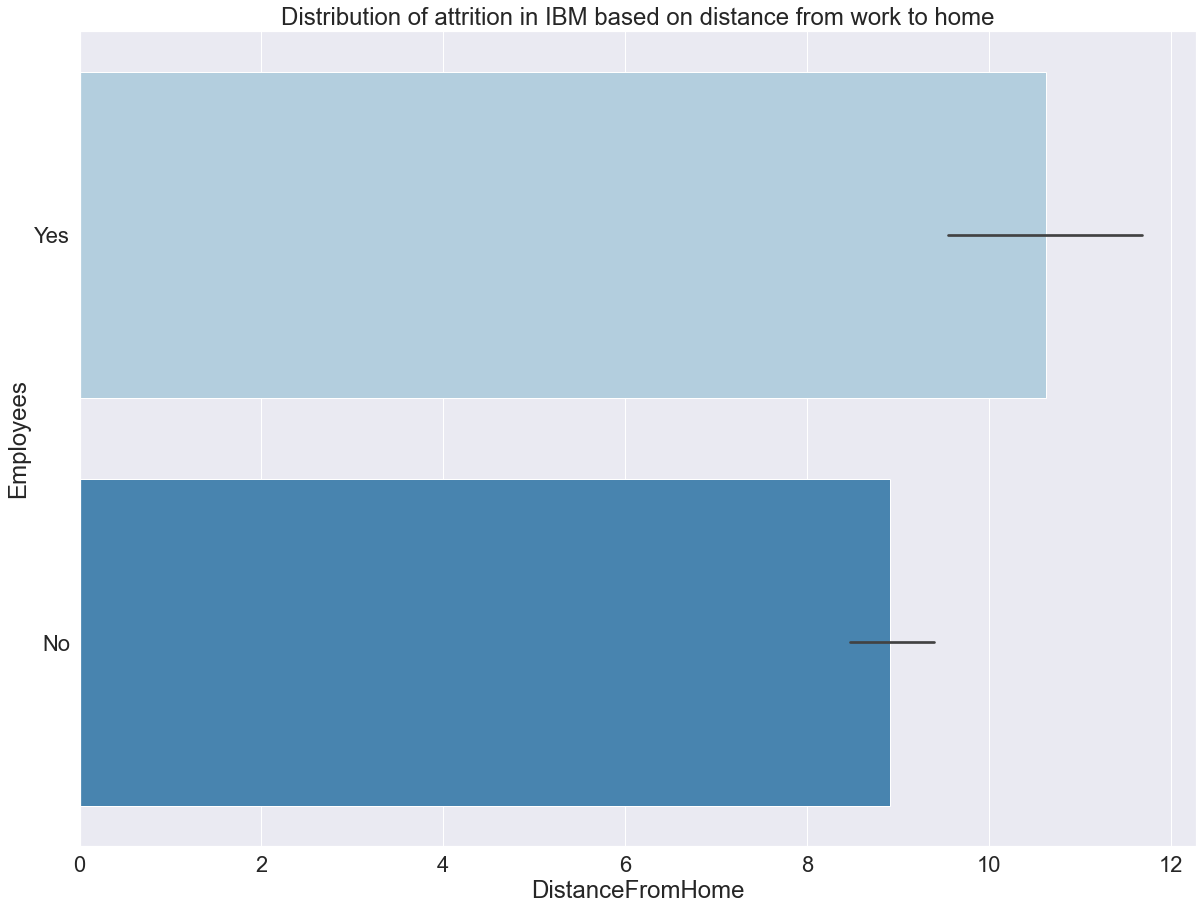

In [82]:
#Distance to work  
plt.figure(figsize=(20,15))
sns.set(font_scale=2)
ax =sns.barplot(x='DistanceFromHome', y = 'Attrition',
             palette = 'Blues',
             data=data)
ax.set(ylabel='Employees', title = 'Distribution of attrition in IBM based on distance from work to home') 

This result is expected: if the employee lives far from the company, he will spend more time to reach work. And this is the loss of his/her personal time. 
The potential solution can be launching shuttles for employees, so they can easily reach work or home

Thus, we can make a small conclusion:
1. Travelling has a negative impact on employees, they leave company more often if they have a need to travel 
2. Distance from work has an impact of attrition: longer the distance, higher the chance that the employee will leave


## Analysis of work coditions

Work conditions are one of the most important factors. We will review them in this section

Hypotheses:
1. Lower the monthly income, the higher the change that the employee will leave
2. R&D should have the highest salary due to this, people from this department leave rare the company. Other departments will a have high turnover of employees
3. Lower the position in the company, the higher the chance that the employee will leave
4. Increased workload and lack of balance between work and life leads to layoffs
5. Job environment has an influence on attrition. Better the employee feels, longer he will stay in the company

[Text(0, 0.5, 'Employees'), Text(0.5, 1.0, 'Income distribution in IBM')]

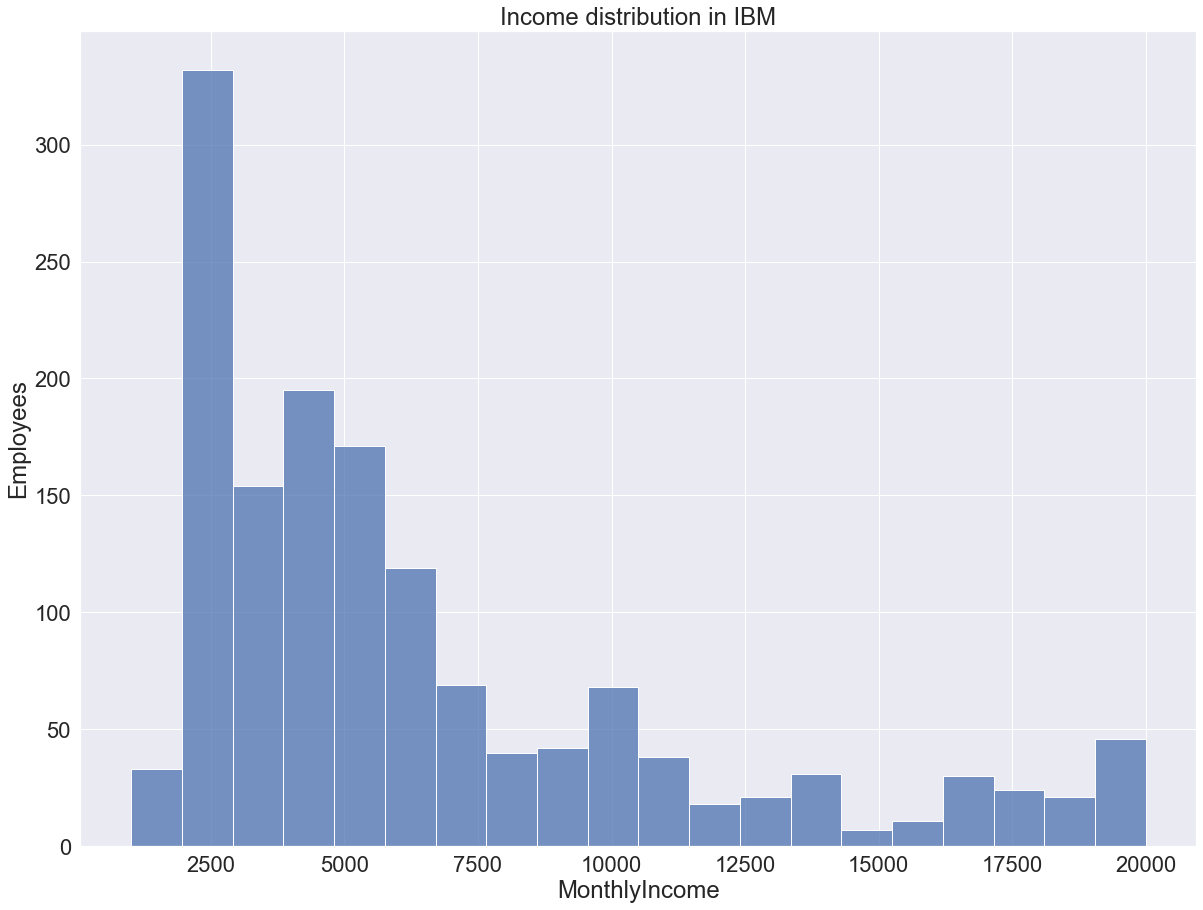

In [83]:
#Montly icome analysis
plt.figure(figsize=(20,15))
sns.set(font_scale=2)
g = sns.histplot(data = data, x = 'MonthlyIncome')
g.set(ylabel='Employees', title = 'Income distribution in IBM')

[Text(0, 0.5, 'Employees'),
 Text(0.5, 1.0, 'Income distribution in IBM based on gender')]

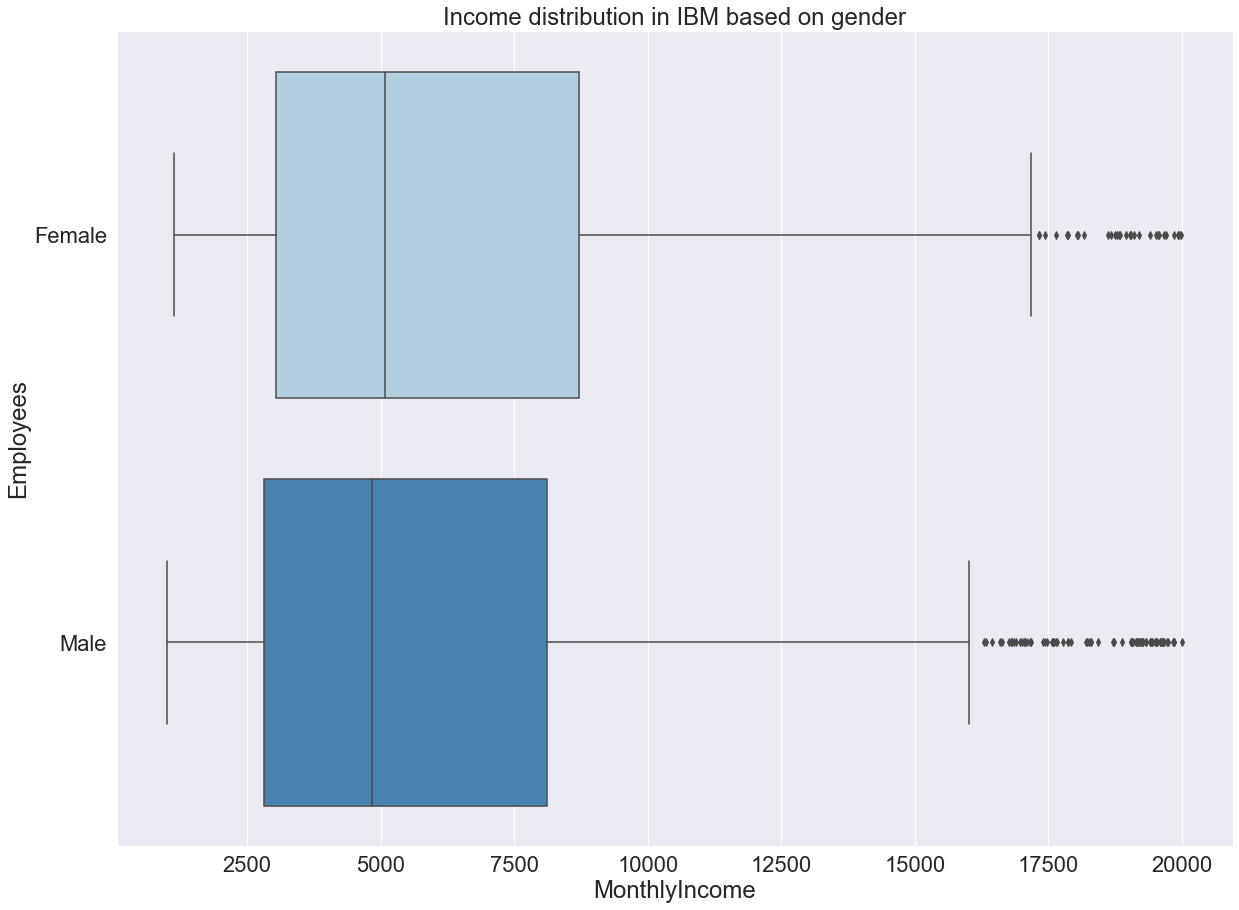

In [84]:
plt.figure(figsize=(20,15))
sns.set(font_scale=2)
ax = sns.boxplot(data=data,x="MonthlyIncome", y = "Gender", palette = 'Blues')
ax.set(ylabel='Employees', title = 'Income distribution in IBM based on gender')

[Text(0, 0.5, 'Employees'), Text(0.5, 1.0, 'Monthly income and attrition')]

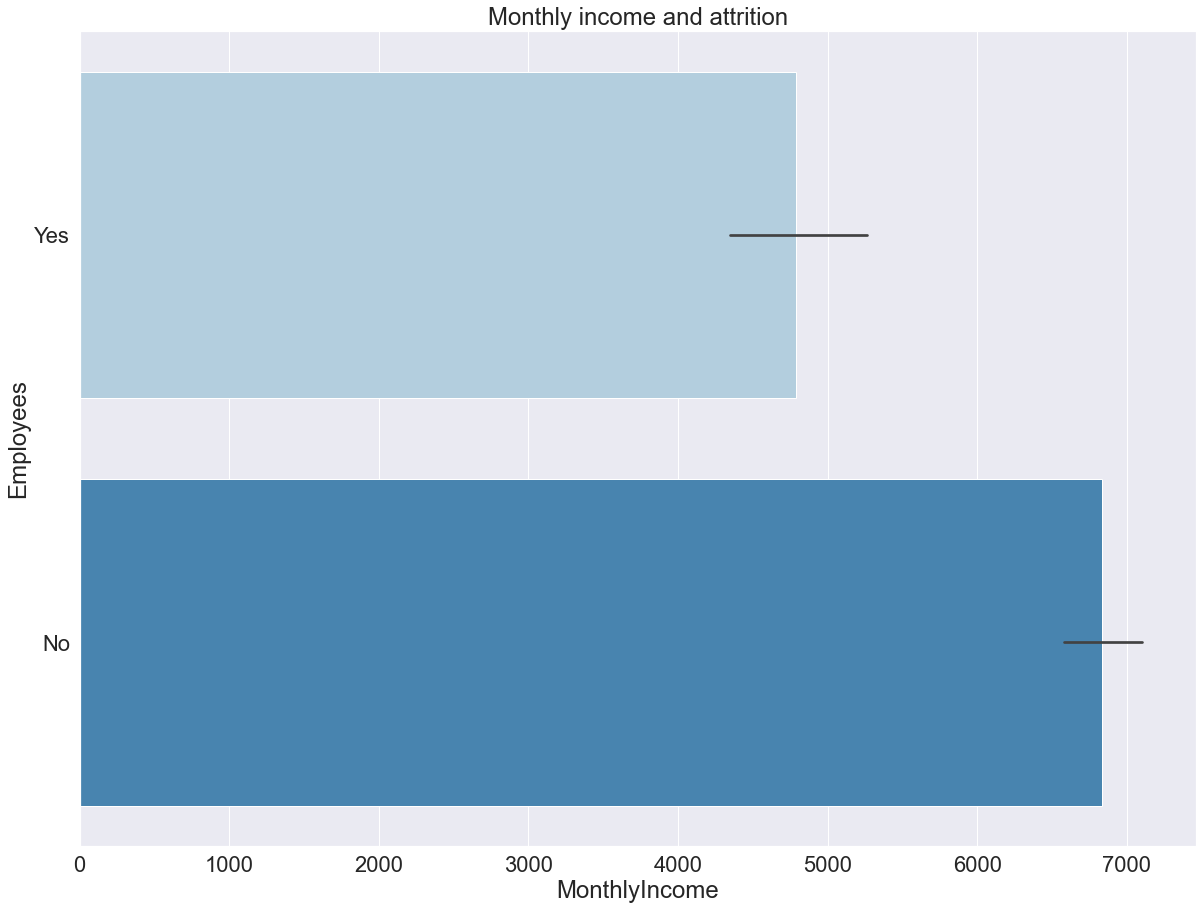

In [85]:
plt.figure(figsize=(20,15))
sns.set(font_scale=2)
ax =sns.barplot(x='MonthlyIncome', y = 'Attrition',
             palette = 'Blues',
             data=data)
ax.set(ylabel='Employees', title = 'Monthly income and attrition')

Monthly income has a right skewed distribution. Which looks logical knowing that the managers have higher salaries than ordinary employees.
At the same time, it is very important to mention that there is no much difference between men and women salaries, women get even more than men. That allows us to exclude from our assumptions any ideas about discrimination.
And obviously higher the income - less chance that employees will leave

However, we should go deeper and check the situation with income and attrition at department, job level and job role

<AxesSubplot:ylabel='Department'>

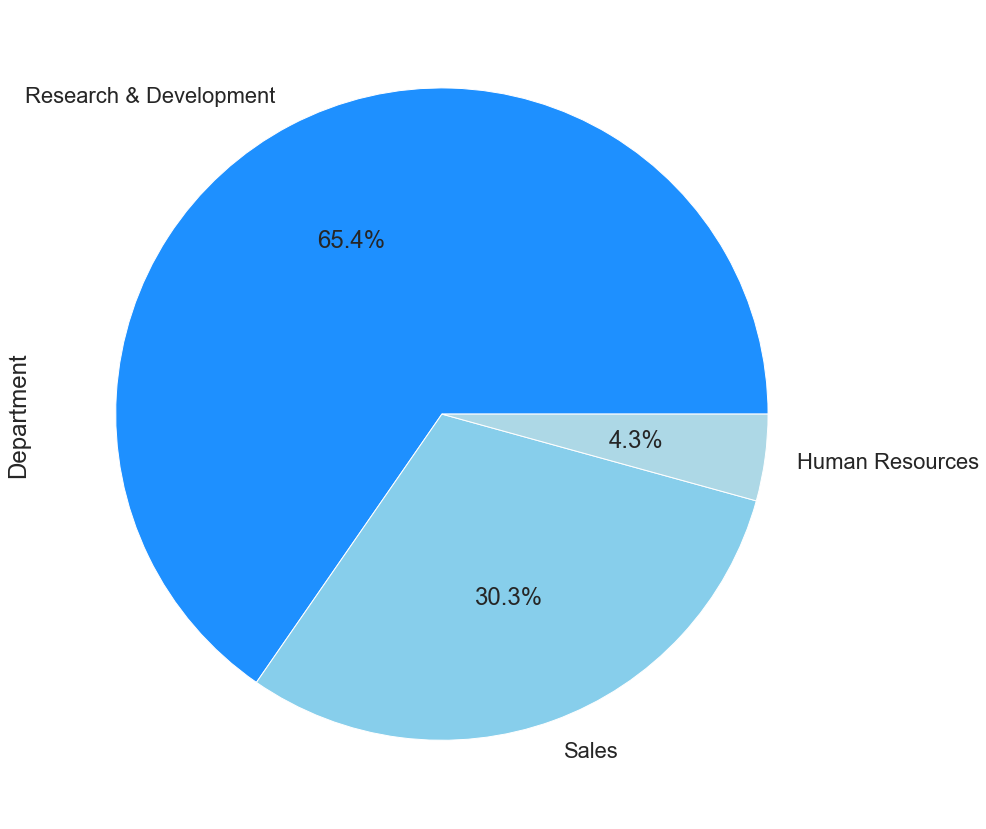

In [86]:
#Analysis at department, job level and job role
#Department
plt.figure(figsize=(20,15))
sns.set(font_scale=2)
data['Department'].value_counts().plot.pie(autopct='%1.1f%%',colors = ['dodgerblue', 'skyblue','lightblue'])

[Text(0, 0.5, 'Average Income'),
 Text(0.5, 1.0, 'Average monthly income per department')]

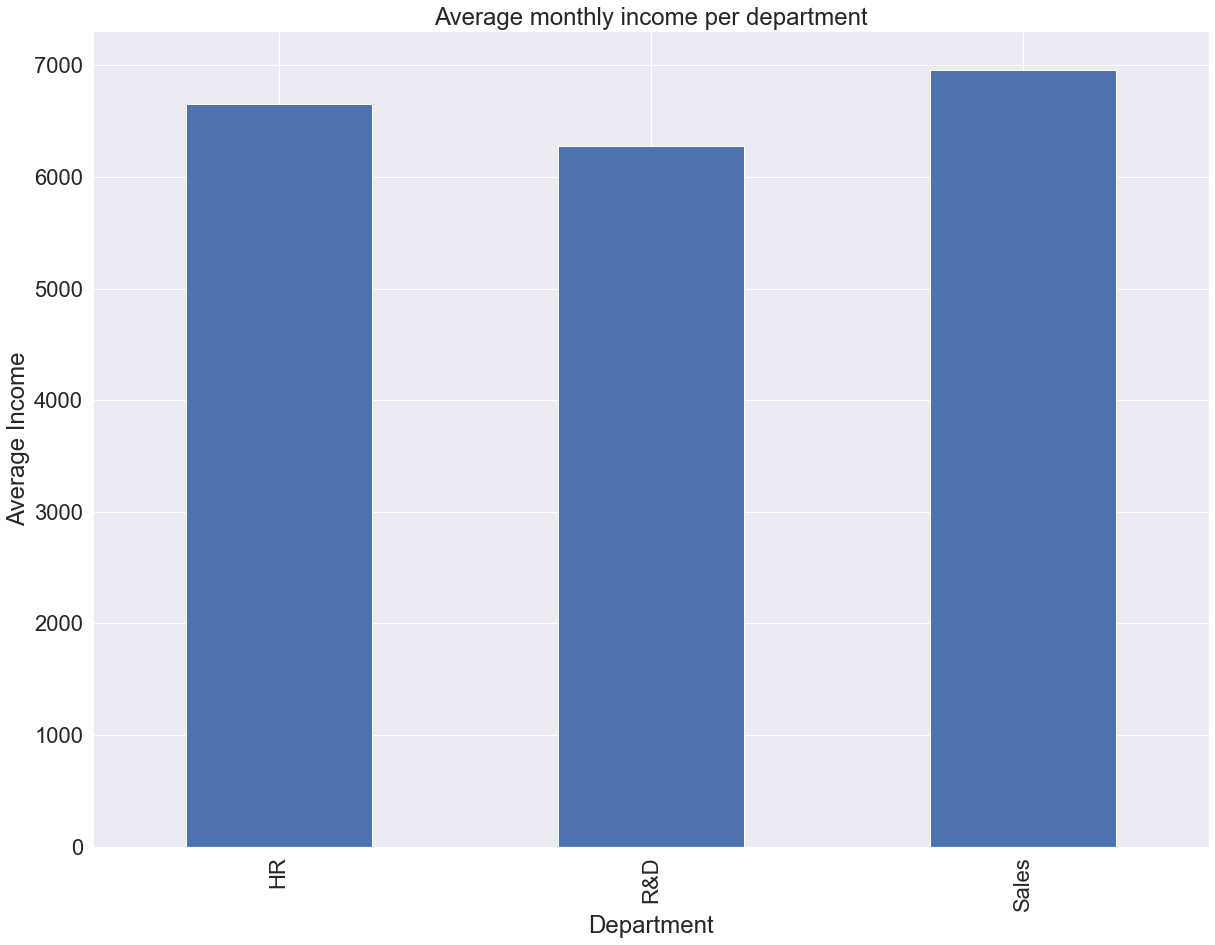

In [87]:
IncomeDep = data.groupby('Department').MonthlyIncome.mean()
plt.figure(figsize=(20,15))
sns.set(font_scale=2)
ax = IncomeDep.plot(kind="bar")
ax.set_xticklabels(['HR','R&D','Sales'])  
ax.set(ylabel='Average Income', title = 'Average monthly income per department')

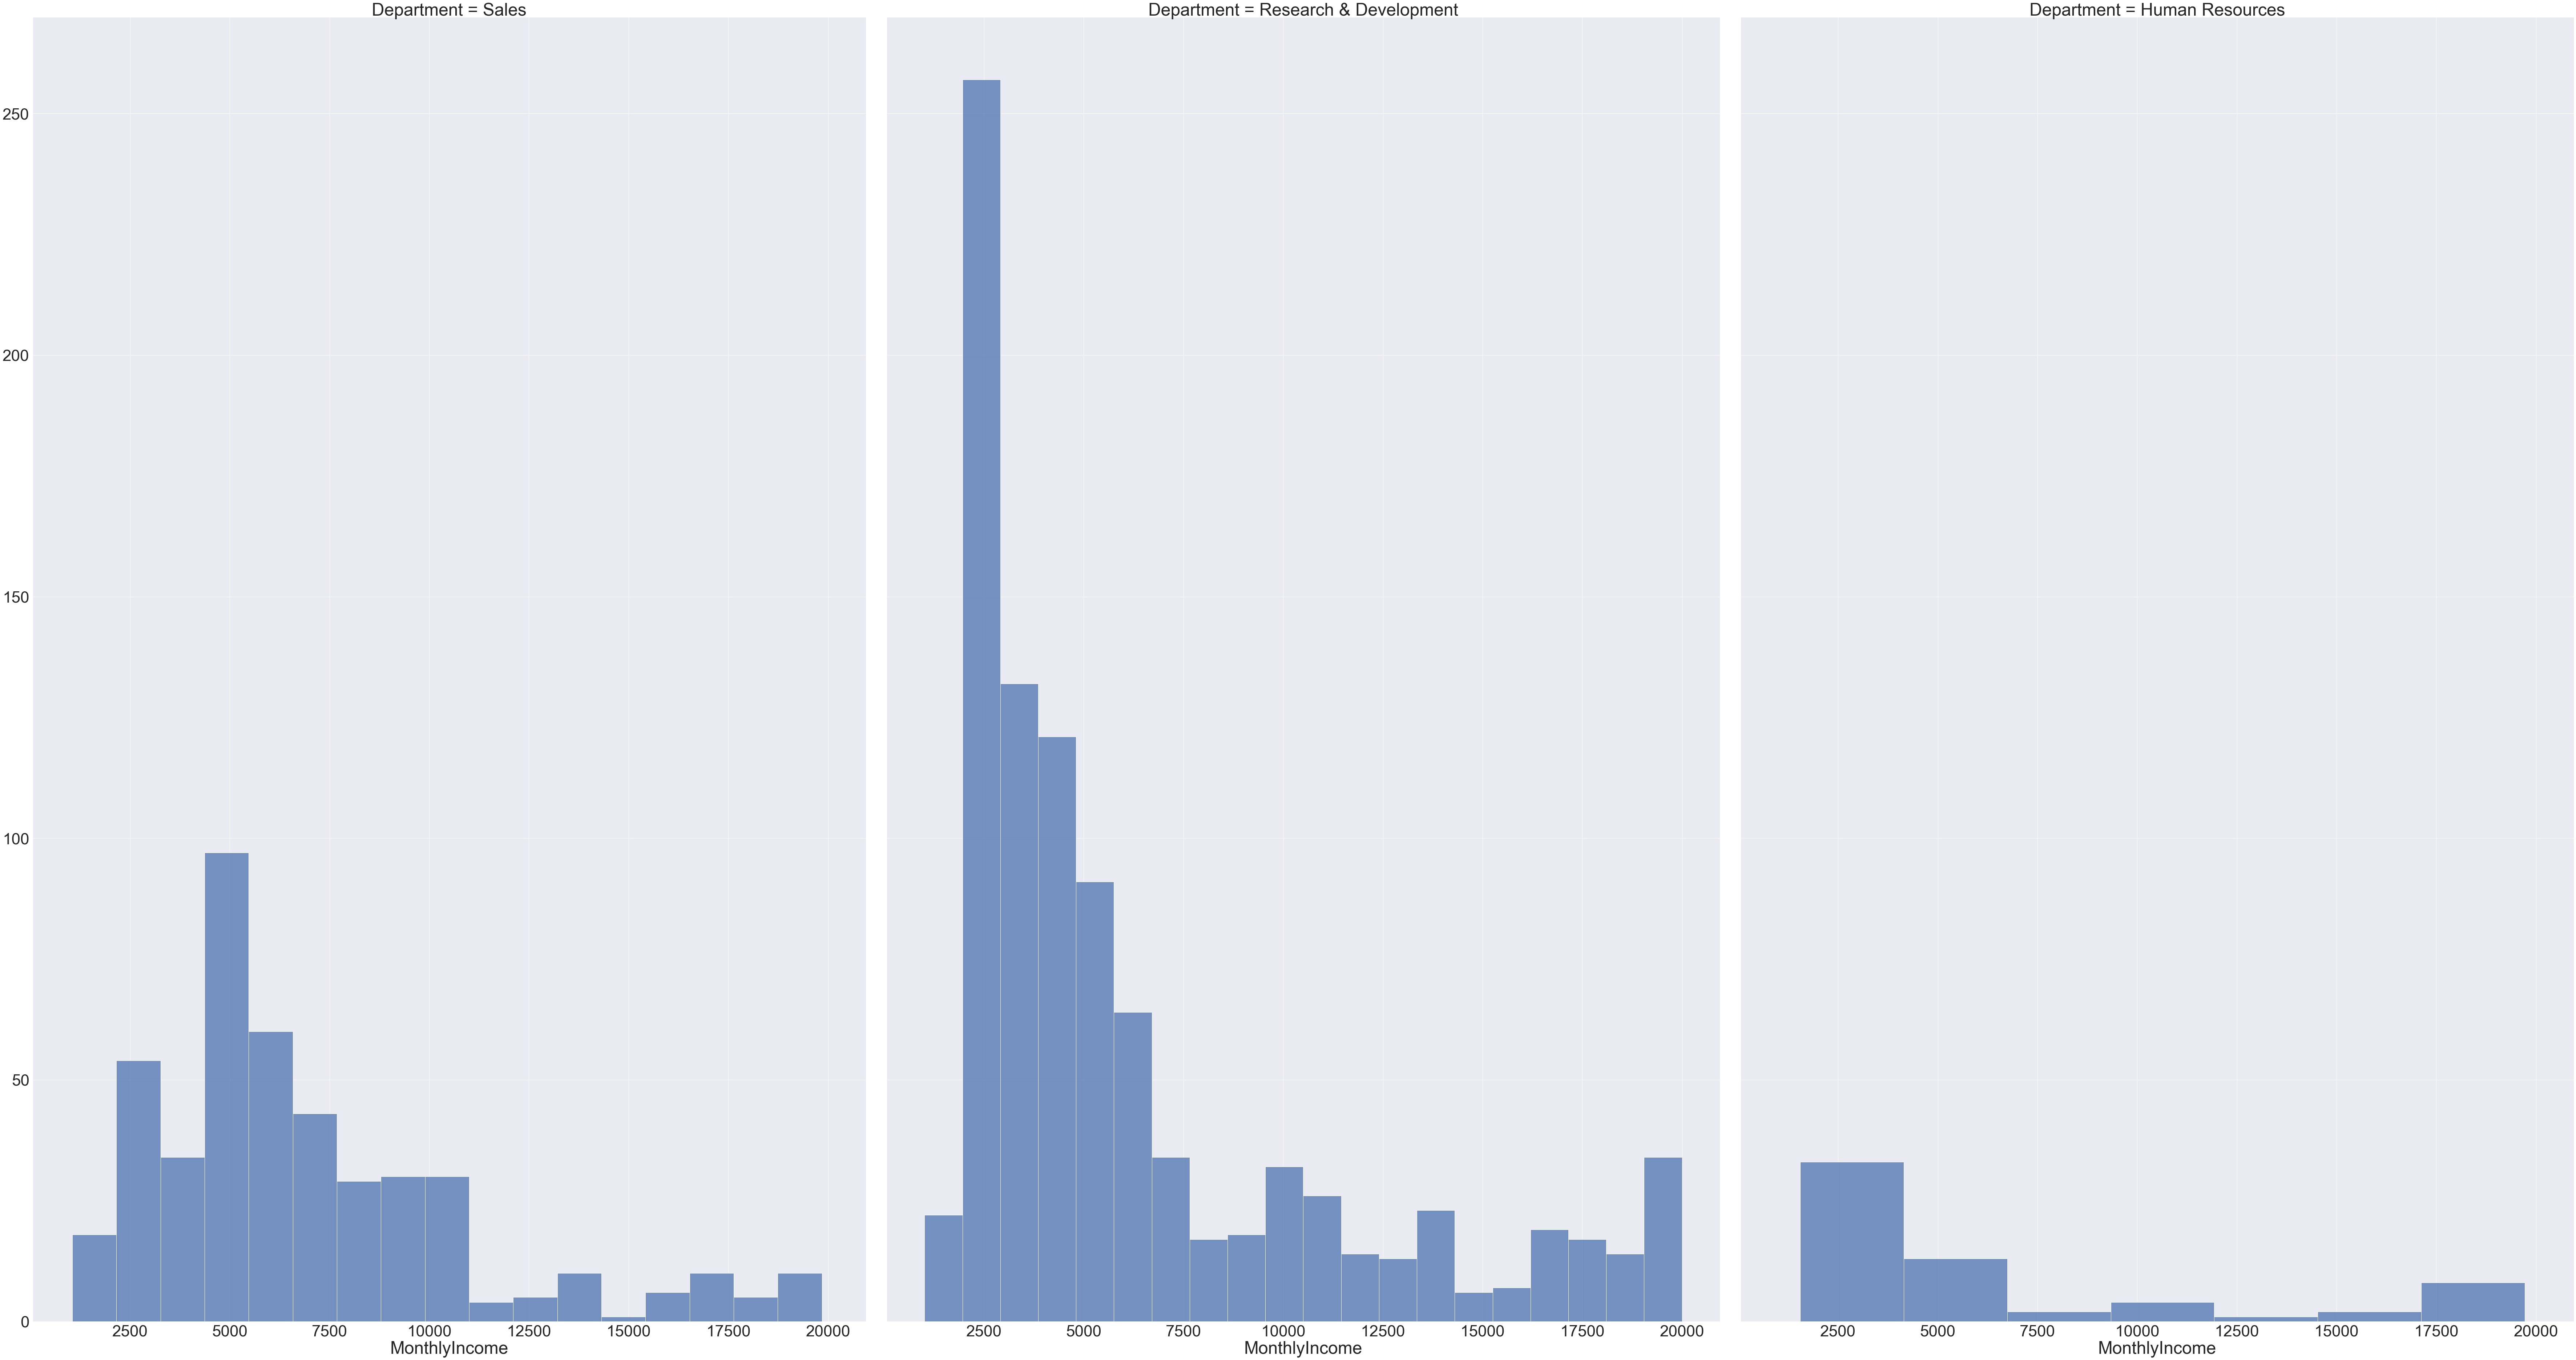

In [89]:
sns.set(font_scale=4)
g = sns.FacetGrid(data, col="Department",palette = 'Blues', height=20, aspect=1.5)
g.map(sns.histplot, "MonthlyIncome")
g.fig.set_size_inches(100,60)

Attrition  Department            
No         Human Resources           7345.980392
           Research & Development    6630.326087
           Sales                     7232.240113
Yes        Human Resources           3715.750000
           Research & Development    4108.075188
           Sales                     5908.456522
Name: MonthlyIncome, dtype: float64

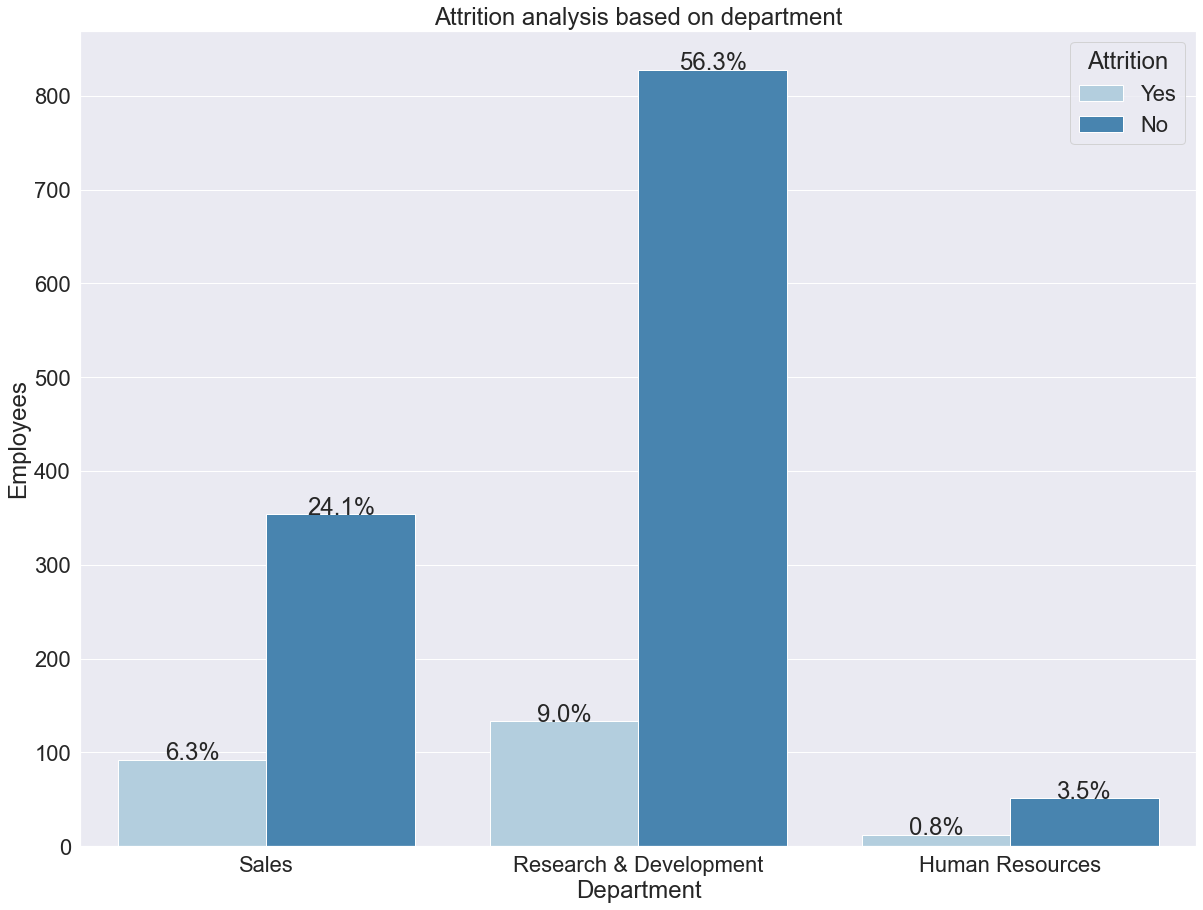

In [90]:
plt.figure(figsize=(20,15))
sns.set(font_scale=2)
total = float(len(data))
ax =sns.countplot(x='Department',
             palette = 'Blues',
             data=data,
             hue = 'Attrition')
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + (p.get_width())/2
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')   
ax.set(ylabel='Employees', title = 'Attrition analysis based on department')

data.groupby(['Attrition','Department'])['MonthlyIncome'].mean()

The R&D is the most numerous department (65% of total employees).

The highest average salary is in Sales department, the lowest is in R&D. This can be clearly seen on the income distribution graph based on department. Overall, we can see that salaries in Sales department are higher. The question is: is it affecting the attrition?

Despite the fact that Sales department has higher average salary, people leave it more often than other deprtments. Even the average "leaving" salary is quite high for this departments. It is much higher than in R&D and HR.
This can give us an idea, that even the income is quite important factor, but it is not only one which affects attrition. So the second hypothesis was true.

[Text(0, 0.5, 'Employees'), Text(0.5, 1.0, 'Job level distribuion in IBM')]

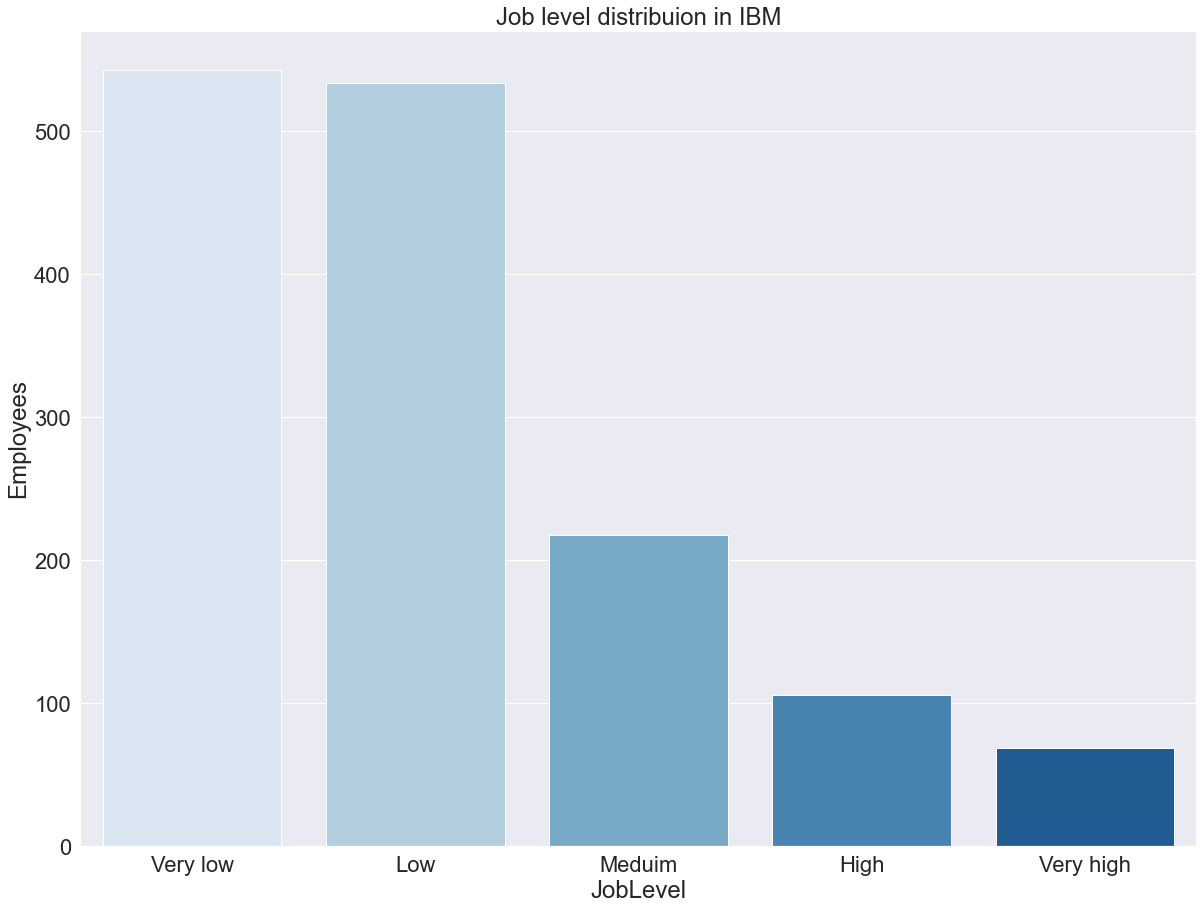

In [91]:
#job level
plt.figure(figsize=(20,15))
sns.set(font_scale=2)
ax =sns.countplot(x='JobLevel',
             palette = 'Blues',
             data=data)
ax.set_xticklabels(['Very low','Low','Meduim','High','Very high'])  
ax.set(ylabel='Employees', title = 'Job level distribuion in IBM') 

[Text(0, 0.5, 'Employees'),
 Text(0.5, 1.0, 'Attrition distribution based on job level in IBM')]

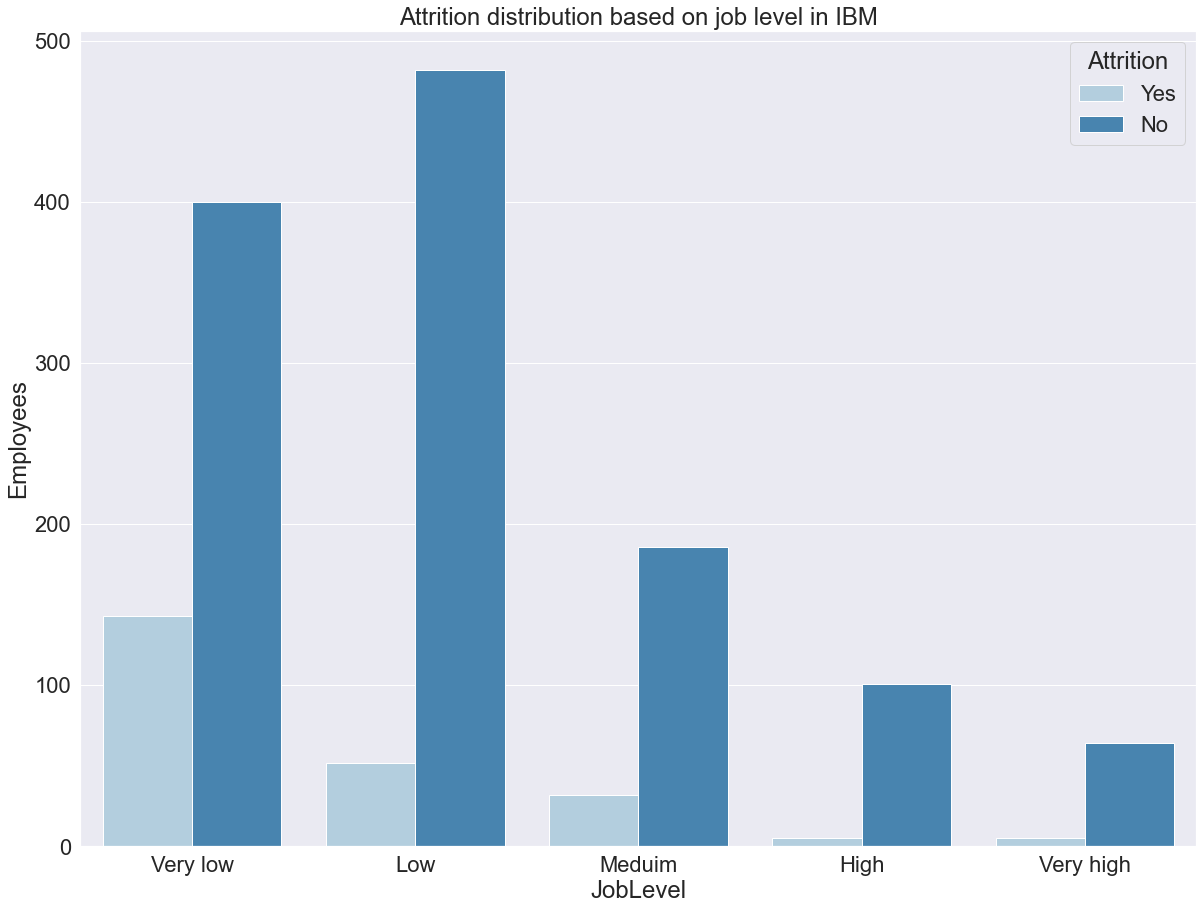

In [93]:
plt.figure(figsize=(20,15))
sns.set(font_scale=2)
ax =sns.countplot(x='JobLevel',
             palette = 'Blues',
             hue = 'Attrition',
             data=data)
ax.set_xticklabels(['Very low','Low','Meduim','High','Very high'])  
ax.set(ylabel='Employees', title = 'Attrition distribution based on job level in IBM')

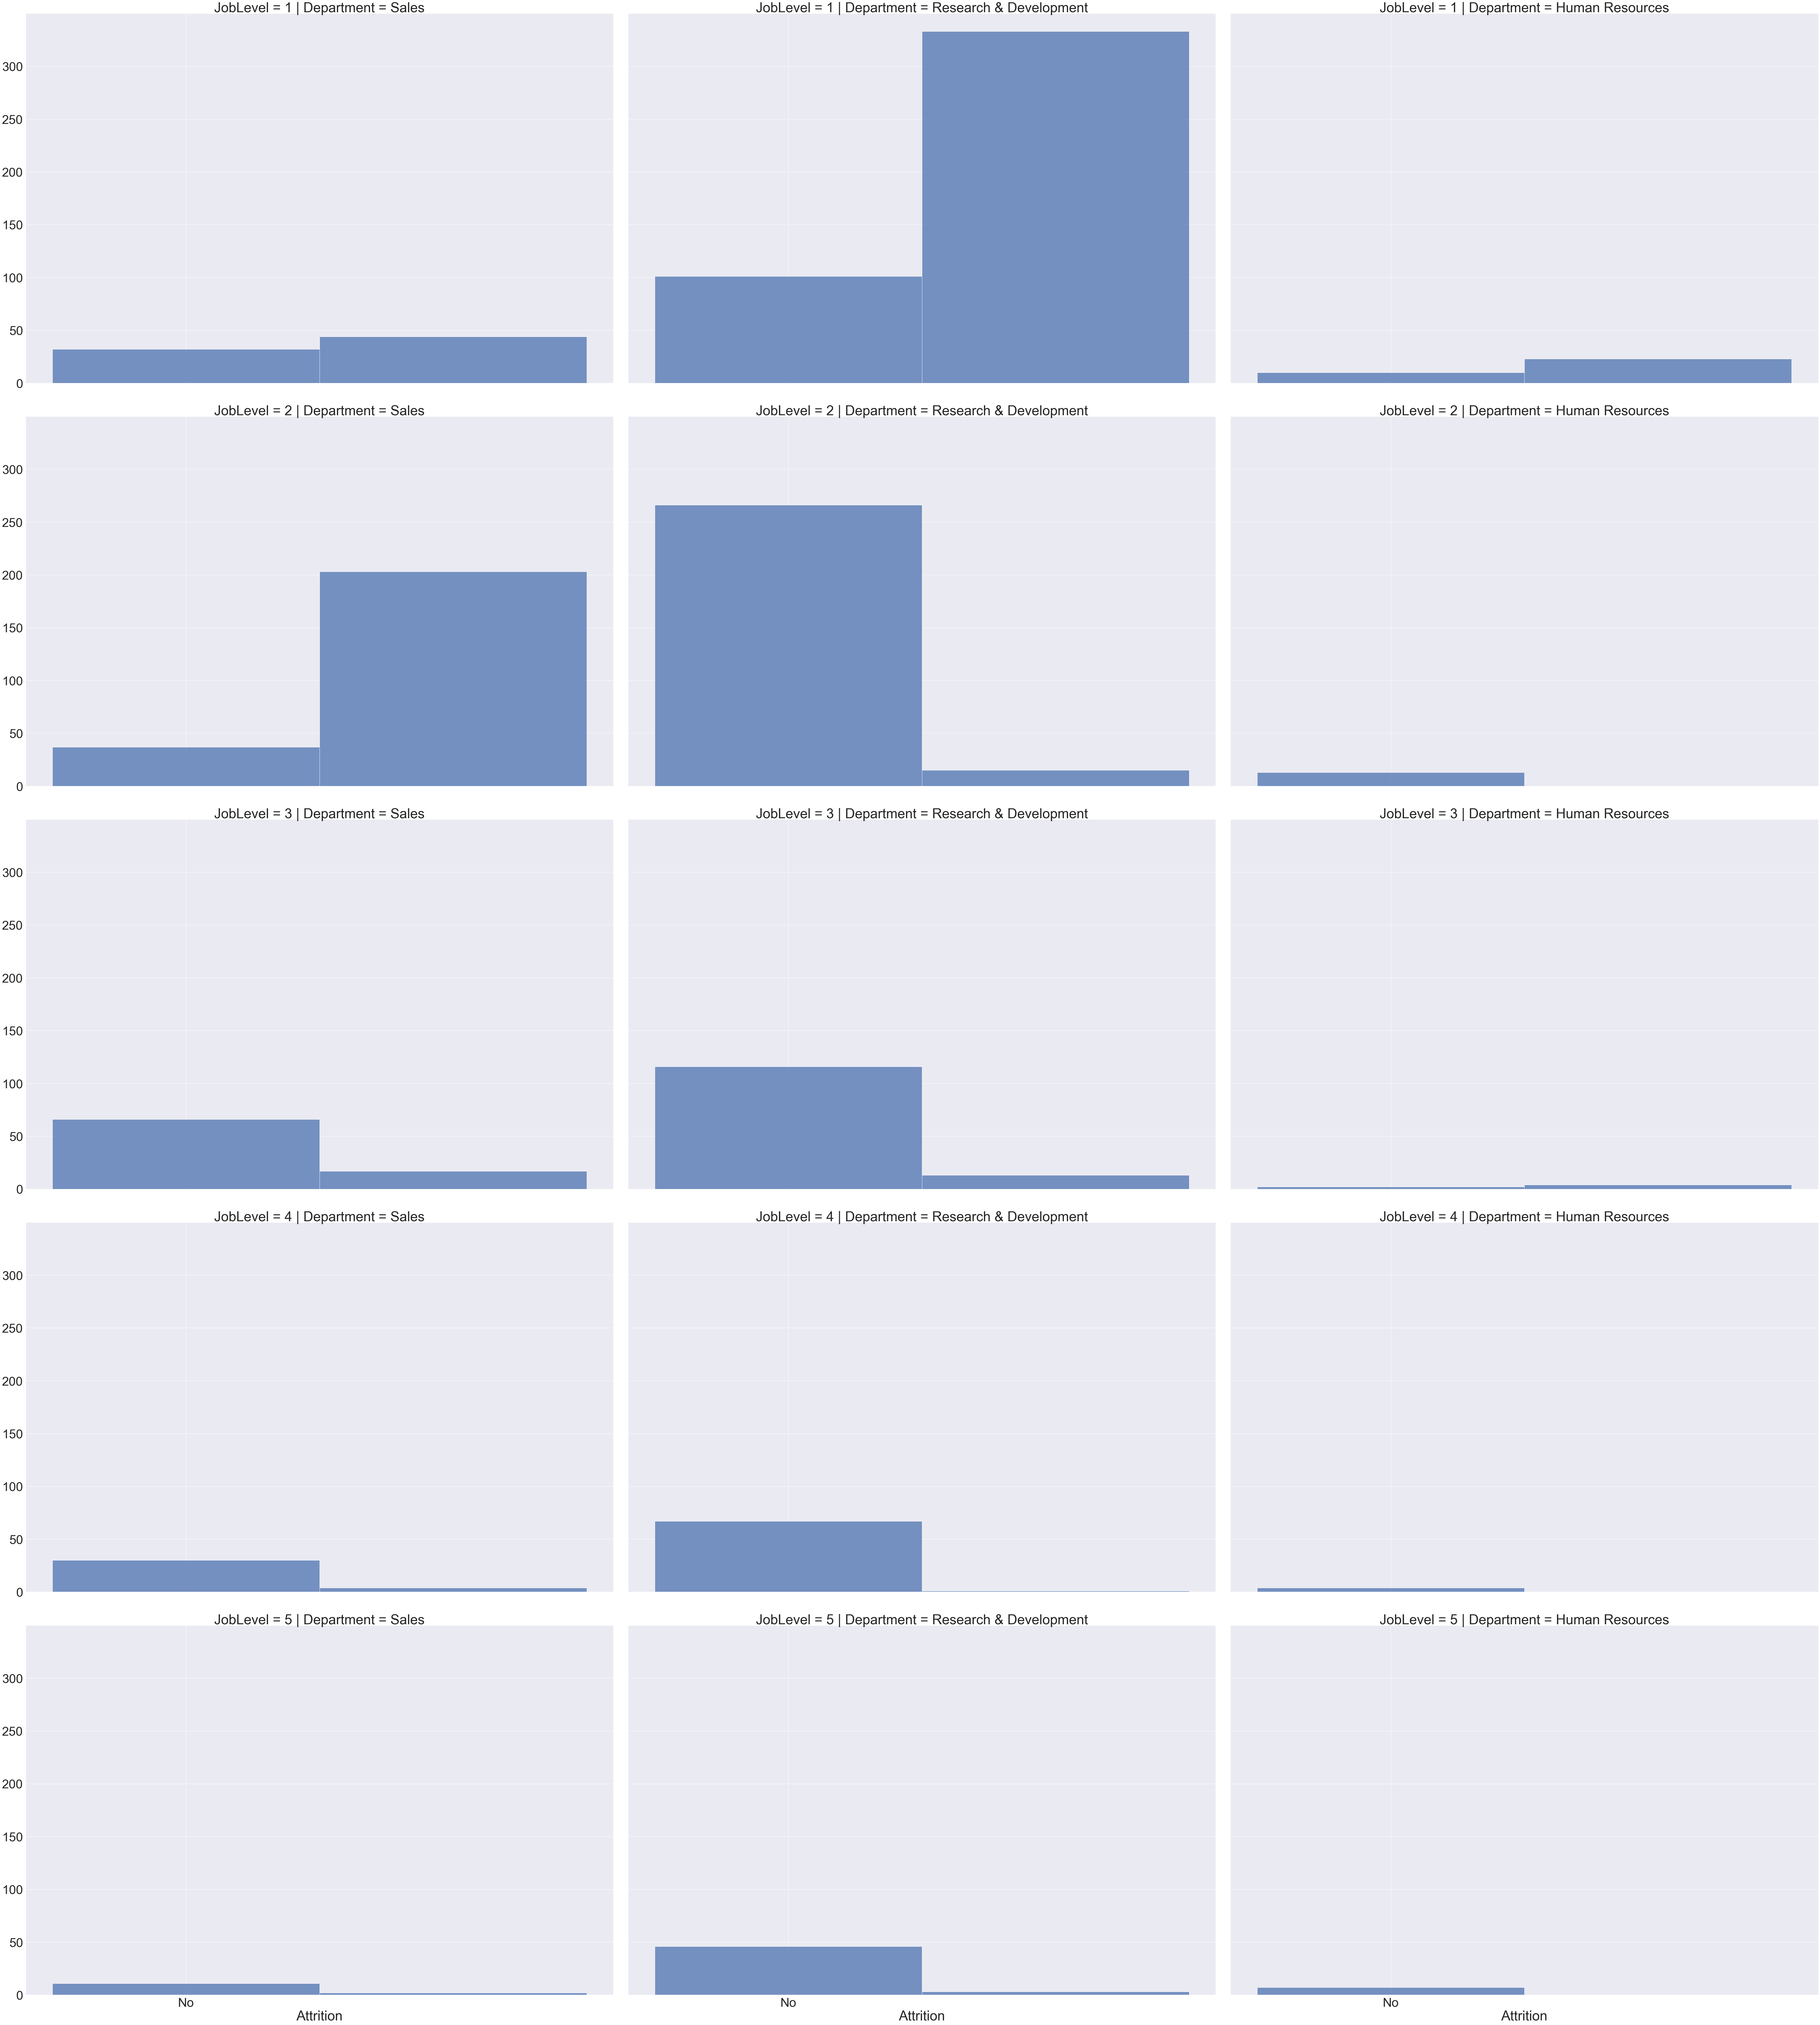

In [94]:
sns.set(font_scale=4)
g = sns.FacetGrid(data, col="Department",row = 'JobLevel',palette = 'Blues', height=20, aspect=1.5)
g.map(sns.histplot, "Attrition")


As we can see majority of employees are at low level positions, which is logical.

At the same time we can see that employees at very low and low position leave the company more often. More detailed analysis showed that mostly leaving the company:
* Salesmen at low level positions
* Researchers at very low level positions
* HR workers at very low level positions
    
Apparently there is an issue with a professional development plan for employees at lower positions. Probably they do not see a perspective to stay in the company and, because of that, quitting.
However, this should be checked with interviews and market analysis of average salaries on the similar positions.

Text(0, 0.5, '')

<Figure size 1440x1080 with 0 Axes>

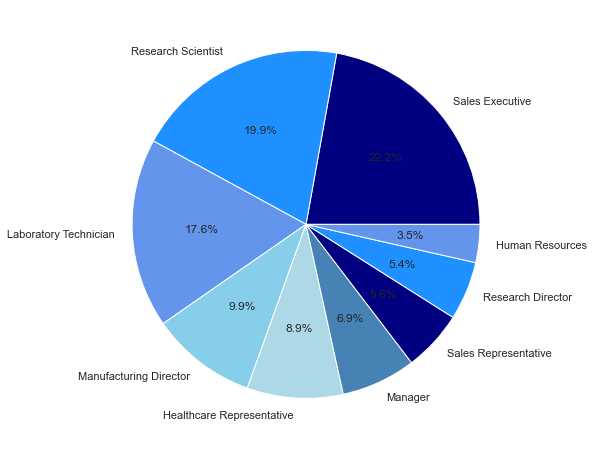

In [97]:
#job role
plt.figure(figsize=(20,15))
sns.set(font_scale=1)
plt.figure(figsize=(17,8))
data['JobRole'].value_counts().plot.pie(autopct='%1.1f%%',colors = ['navy', 'dodgerblue','cornflowerblue', 'skyblue','lightblue', 'steelblue'])
pylab.ylabel('')

JobRole
Healthcare Representative     7528.763359
Human Resources               4235.750000
Laboratory Technician         3237.169884
Manager                      17181.676471
Manufacturing Director        7295.137931
Research Director            16033.550000
Research Scientist            3239.972603
Sales Executive               6924.279141
Sales Representative          2626.000000
Name: MonthlyIncome, dtype: float64


[Text(0, 0.5, 'Average Income'),
 Text(0.5, 1.0, 'Average monthly income per job role')]

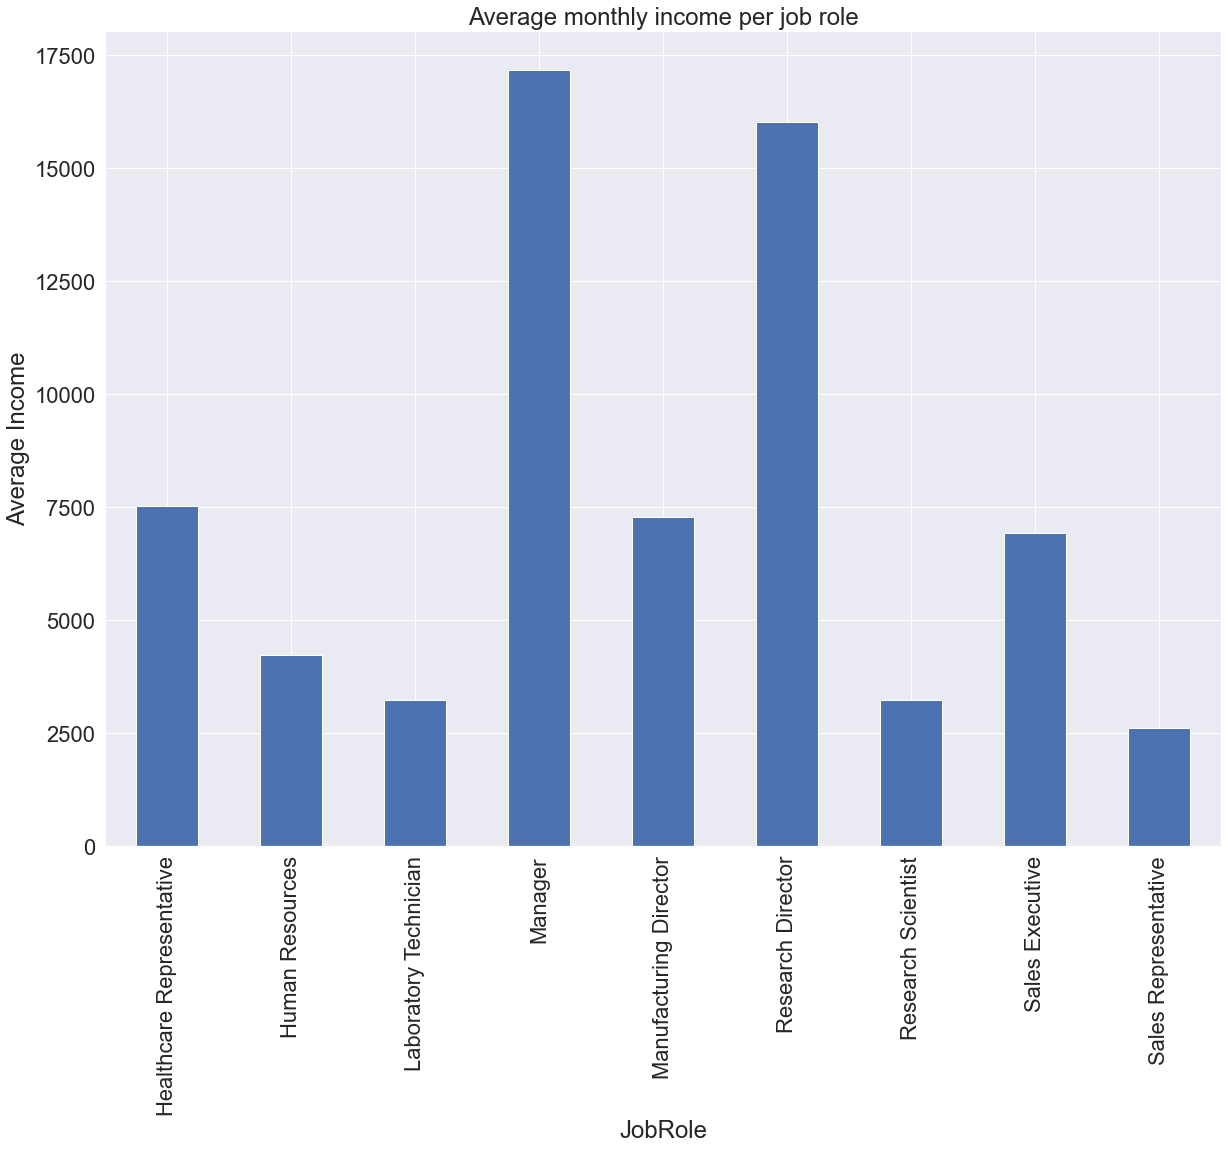

In [102]:
IncomeRole = data.groupby('JobRole').MonthlyIncome.mean()
print(IncomeRole)
plt.figure(figsize=(20,15))
sns.set(font_scale=2)
ax = IncomeRole.plot(kind="bar") 
ax.set(ylabel='Average Income', title = 'Average monthly income per job role')

[Text(0, 0.5, 'Employees'), Text(0.5, 1.0, 'Attrition rate based on job role')]

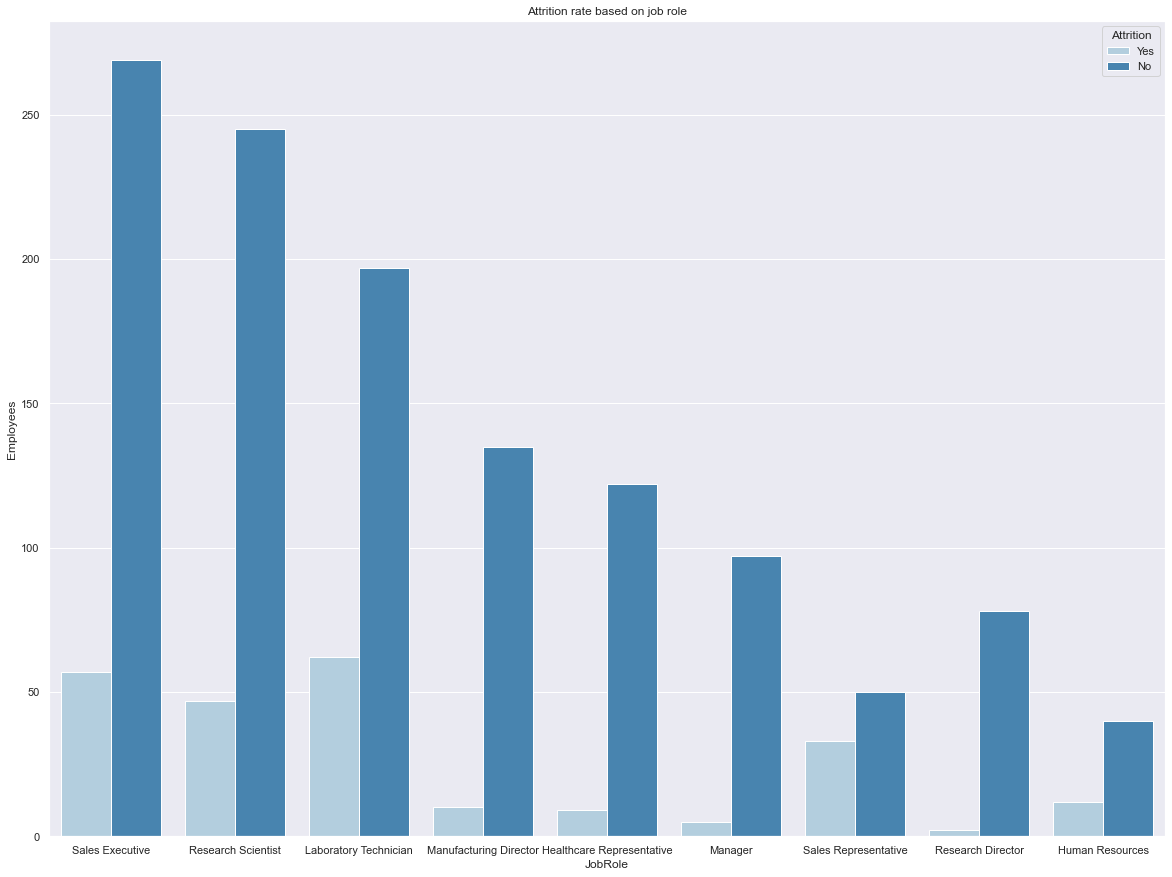

In [104]:
plt.figure(figsize=(20,15))
sns.set(font_scale=1)
ax =sns.countplot(x='JobRole',
             palette = 'Blues',
             hue = 'Attrition',
             data=data)
ax.set(ylabel='Employees', title = 'Attrition rate based on job role')

Mostly in company work research scientists and sales executives. 

As we can see the highest salary are on Manager and Research Director positions. As for the lowest: Sales representatives and laboratory technician.

If we check the attrition for these groups, we will see that workers with the lowest salary leave the company more often.
Special attenstion company should put on Sales representatives as far as they leave the company more often.


[Text(0, 0.5, 'Employees'), Text(0.5, 1.0, 'Over time per department')]

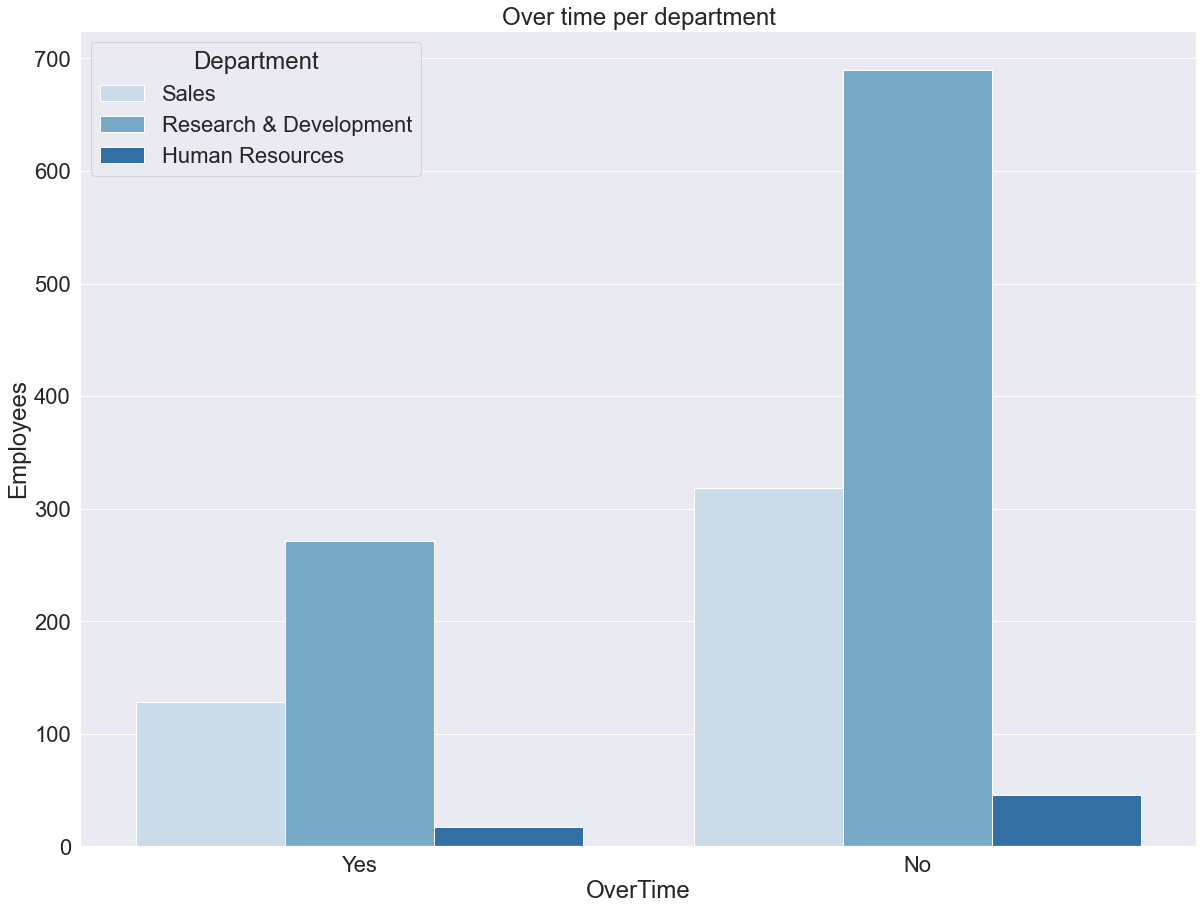

In [105]:
#Overwork and work life balance
plt.figure(figsize=(20,15))
sns.set(font_scale=2)
ax =sns.countplot(x='OverTime',
             palette = 'Blues',
             hue = 'Department',
             data=data)
ax.set(ylabel='Employees', title = 'Over time per department')

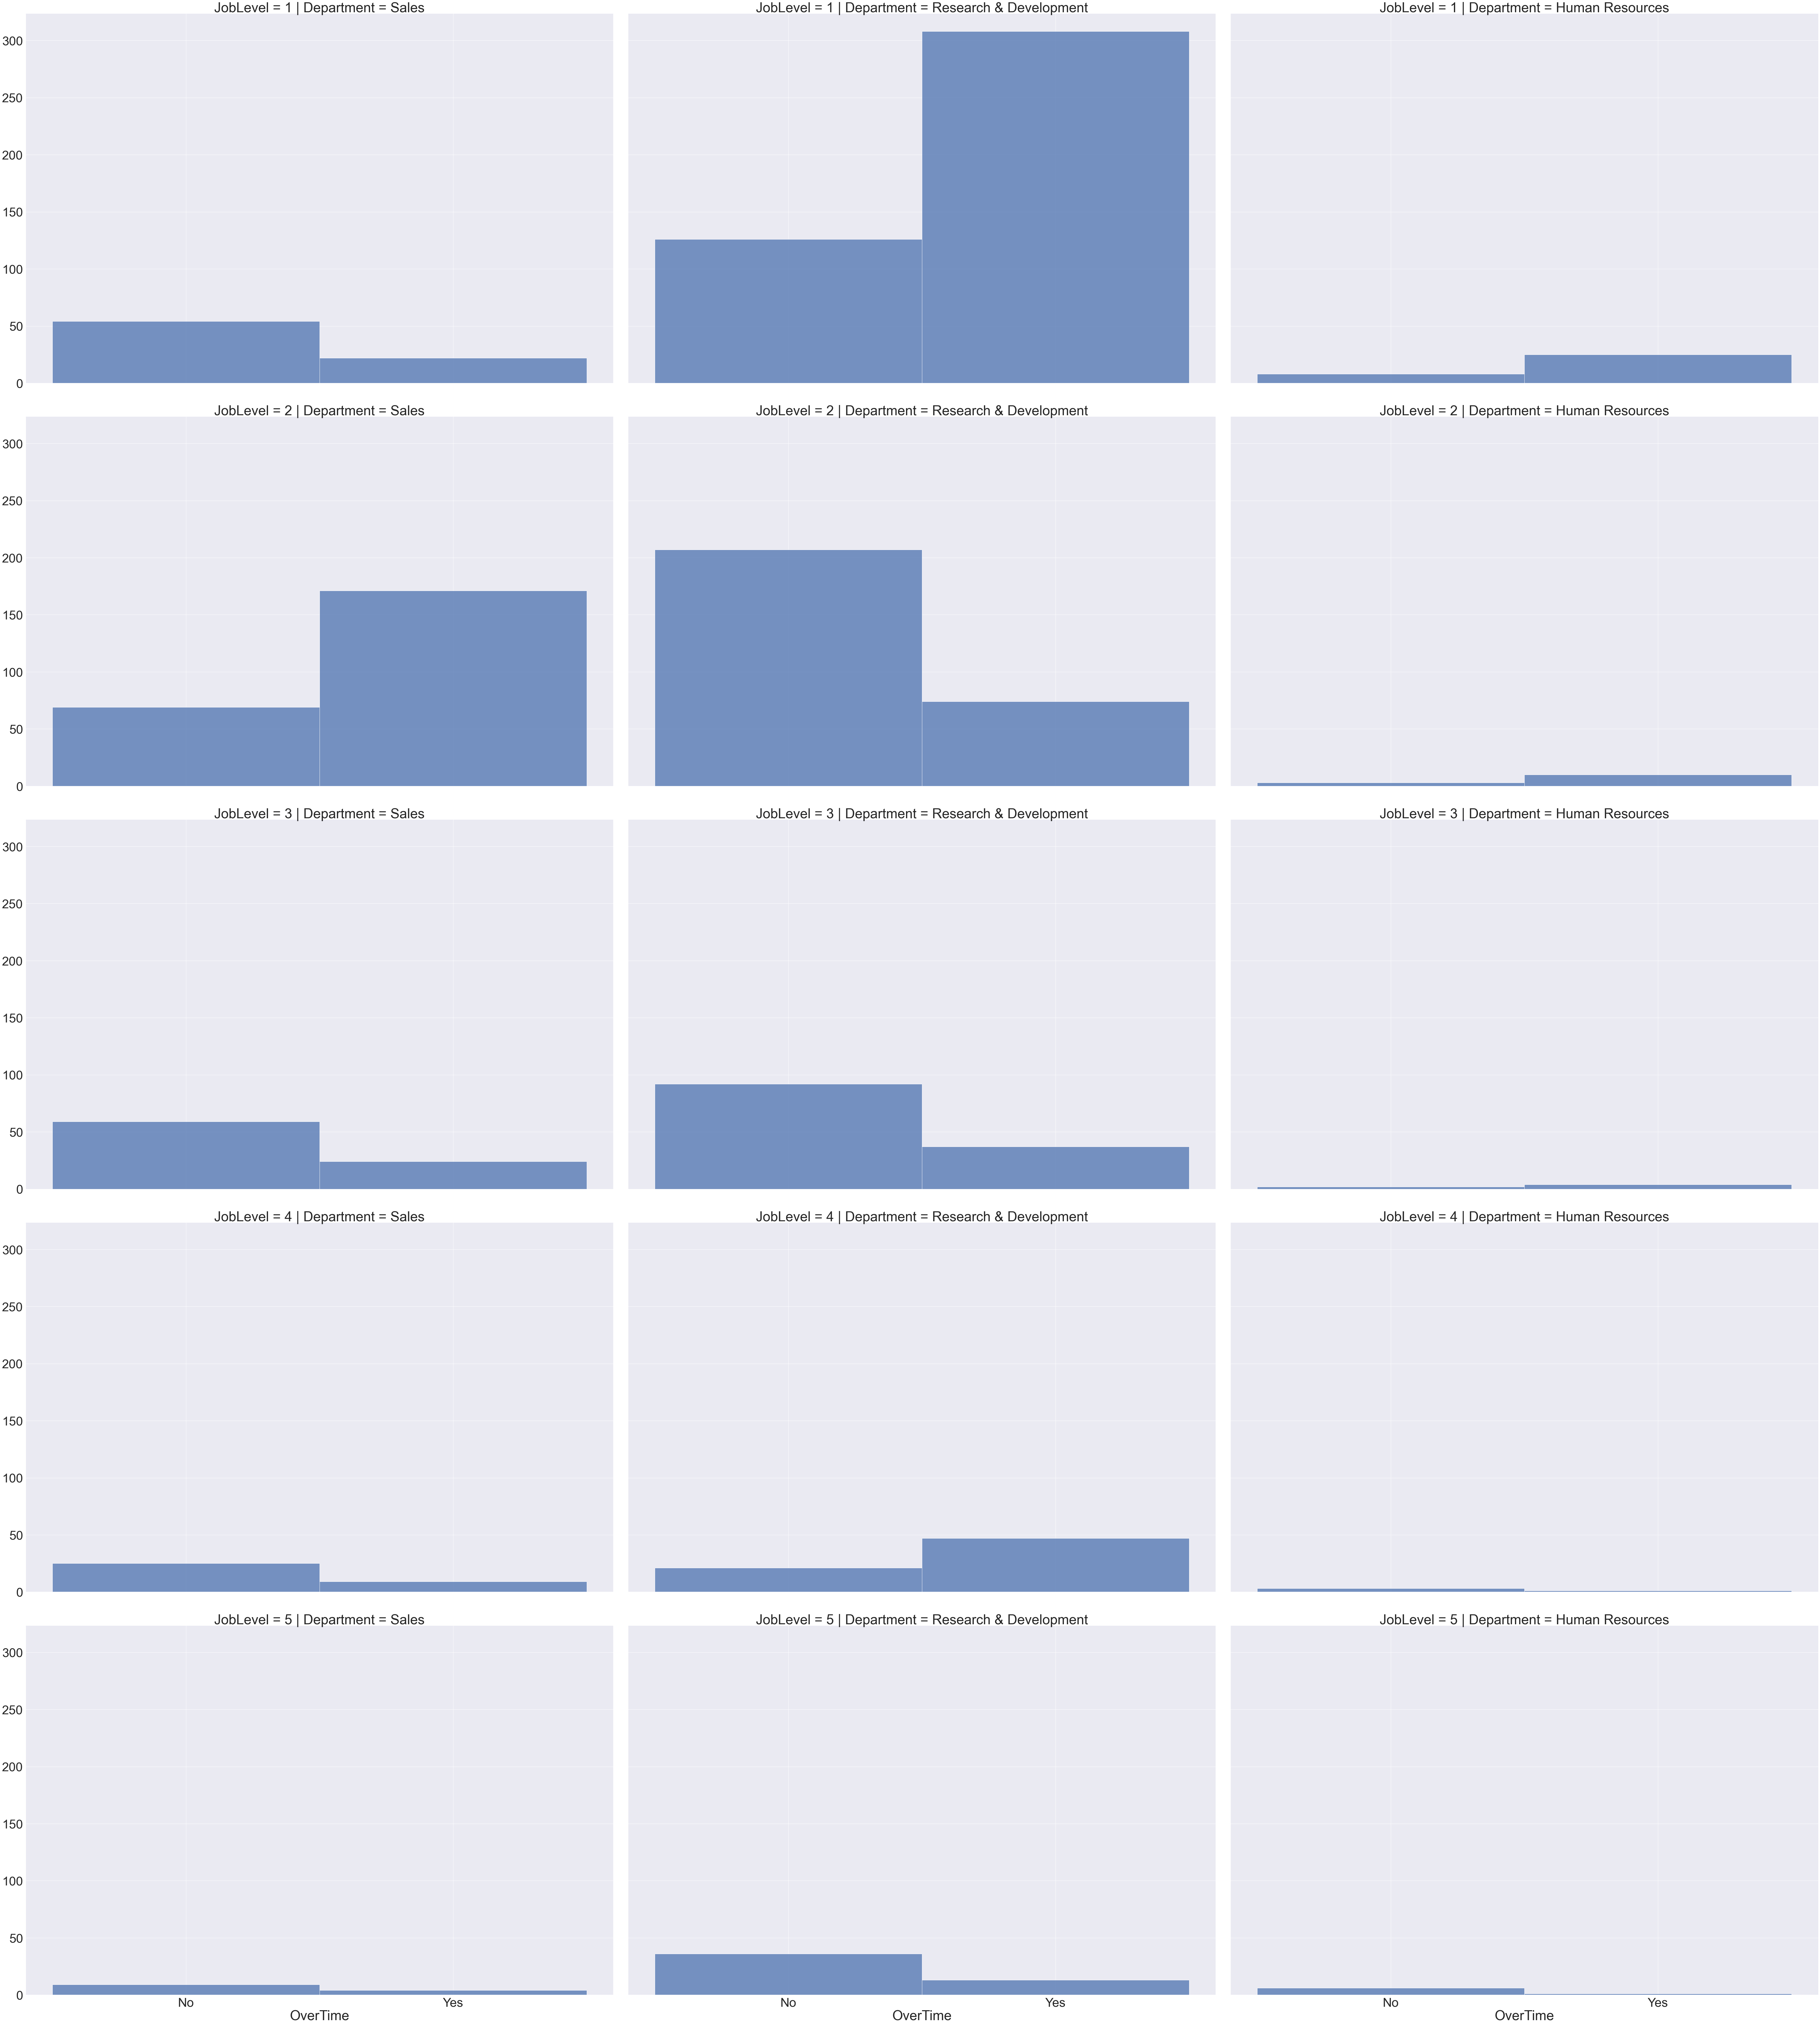

In [108]:
sns.set(font_scale=4)
g = sns.FacetGrid(data, col="Department",row = 'JobLevel',palette = 'Blues', height=20, aspect=1.5)
g.map(sns.histplot, "OverTime")

[Text(0, 0.5, 'Employees'), Text(0.5, 1.0, 'Over time per job role')]

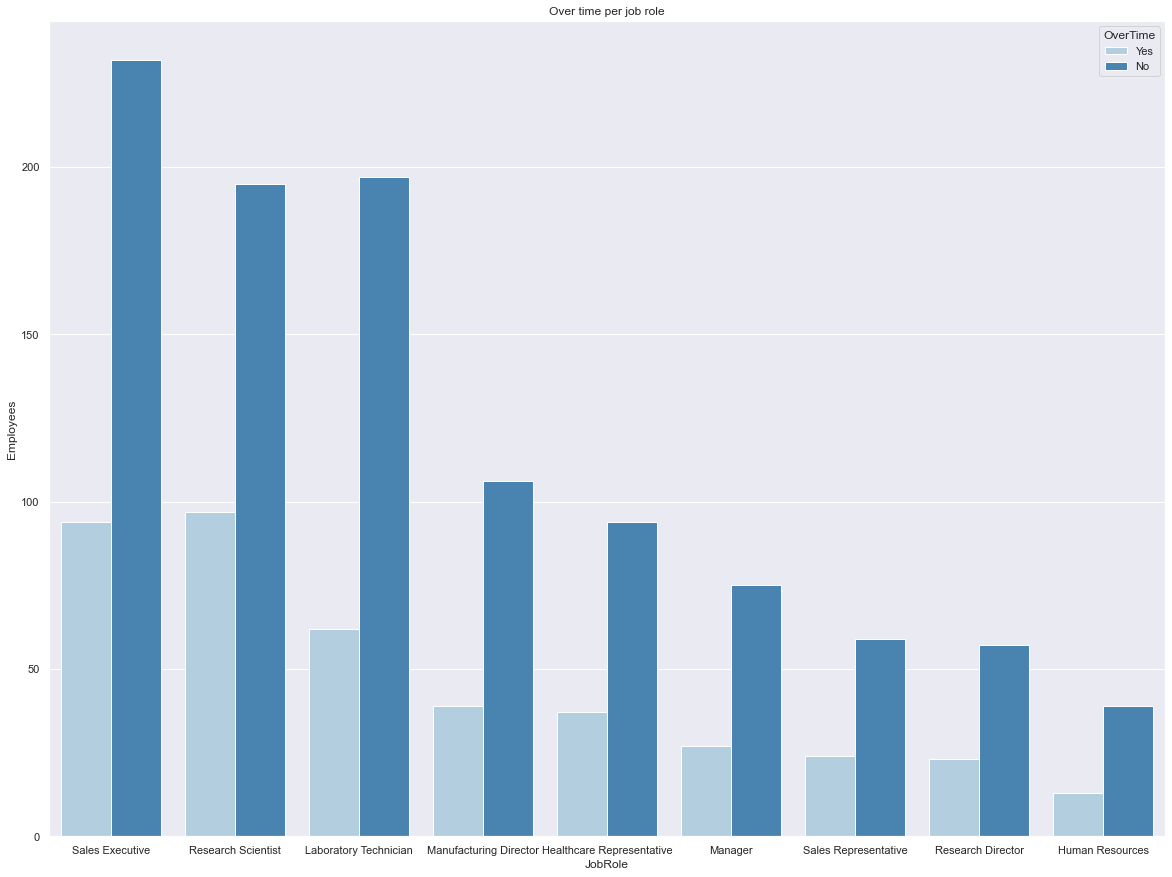

In [111]:
plt.figure(figsize=(20,15))
sns.set(font_scale=1)
ax =sns.countplot(x='JobRole',
             palette = 'Blues',
             hue = 'OverTime',
             data=data)
ax.set(ylabel='Employees', title = 'Over time per job role')

[Text(0, 0.5, 'Employees'), Text(0.5, 1.0, 'Work life balance per department')]

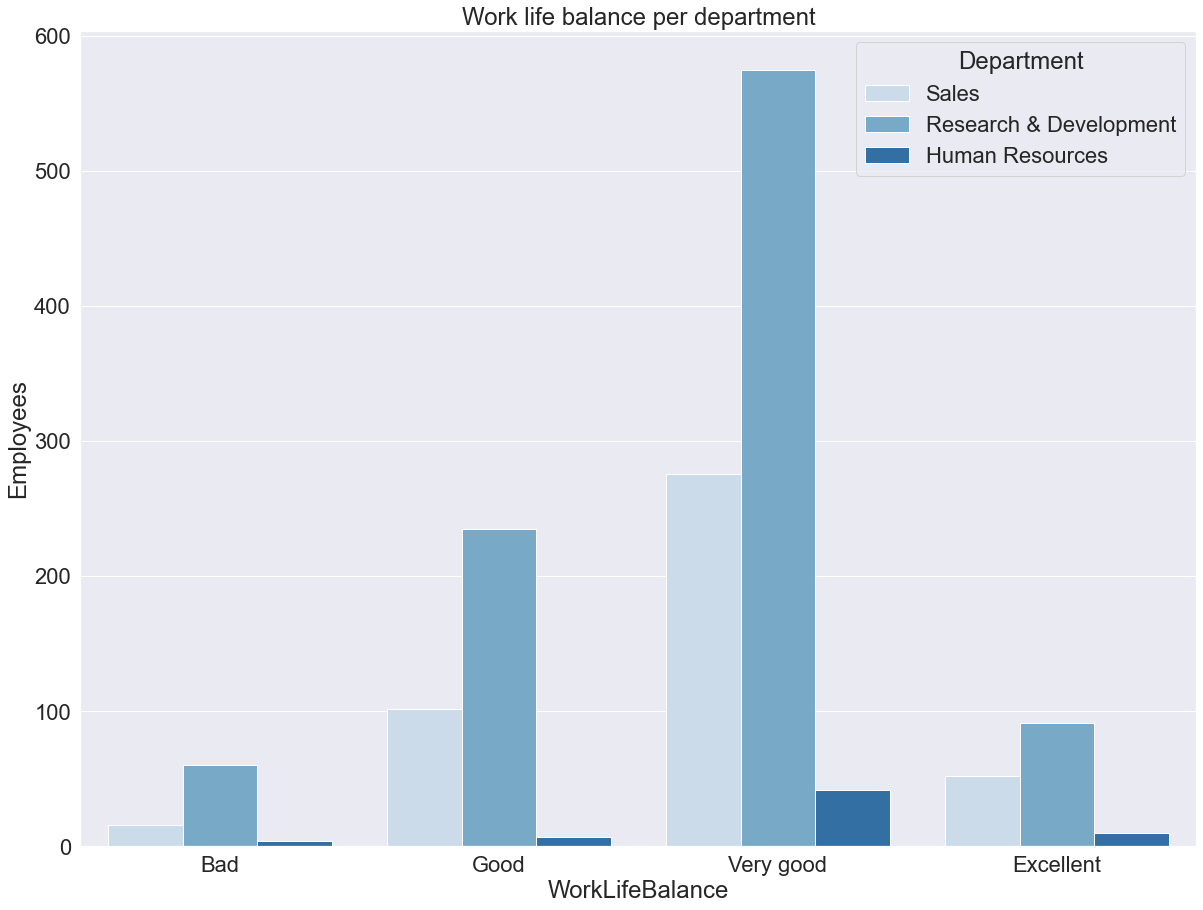

In [113]:
plt.figure(figsize=(20,15))
sns.set(font_scale=2)
ax =sns.countplot(x='WorkLifeBalance',
             palette = 'Blues',
             hue = 'Department',
             data=data)
ax.set_xticklabels(['Bad','Good','Very good','Excellent'])  
ax.set(ylabel='Employees', title = 'Work life balance per department')


[Text(0, 0.5, 'Employees'), Text(0.5, 1.0, 'Work life balance per job role')]

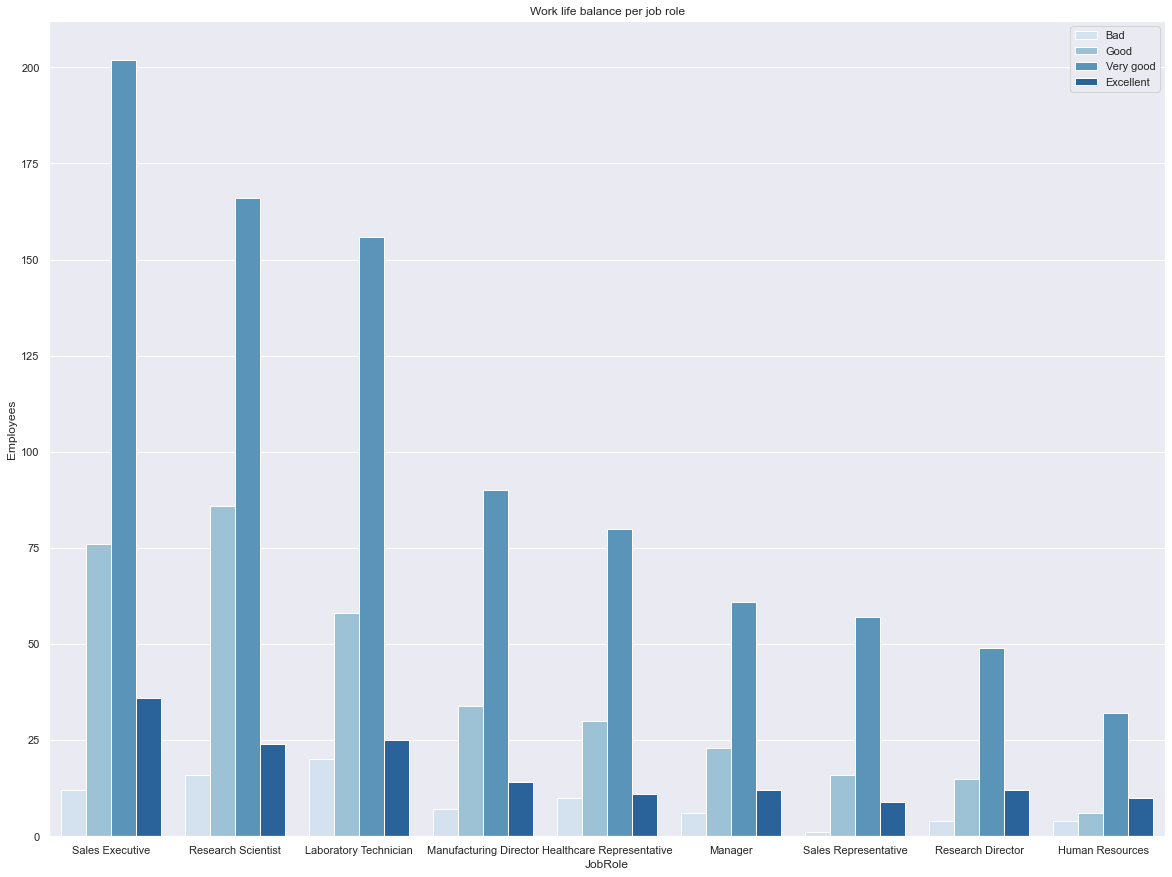

In [115]:
plt.figure(figsize=(20,15))
sns.set(font_scale=1)
ax =sns.countplot(x='JobRole',
             palette = 'Blues',
             hue = 'WorkLifeBalance',
             data=data)
ax.legend(['Bad','Good','Very good','Excellent'])  
ax.set(ylabel='Employees', title = 'Work life balance per job role')

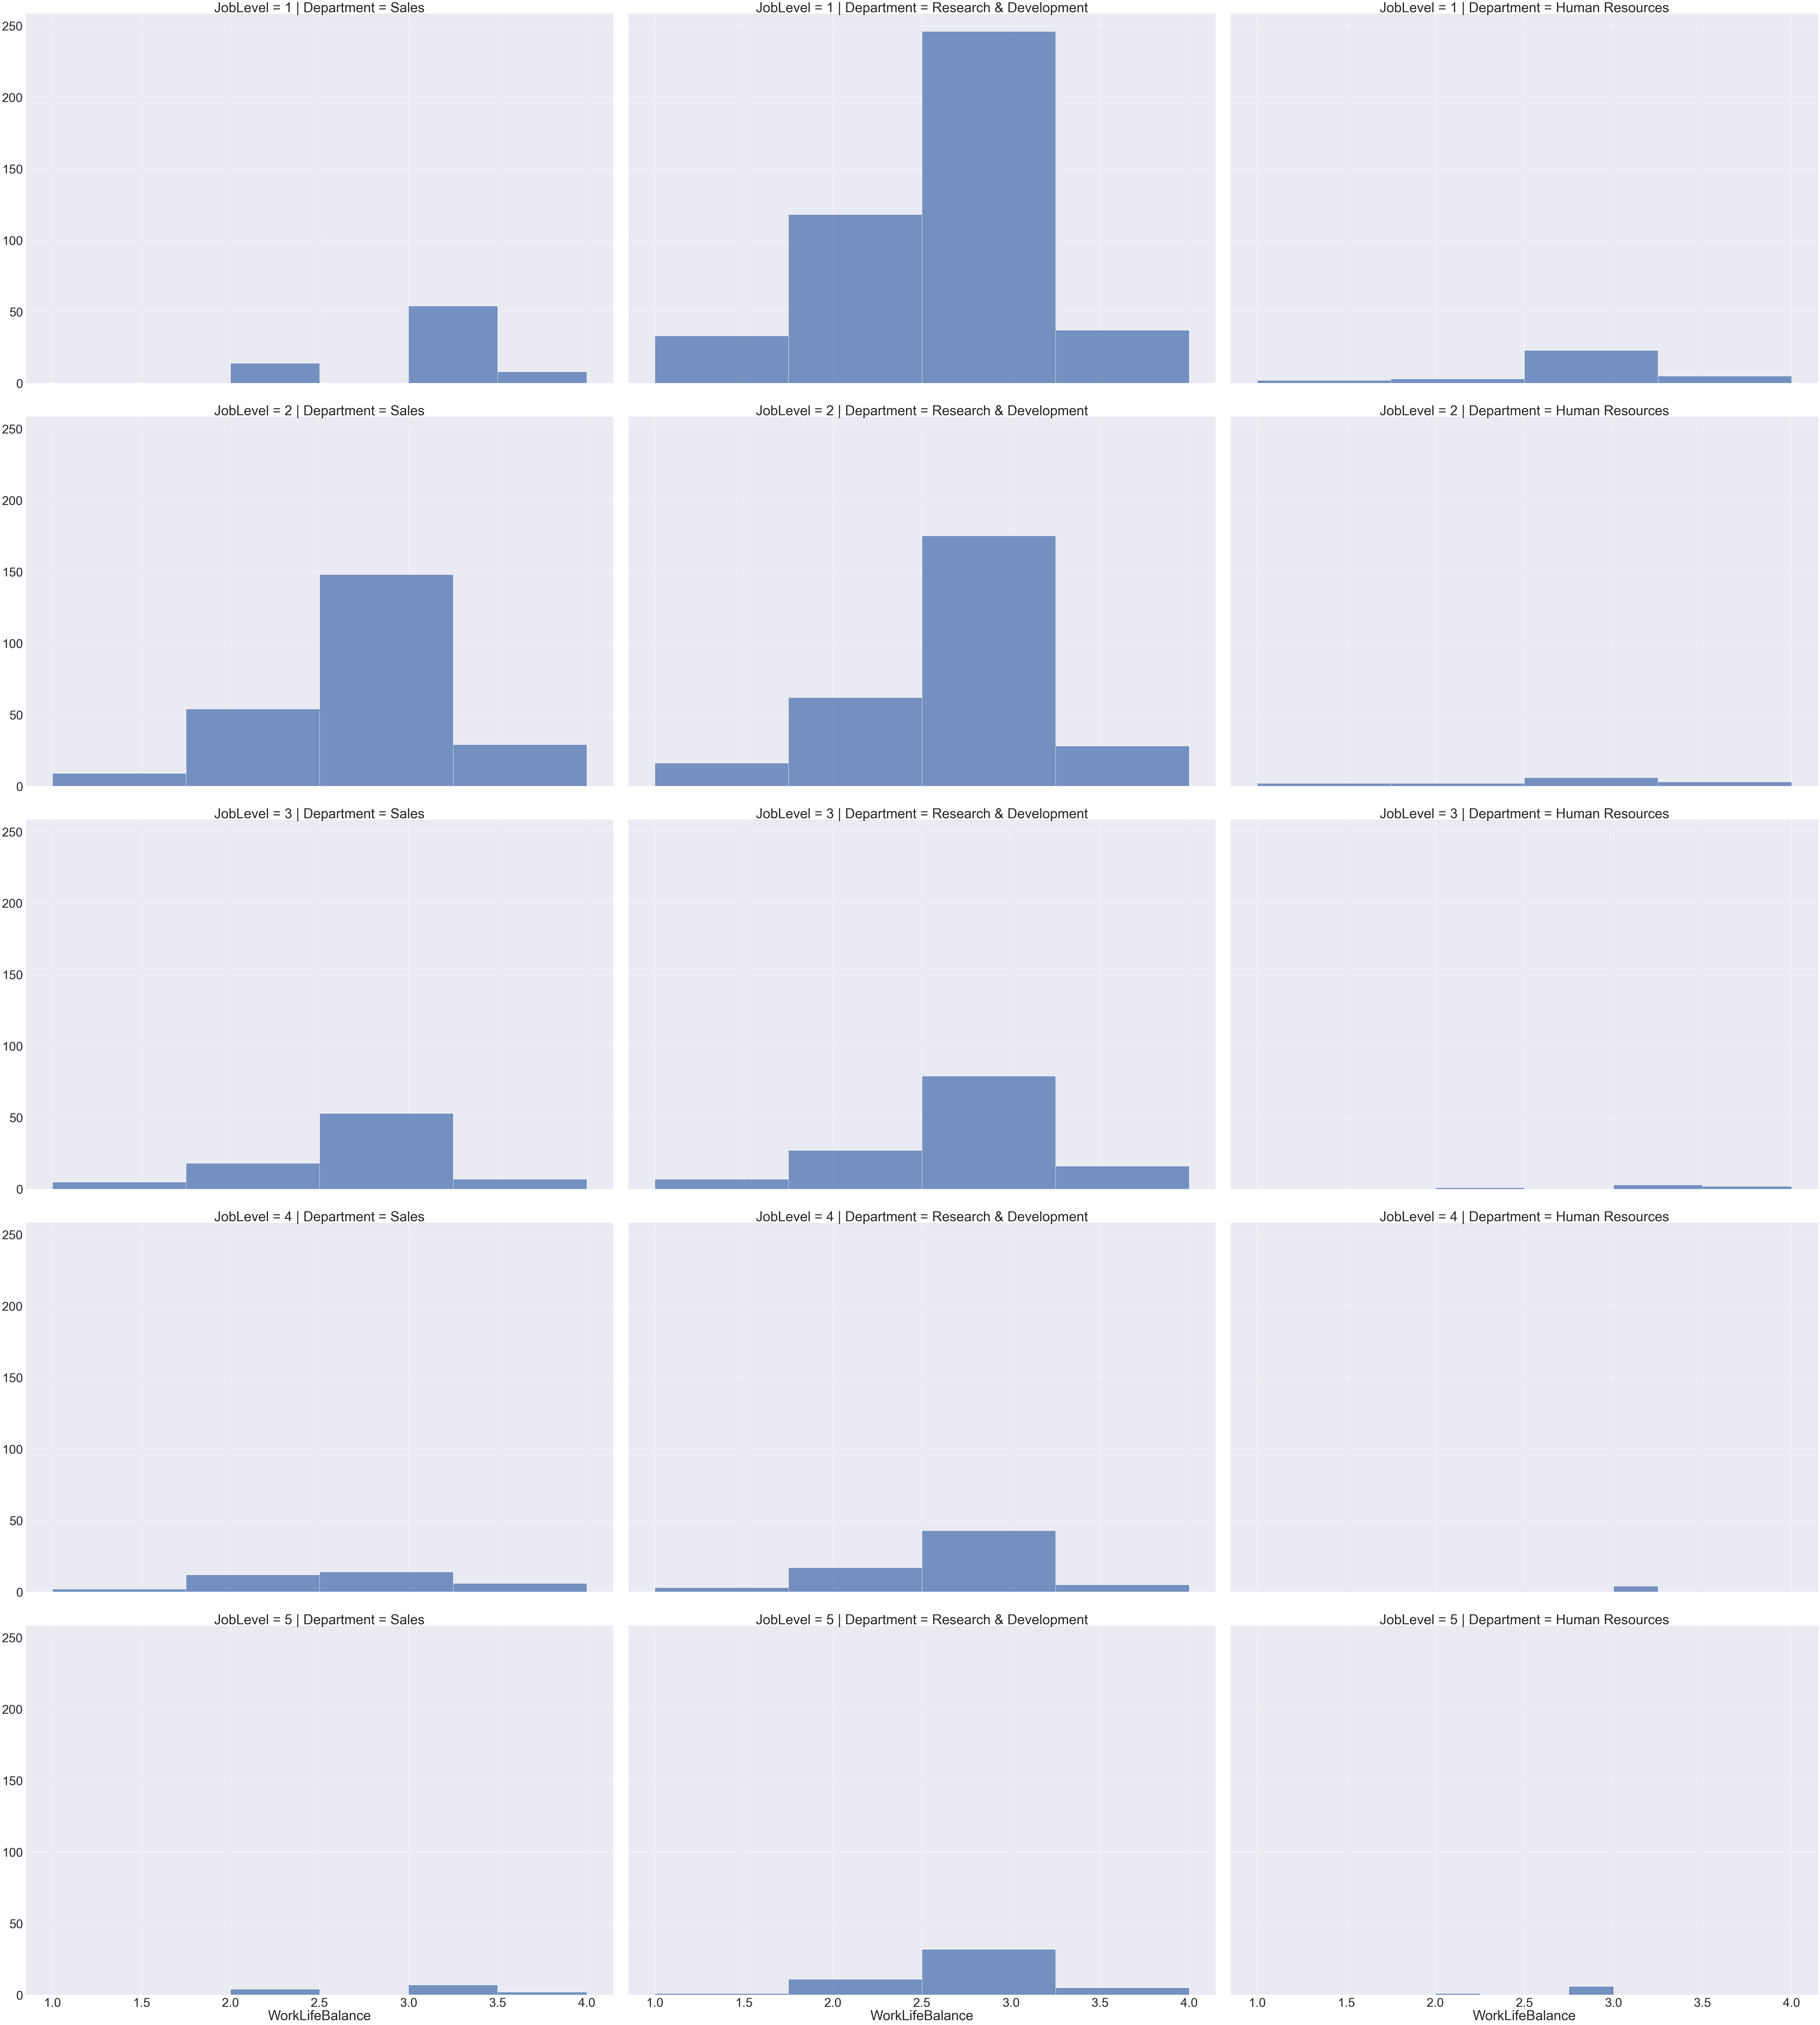

In [116]:
sns.set(font_scale=4)
g = sns.FacetGrid(data, col="Department",row = 'JobLevel',palette = 'Blues', height=20, aspect=1.5)
g.map(sns.histplot, "WorkLifeBalance", bins =4)

[Text(0, 0.5, 'Employees'),
 Text(0.5, 1.0, 'Attrition distribution based on work life balance')]

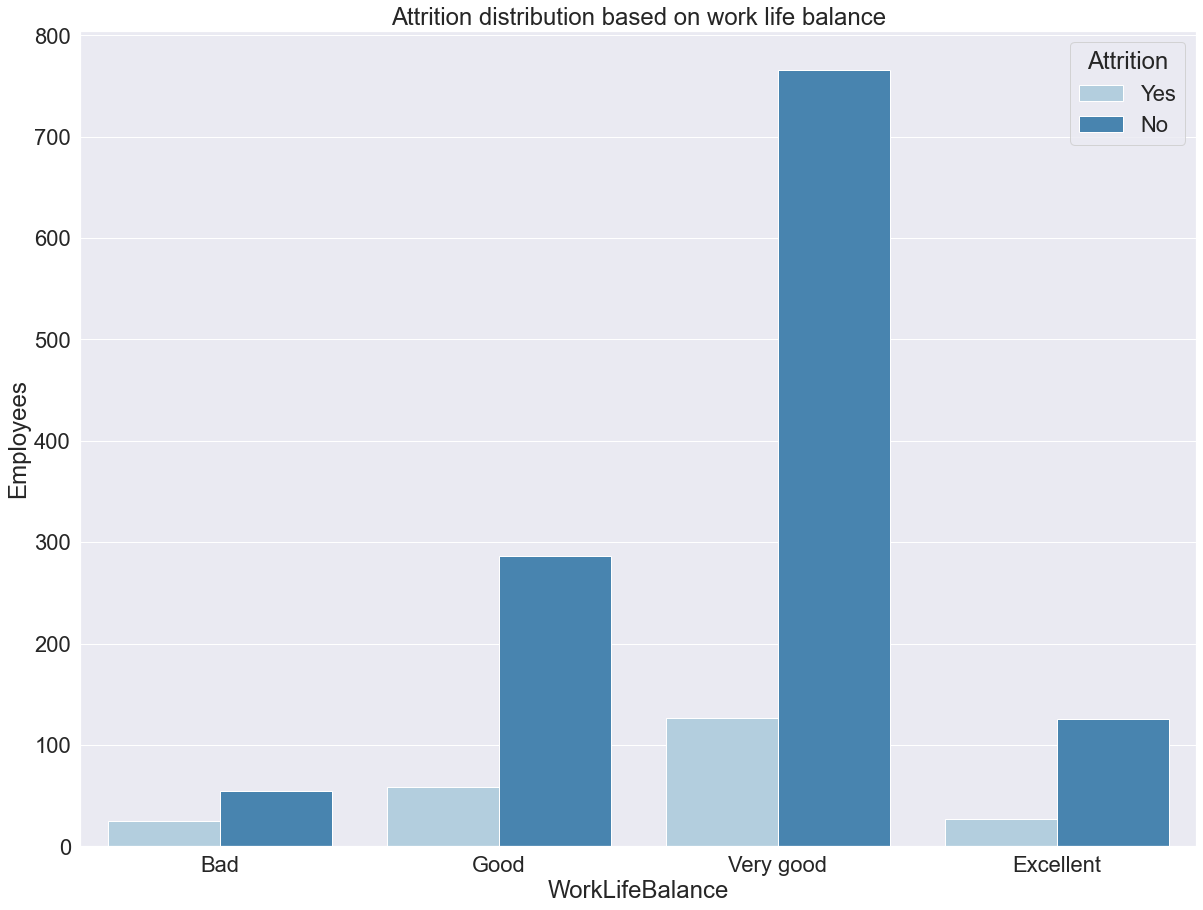

In [118]:
plt.figure(figsize=(20,15))
sns.set(font_scale=2)
ax =sns.countplot(x='WorkLifeBalance',
             palette = 'Blues',
             hue = 'Attrition',
             data=data)
ax.set_xticklabels(['Bad','Good','Very good','Excellent'])  
ax.set(ylabel='Employees', title = 'Attrition distribution based on work life balance')

In each department, we can see the overtime work. 
Looking more at the workload, we noticed that at a low level position the overtime work can be noticed much more often than on high and medium positions. Mostly overworking:
* Employees on very low level positions in R&D
* Employees on low level positions in Sales
* Employees on low and very low positions in HR

However, as for employees' feelings about work-life balance, we can say that the majority find it very good. It can be seen on the department split as well as on job role split and job level split.
This can give us an idea that there is probably a problem with job distribution at low level positions because we can see totally different answers.
However, we can see clearly that workers which have bad work-life balance leave the company more often than others. 

[Text(0, 0.5, 'Employees'),
 Text(0.5, 1.0, 'Attrition distribution based on job satisfaction')]

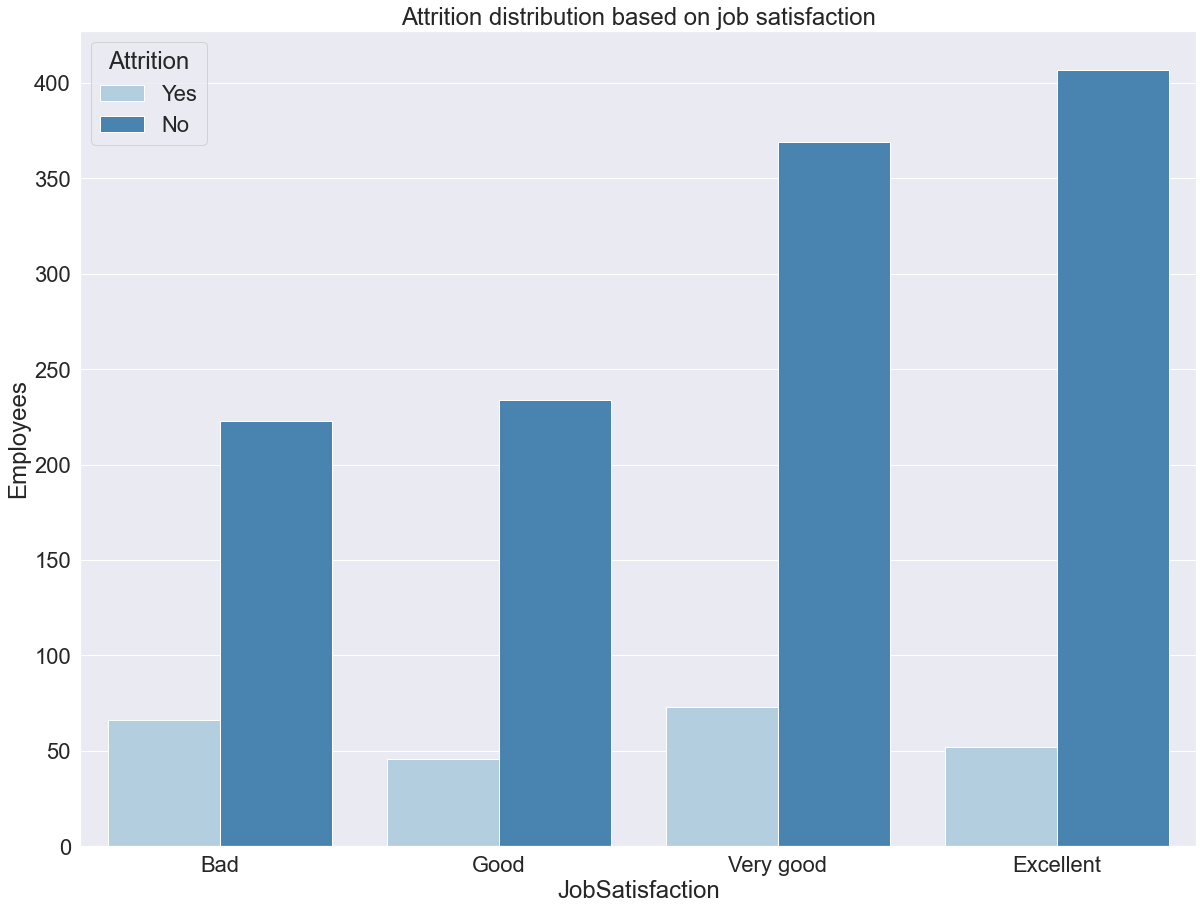

In [119]:
#Job and environment satisfaction
plt.figure(figsize=(20,15))
sns.set(font_scale=2)
ax =sns.countplot(x='JobSatisfaction',
             palette = 'Blues',
             hue = 'Attrition',
             data=data)
ax.set_xticklabels(['Bad','Good','Very good','Excellent'])  
ax.set(ylabel='Employees', title = 'Attrition distribution based on job satisfaction')

[Text(0, 0.5, 'Employees'), Text(0.5, 1.0, 'Job satisfaction per job role')]

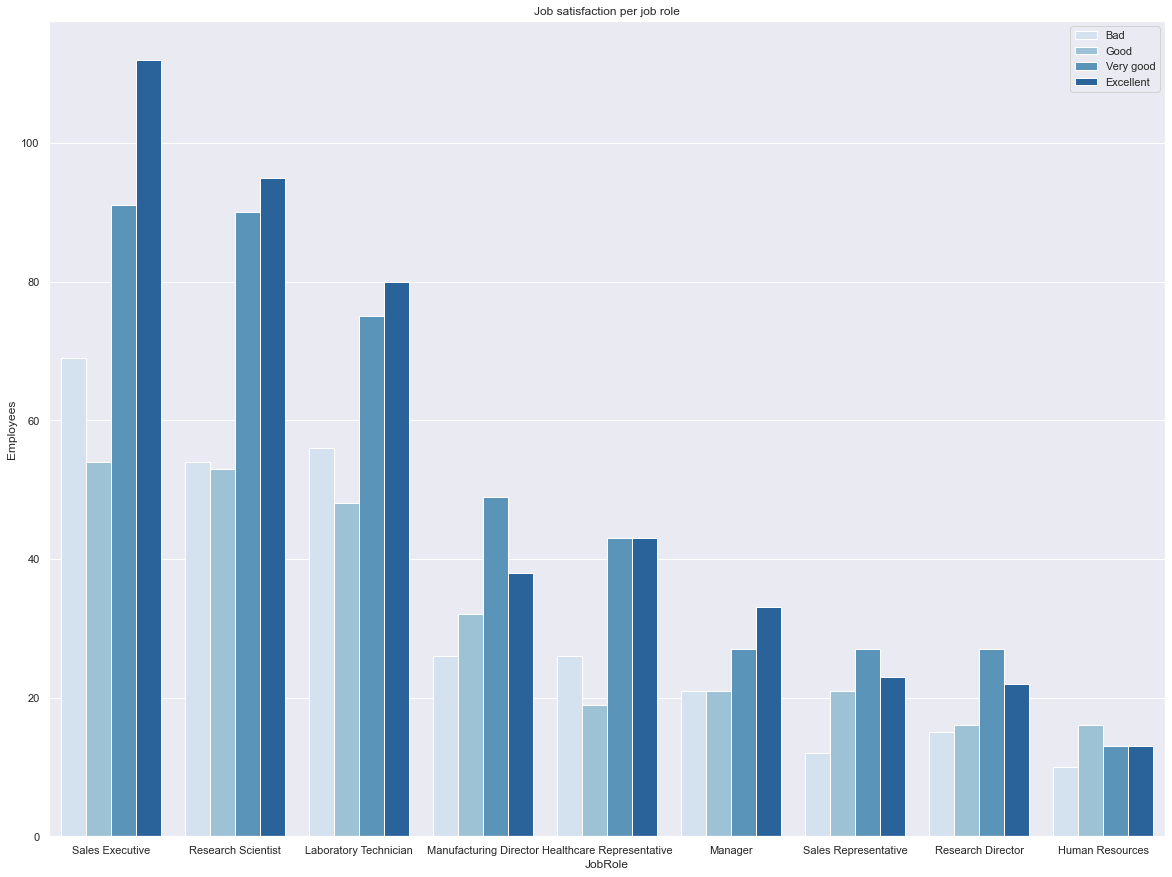

In [133]:
plt.figure(figsize=(20,15))
sns.set(font_scale=1)
ax =sns.countplot(x='JobRole',
             palette = 'Blues',
             hue = 'JobSatisfaction',
             data=data)
ax.legend(['Bad','Good','Very good','Excellent'])  
ax.set(ylabel='Employees', title = 'Job satisfaction per job role')

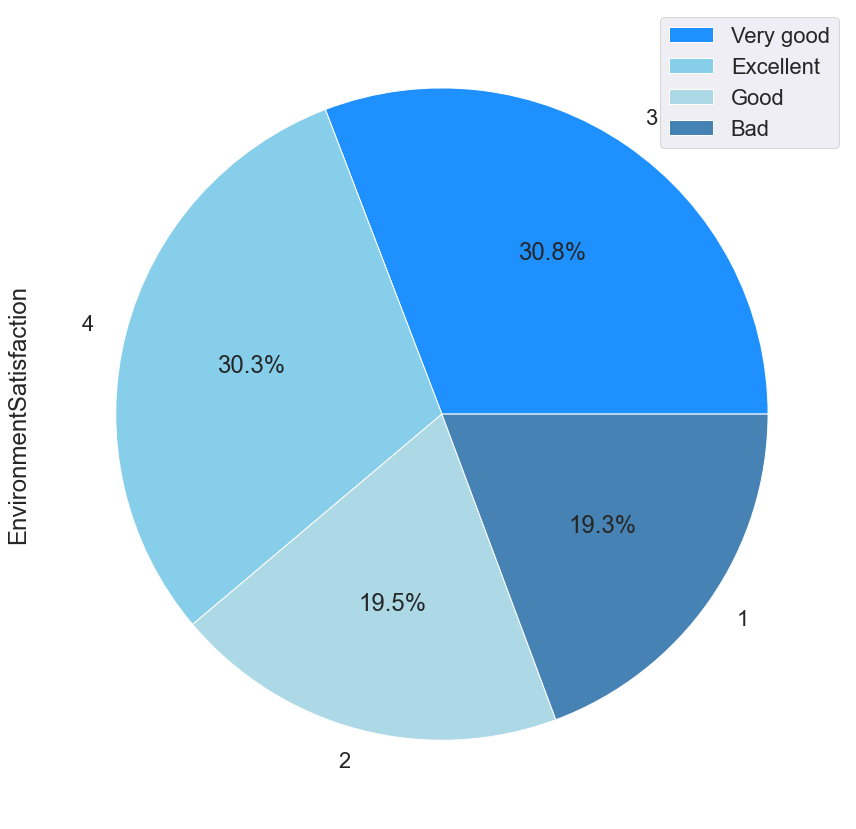

In [122]:
plt.figure(figsize=(20,15))
sns.set(font_scale=2)
data['EnvironmentSatisfaction'].value_counts().plot.pie(autopct='%1.1f%%',colors = ['dodgerblue', 'skyblue','lightblue', 'steelblue'])
labels = ['Very good','Excellent','Good', 'Bad']
plt.legend(labels, loc="best")

[Text(0, 0.5, 'Employees'),
 Text(0.5, 1.0, 'Attrition distribution based on environment satisfaction')]

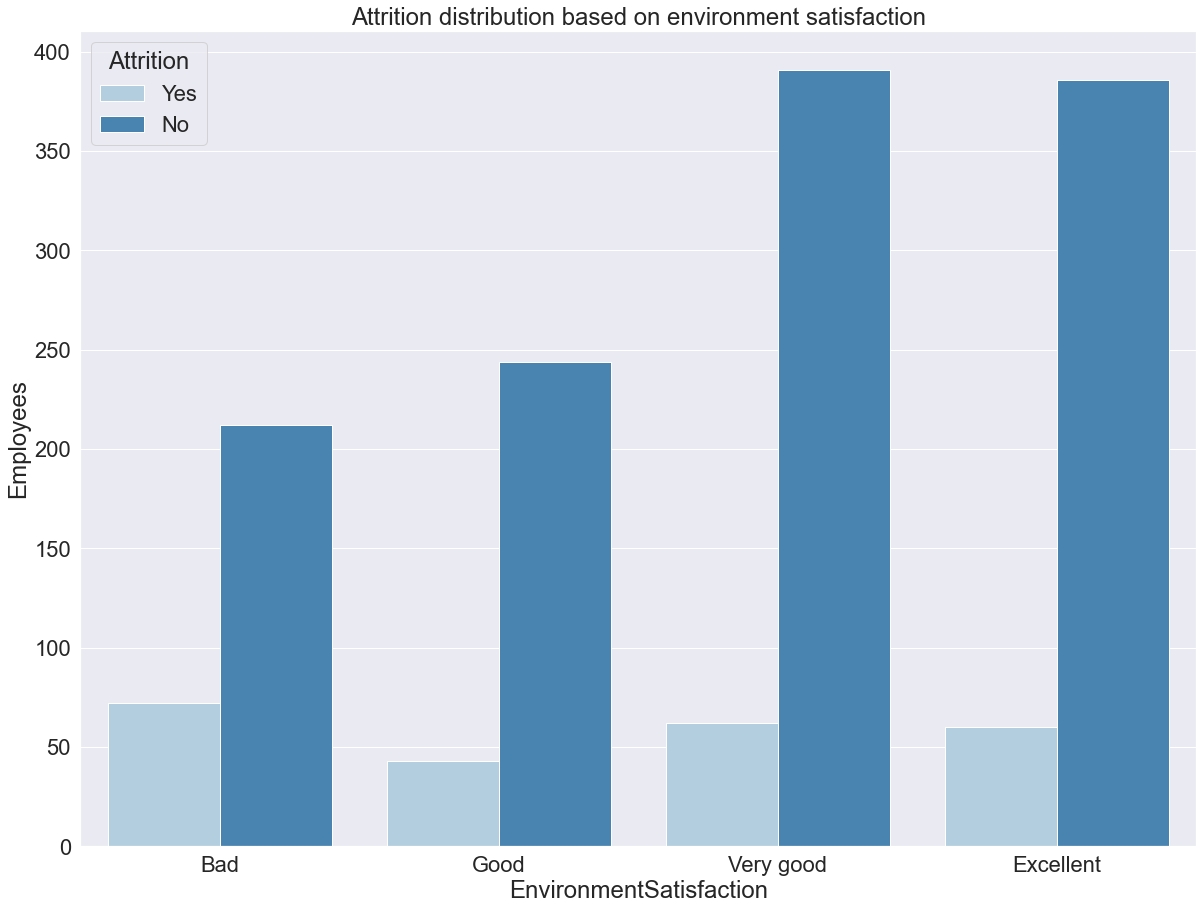

In [123]:
plt.figure(figsize=(20,15))
sns.set(font_scale=2)
ax =sns.countplot(x='EnvironmentSatisfaction',
             palette = 'Blues',
             hue = 'Attrition',
             data=data)
ax.set_xticklabels(['Bad','Good','Very good','Excellent'])  
ax.set(ylabel='Employees', title = 'Attrition distribution based on environment satisfaction')

[Text(0, 0.5, 'Employees'),
 Text(0.5, 1.0, 'Environment satisfaction per department')]

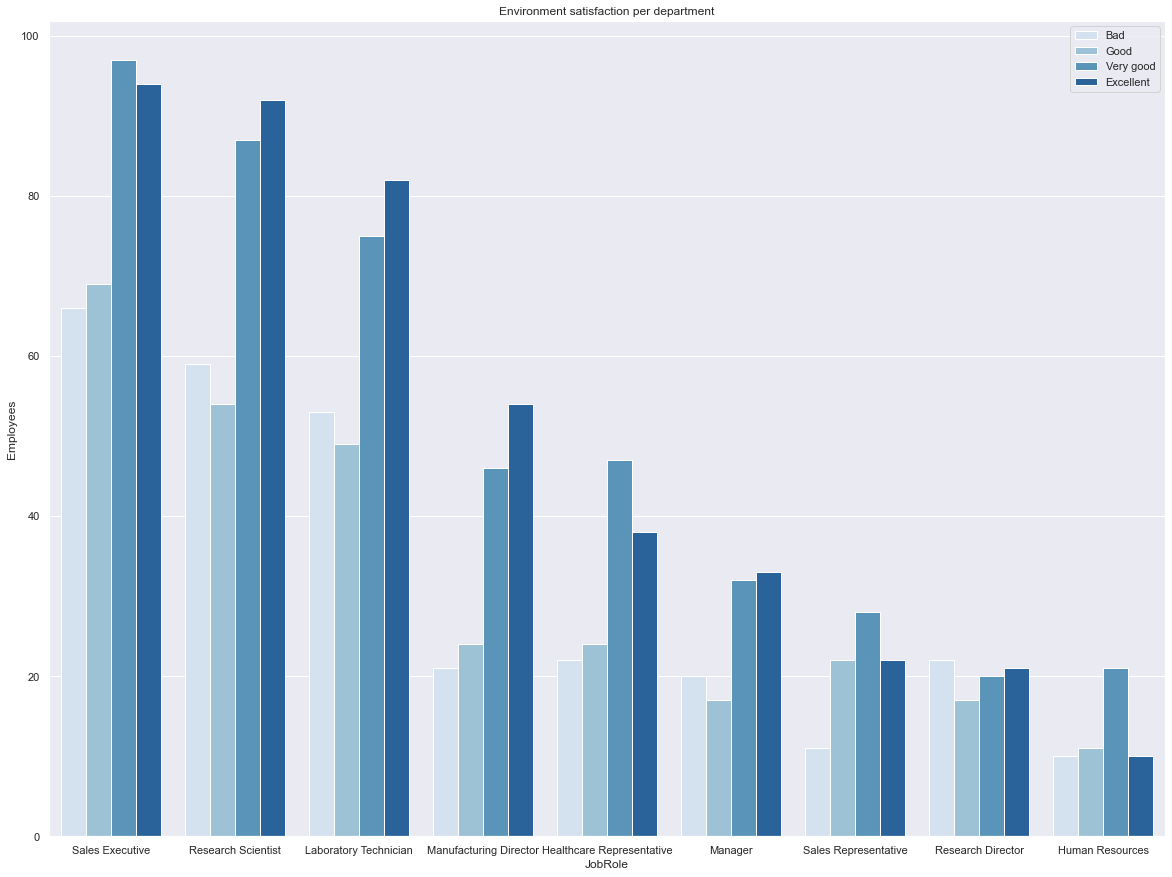

In [125]:
plt.figure(figsize=(20,15))
sns.set(font_scale=1)
ax =sns.countplot(x='JobRole',
             palette = 'Blues',
             hue = 'EnvironmentSatisfaction',
             data=data)
ax.legend(['Bad','Good','Very good','Excellent'])  
ax.set(ylabel='Employees', title = 'Environment satisfaction per department')

[Text(0, 0.5, 'Employees'), Text(0.5, 1.0, 'Job Involvement per department')]

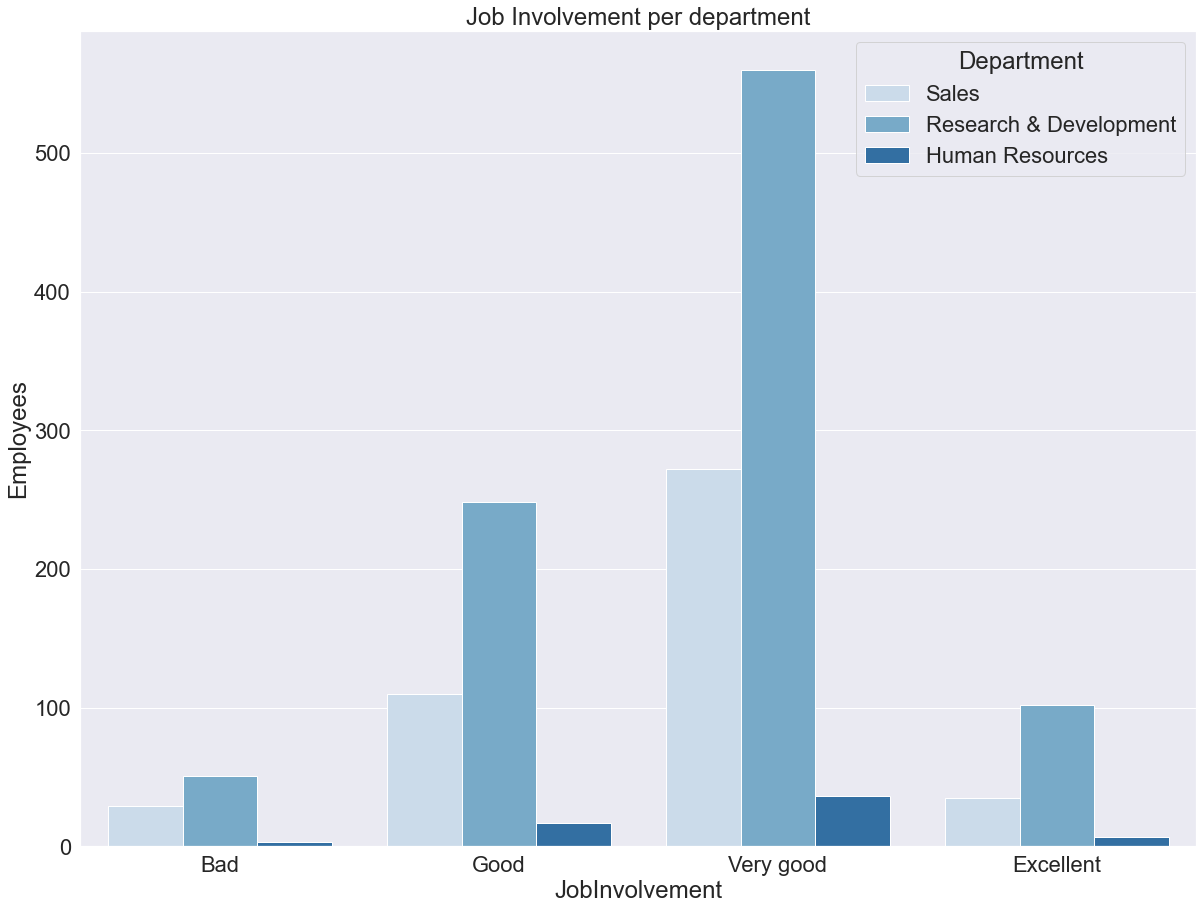

In [126]:
plt.figure(figsize=(20,15))
sns.set(font_scale=2)
ax =sns.countplot(x='JobInvolvement',
             palette = 'Blues',
             hue = 'Department',
             data=data)
ax.set_xticklabels(['Bad','Good','Very good','Excellent'])  
ax.set(ylabel='Employees', title = 'Job Involvement per department')

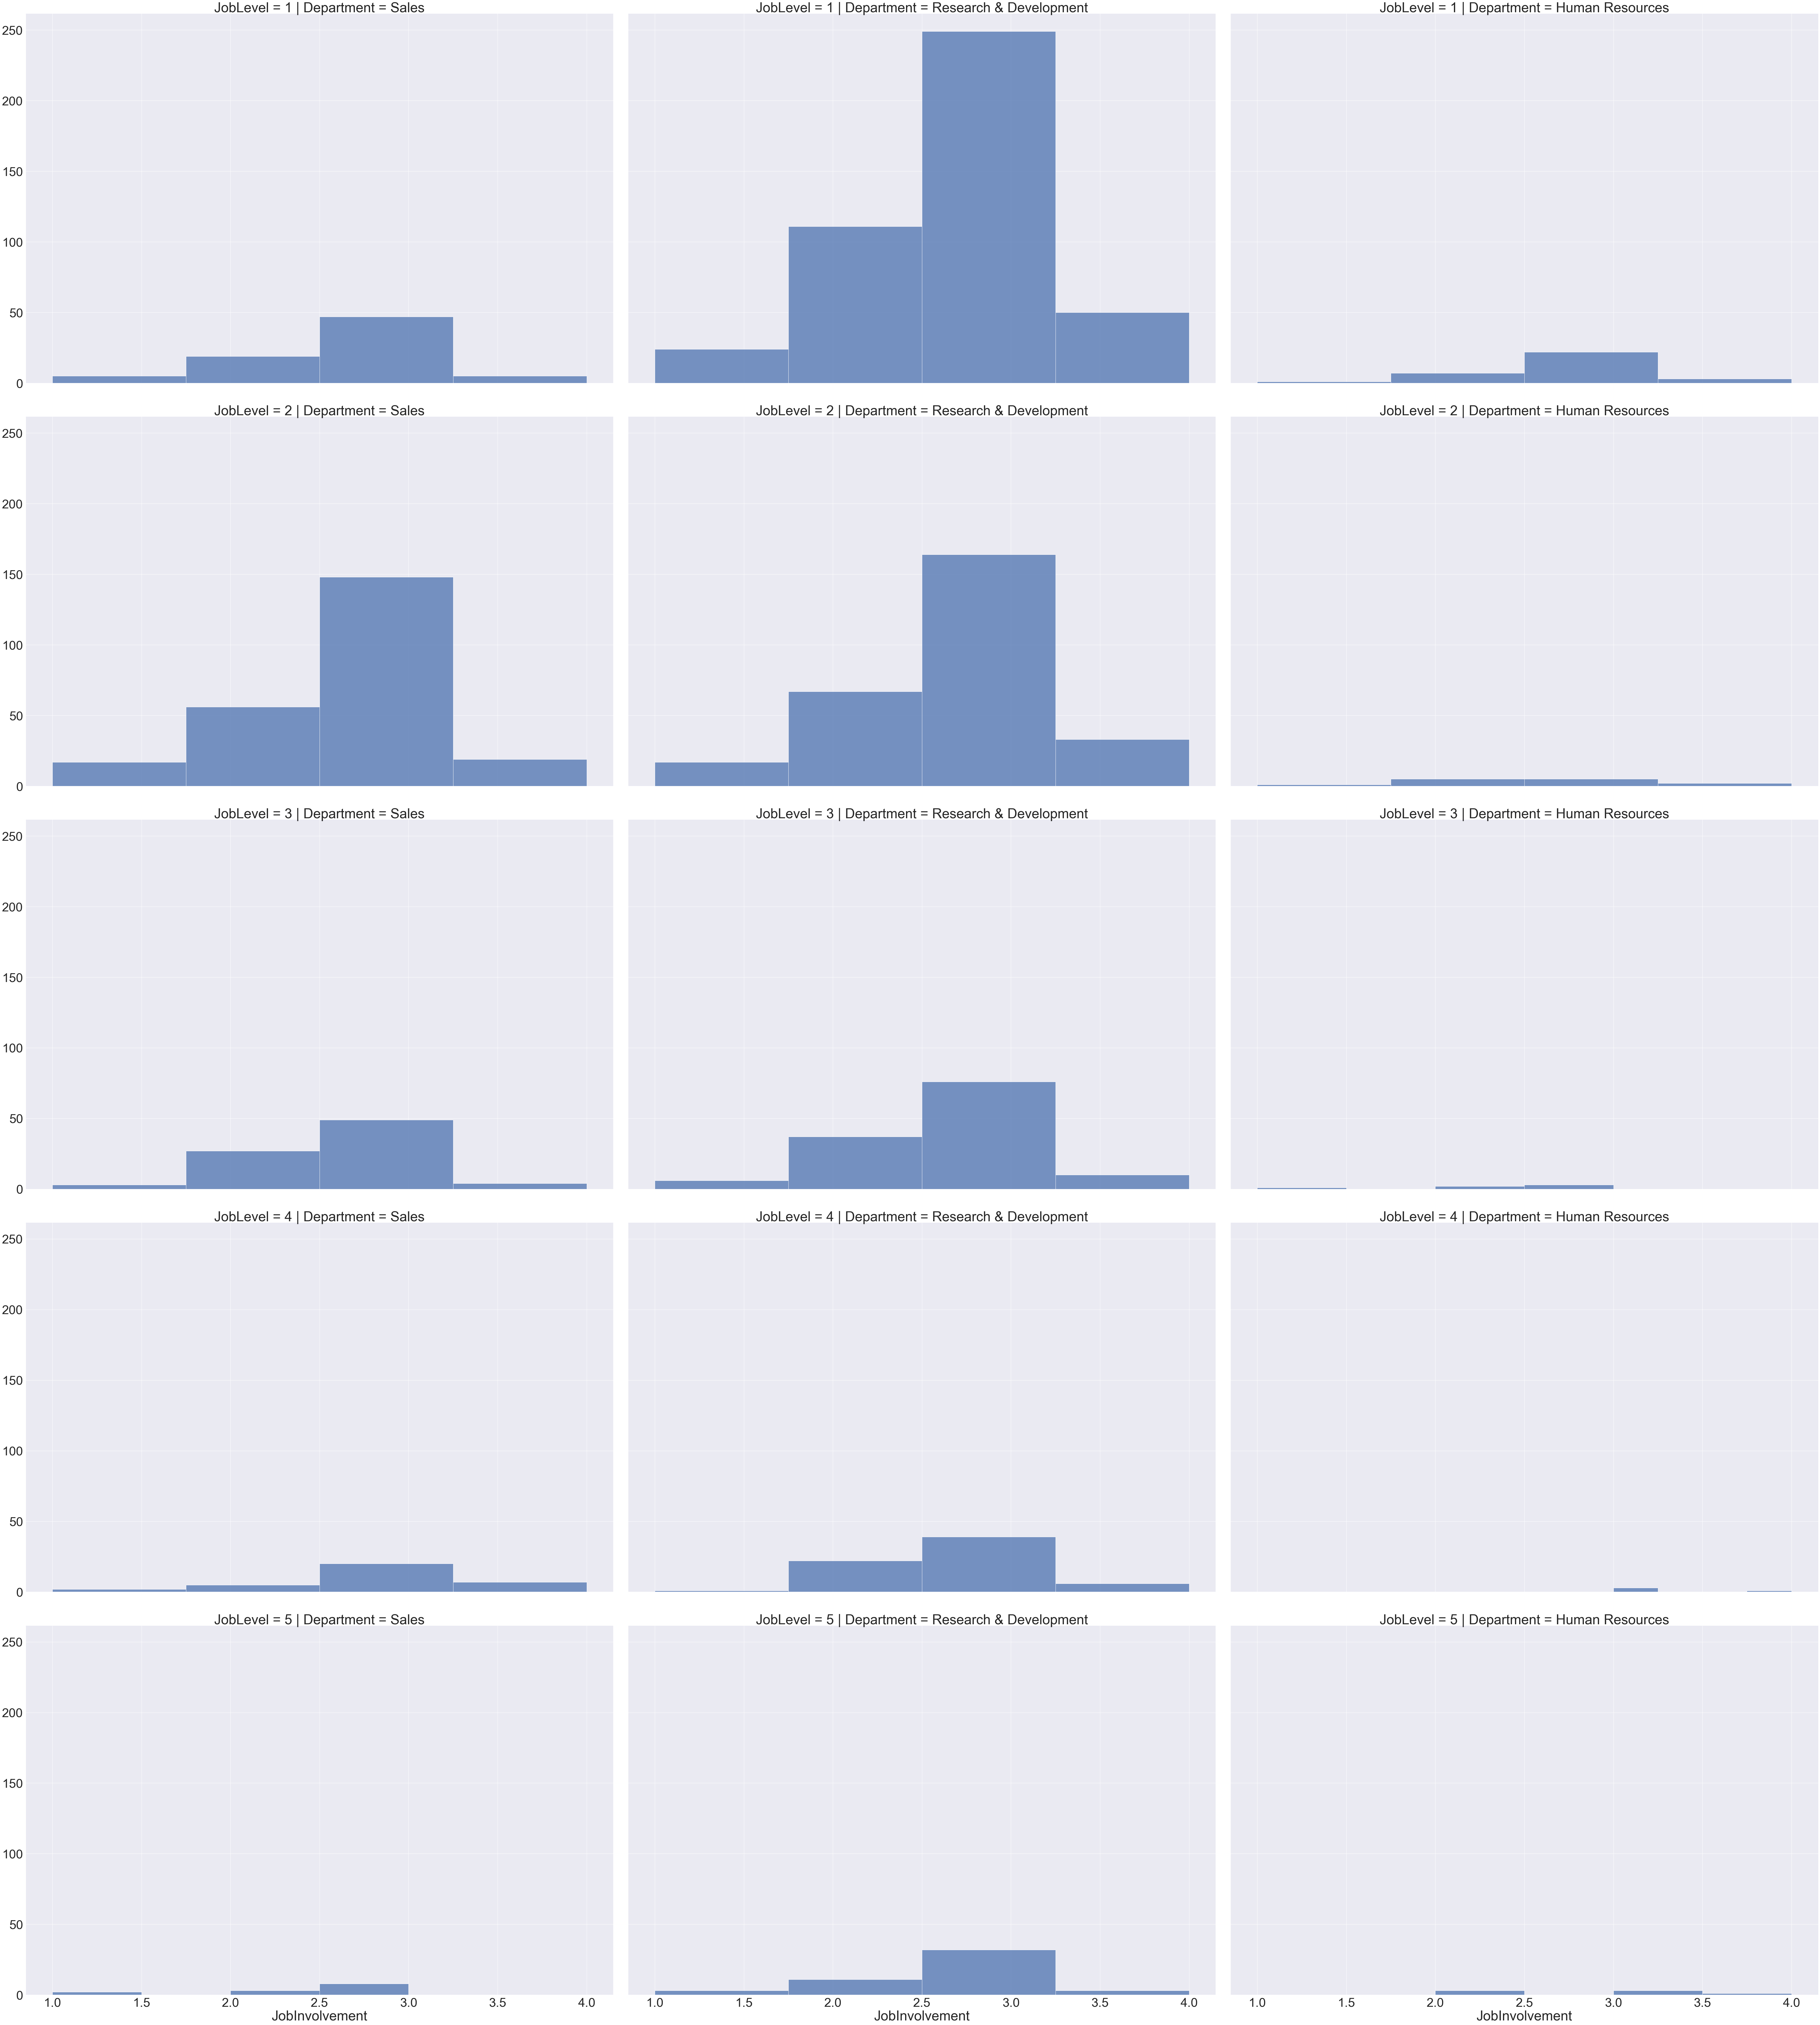

In [127]:
sns.set(font_scale=4)
g = sns.FacetGrid(data, col="Department",row = 'JobLevel',palette = 'Blues', height=20, aspect=1.5)
g.map(sns.histplot, "JobInvolvement", bins =4)

[Text(0, 0.5, 'Employees'),
 Text(0.5, 1.0, 'Attrition distribution based on Job Involvement')]

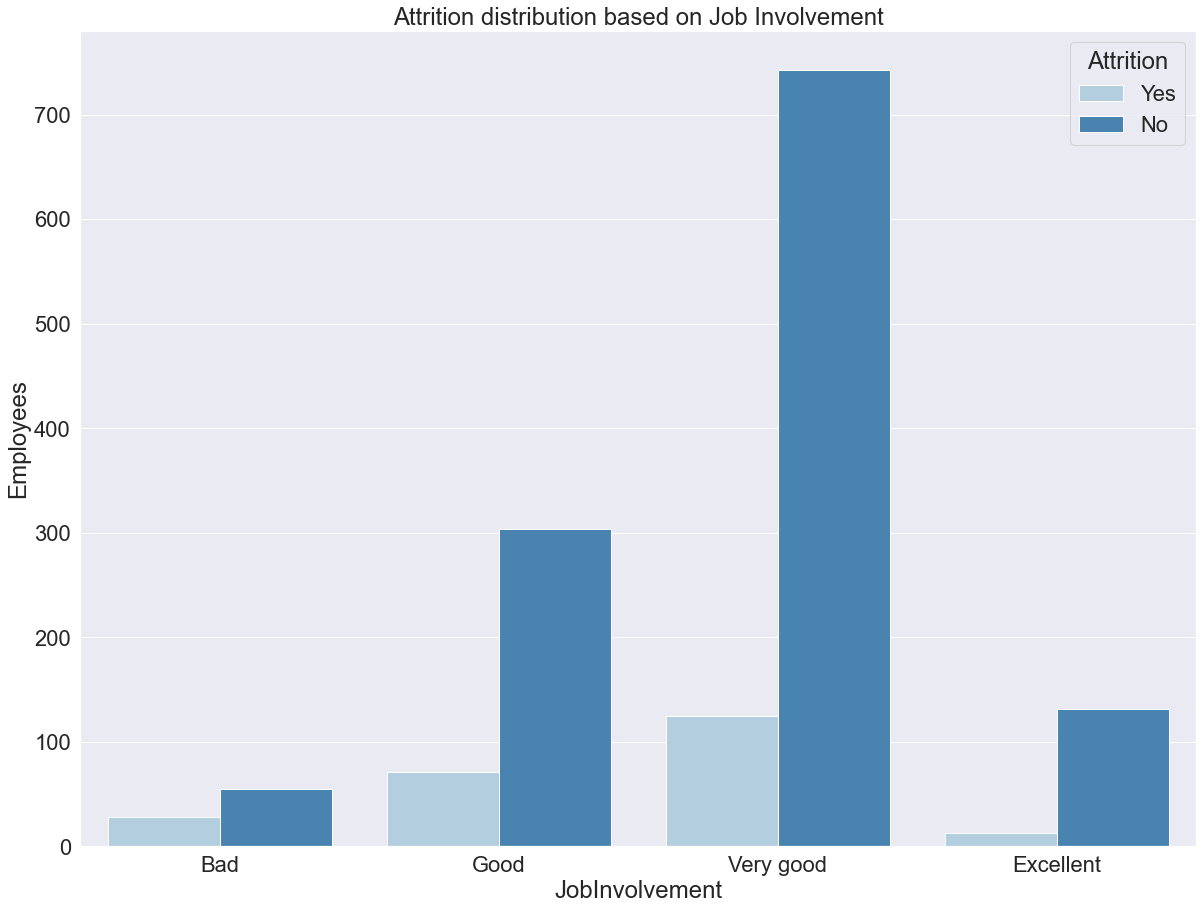

In [128]:
plt.figure(figsize=(20,15))
sns.set(font_scale=2)
ax =sns.countplot(x='JobInvolvement',
             palette = 'Blues',
             hue = 'Attrition',
             data=data)
ax.set_xticklabels(['Bad','Good','Very good','Excellent'])  
ax.set(ylabel='Employees', title = 'Attrition distribution based on Job Involvement')

[Text(0, 0.5, 'Employees'),
 Text(0.5, 1.0, 'Relationship Satisfaction per department')]

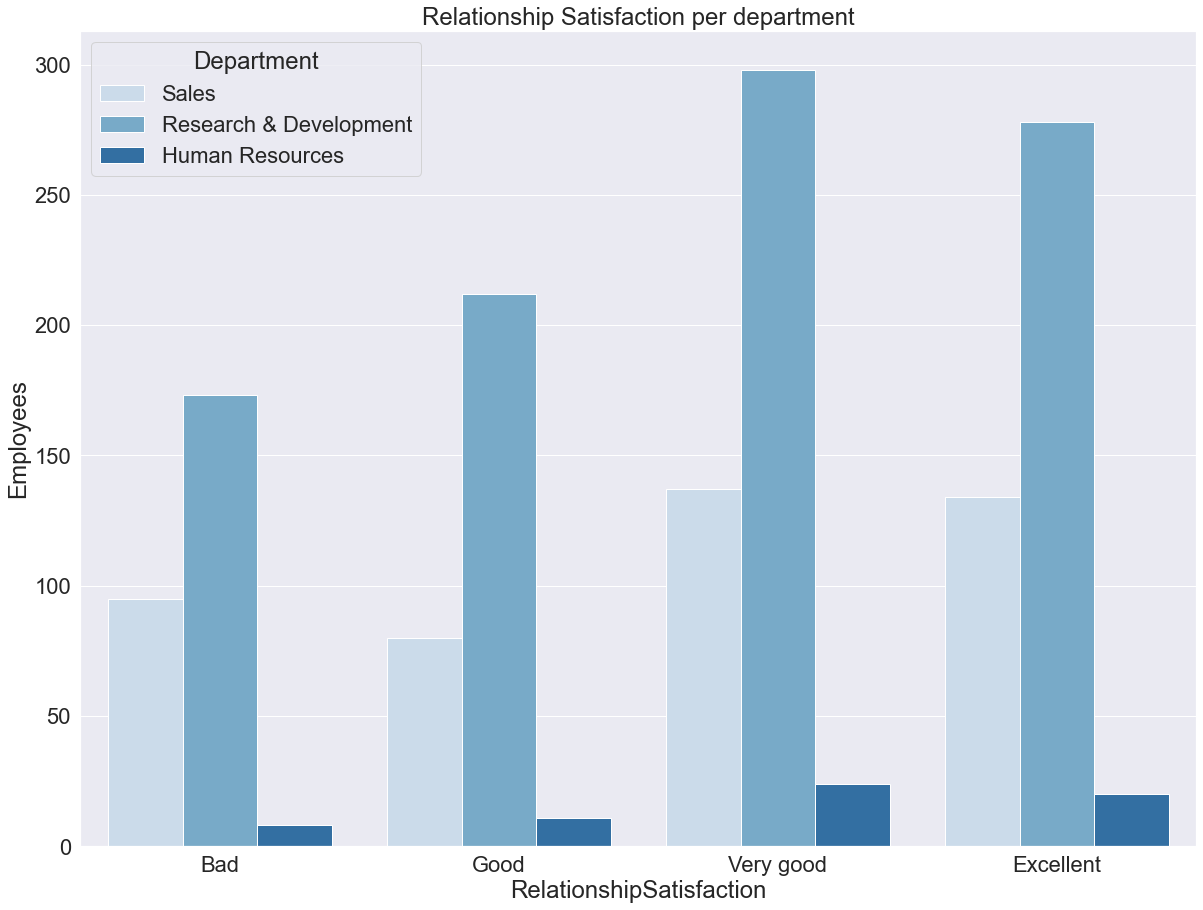

In [129]:
plt.figure(figsize=(20,15))
sns.set(font_scale=2)
ax =sns.countplot(x='RelationshipSatisfaction',
             palette = 'Blues',
             hue = 'Department',
             data=data)
ax.set_xticklabels(['Bad','Good','Very good','Excellent'])  
ax.set(ylabel='Employees', title = 'Relationship Satisfaction per department')

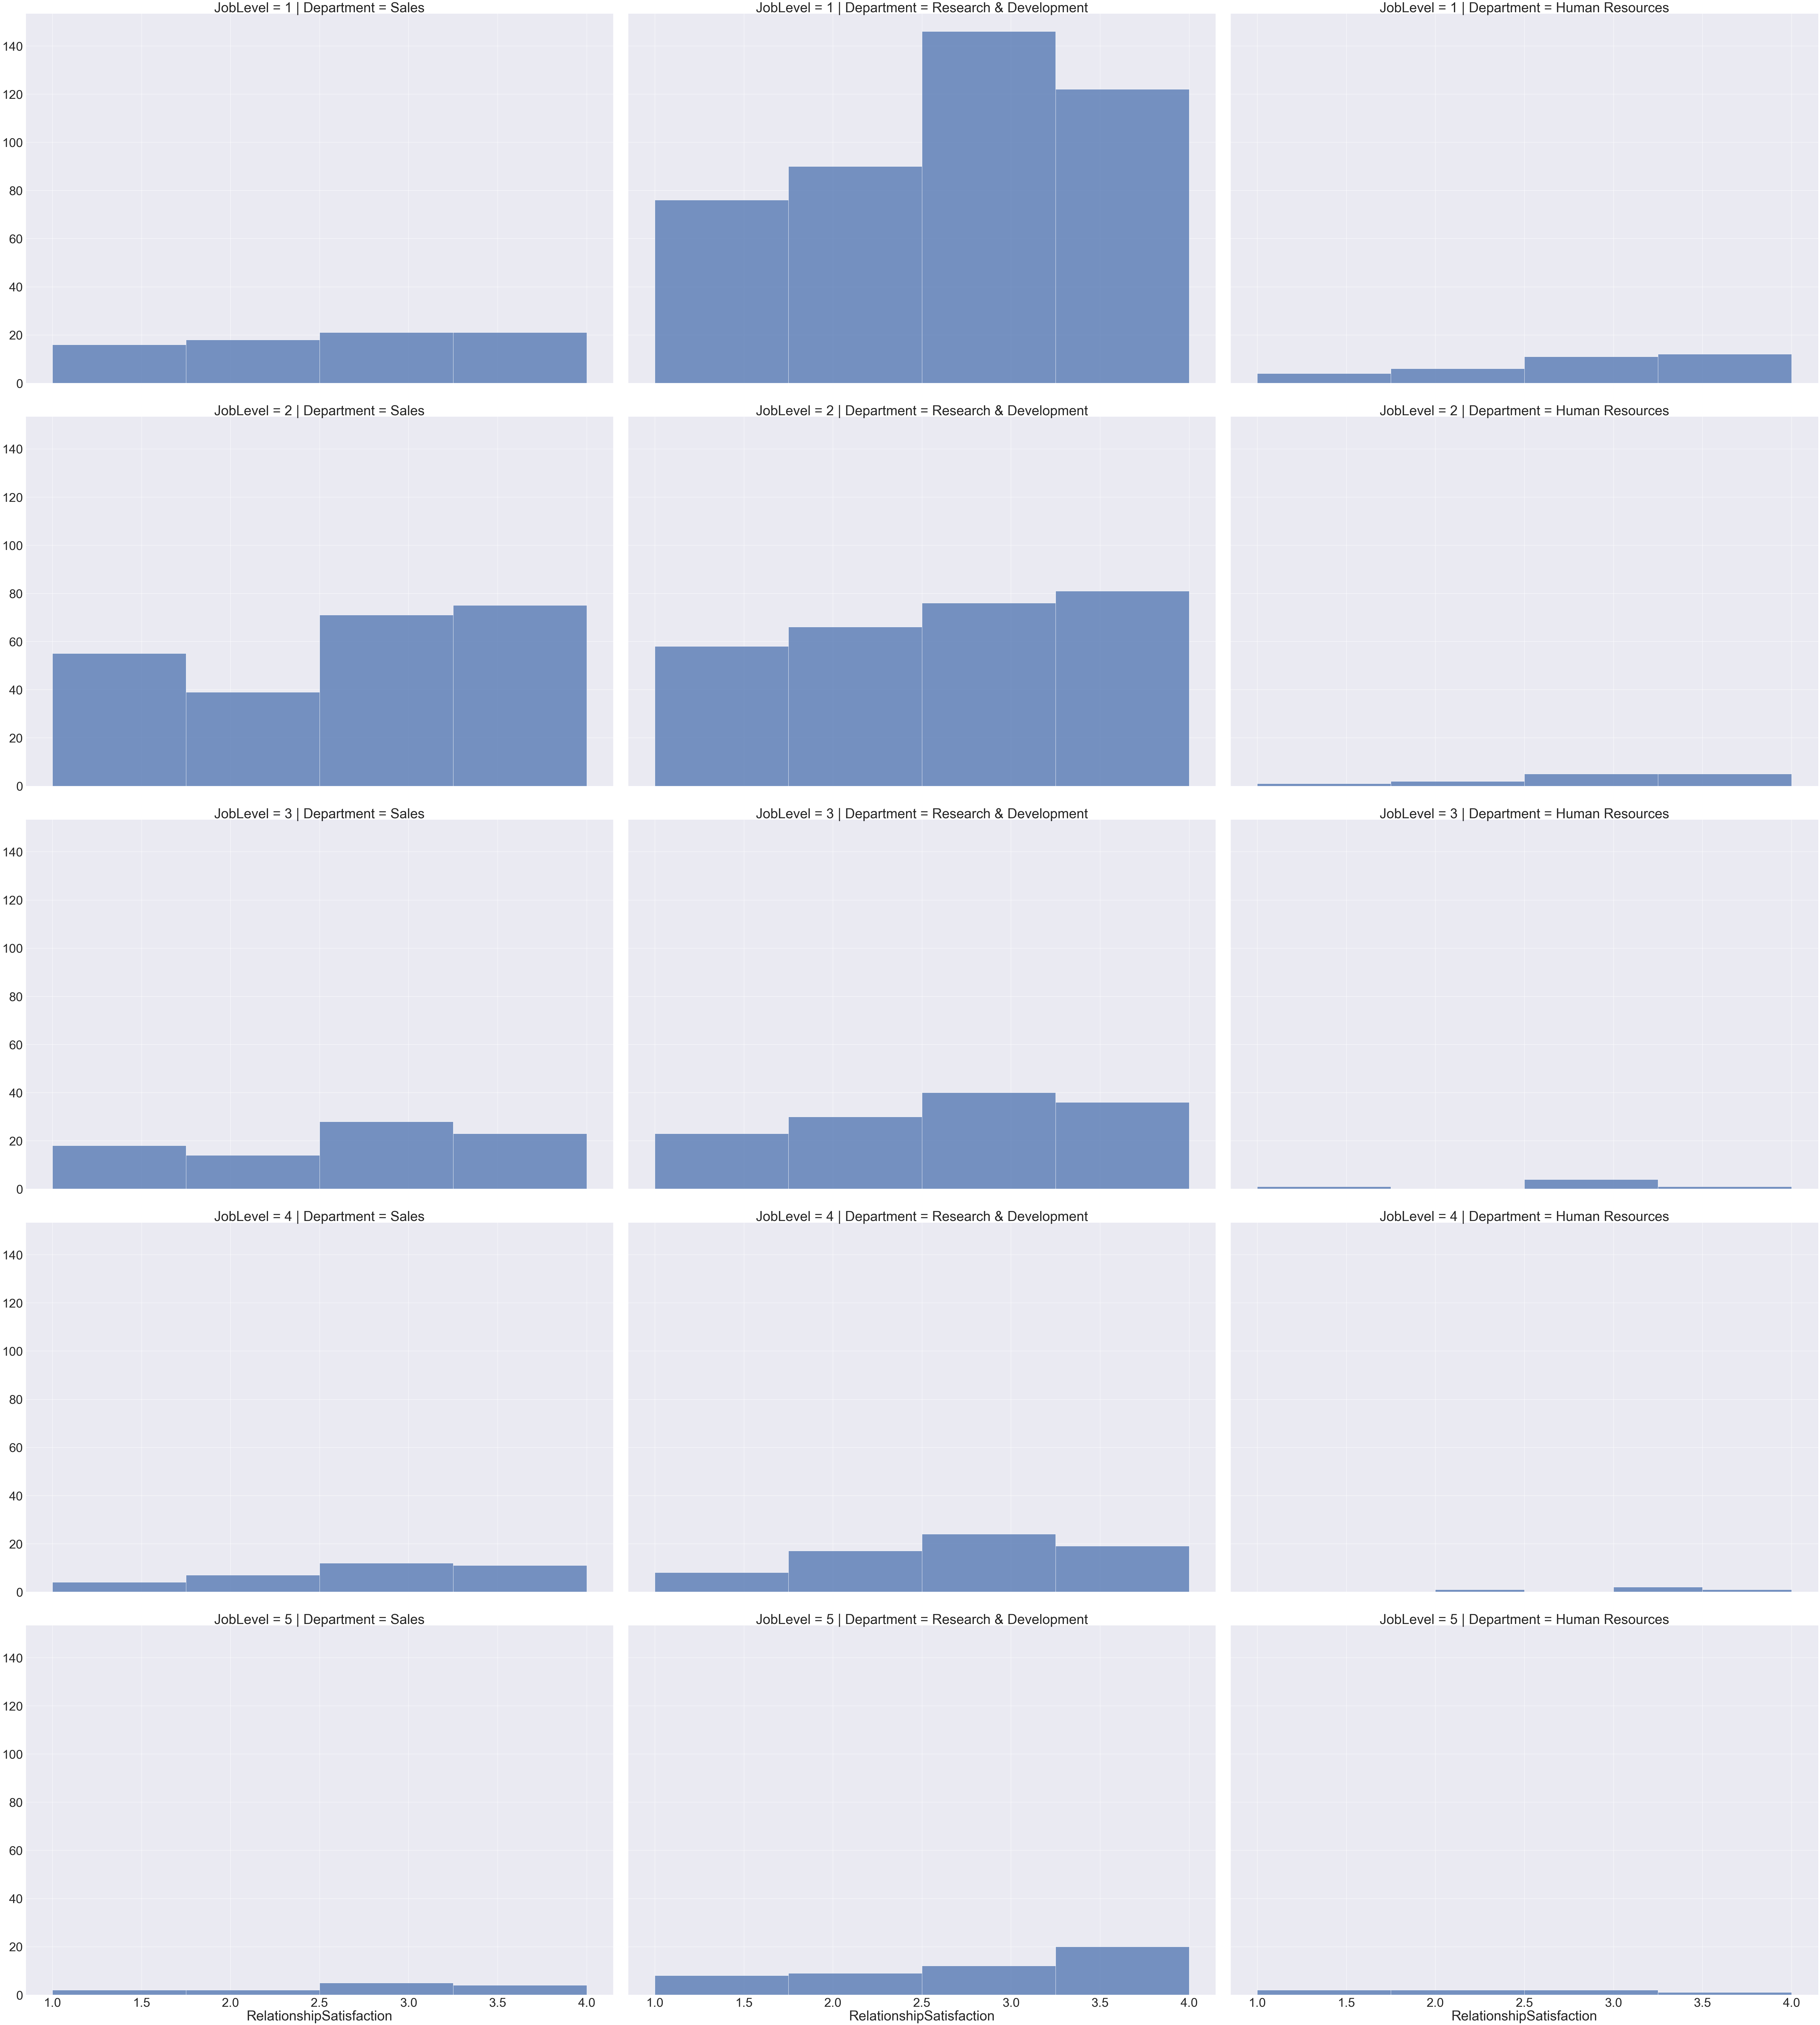

In [130]:
sns.set(font_scale=4)
g = sns.FacetGrid(data, col="Department",row = 'JobLevel',palette = 'Blues', height=20, aspect=1.5)
g.map(sns.histplot, "RelationshipSatisfaction",bins =4)

[Text(0, 0.5, 'Employees'),
 Text(0.5, 1.0, 'Attrition distribution based on Relationship satisfaction')]

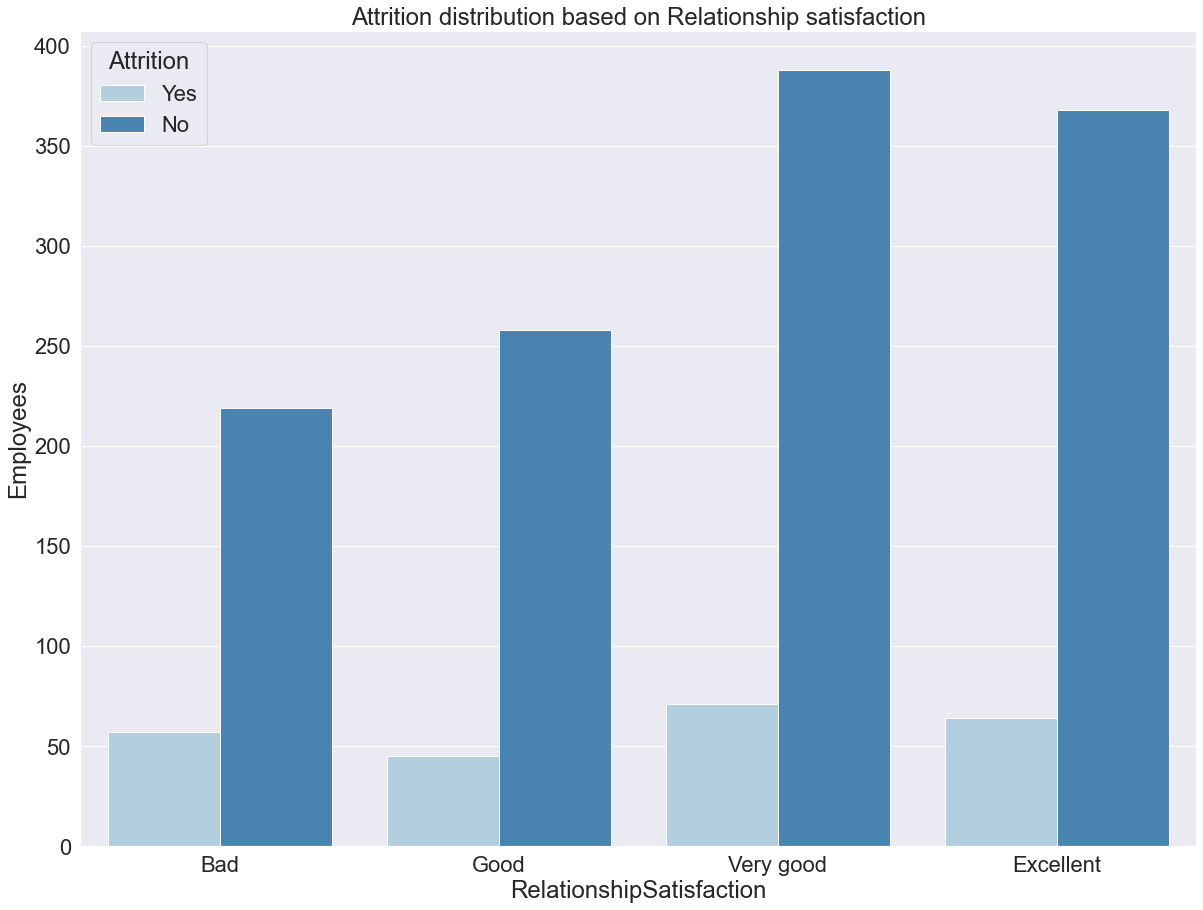

In [131]:
plt.figure(figsize=(20,15))
sns.set(font_scale=2)
ax =sns.countplot(x='RelationshipSatisfaction',
             palette = 'Blues',
             hue = 'Attrition',
             data=data)
ax.set_xticklabels(['Bad','Good','Very good','Excellent'])  
ax.set(ylabel='Employees', title = 'Attrition distribution based on Relationship satisfaction')

Clearly there is a connection between job satisfaction and attrition. However, there are also people who are leaving even if the are totally satisfied with their job: for example, we can see that Sale executives are not satisfied with their job.

As for environment satisfaction, there is clearly an issue with Research directors, which find environment bad, we can see that some workers on positions Laboratory technician and Research Scientists also find an environment not so good as well.

Job involvement is clearly affecting the attrition. Half of people who are not involved in their job leave the company. As we can see the low involvement level can be noticed at low level positions in R&D and Sales.

Analysis showed that relationship satisfaction also has a connection with attrition. People leave more often if they have a bad relationship with their colleagues. The distribution between departments showed that there are bad and good relationship between employees, however at a lower level there are more unhappy people.




   Thus, we can say:
Income is an important, but not only a factor which affects attrition. In general, people at lower positions are less happy than employees at high level positions.

At low level positions, we can see that the job involvement, job satisfaction and relationship satisfaction are lower. 
Probably the buddy program can help employees to integrate fast, have better relationship with colleagues, be closer to their bosses or team-buildings (which can help to improve the atmosphere in the department)
Plus company should put attention on overworking and work distribution in the department. 

The last part of out analysis will be concentrated on personal development and growth of employees. Especially we will put attention on movement from low level positions of high ones.

## Analysis of personal development in the company

Personal development is quite important as well. Employees should feel that they are growing with the company, becoming experts and realizing themselves.

Hypotheses:
1. If person is staying on the same position for quite a long time, the higher the chance that he will leave the company
2. Often trainings make people leave company less often
3. Longer person works in the company, less chance that he will leave
4. Performance affects attrition: lower the performance, higher the attrition
5. The higher the salary hike, more chances that the employee will stay with the company


[Text(0, 0.5, 'Employees'),
 Text(0.5, 1.0, 'Years since last promotion distribution')]

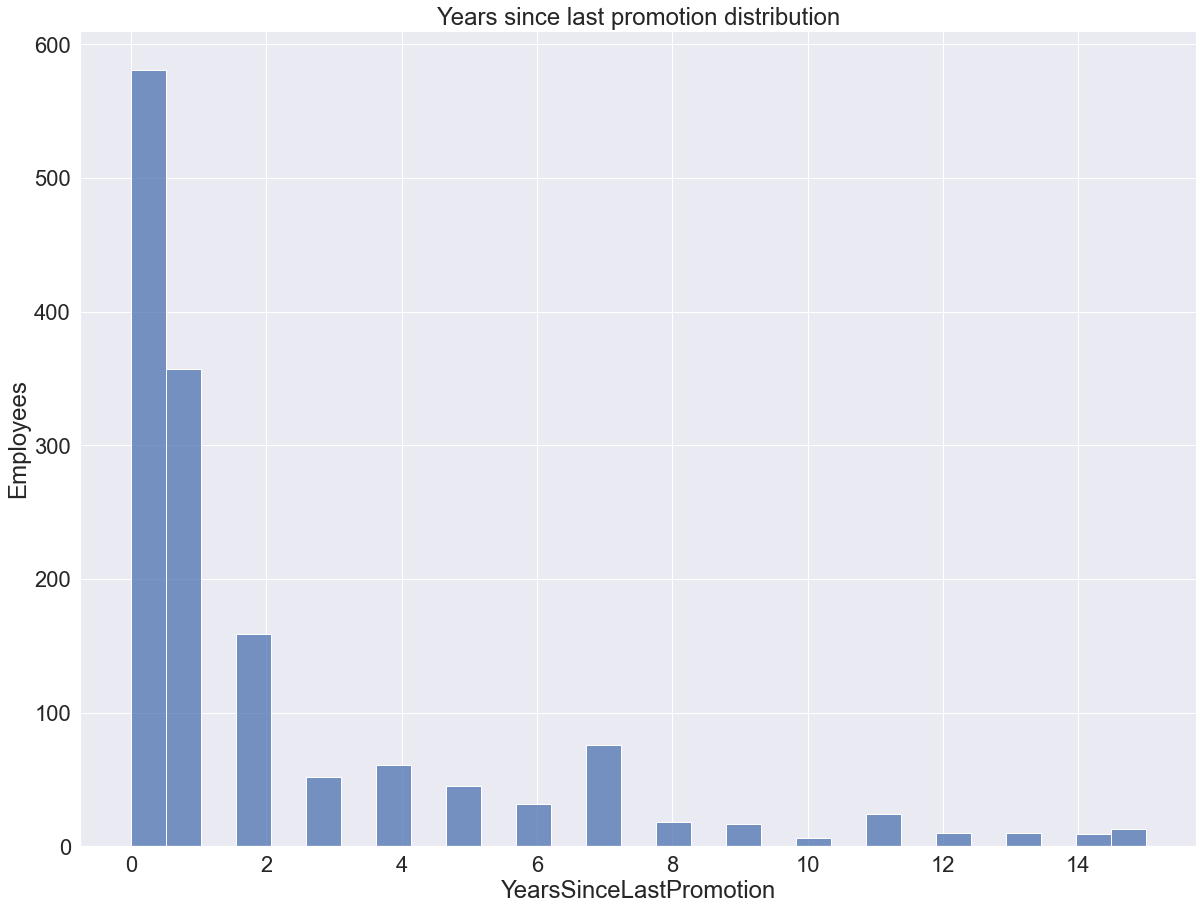

In [134]:
#Years since the last promostion
plt.figure(figsize=(20,15))
sns.set(font_scale=2)
g = sns.histplot(data = data, x = 'YearsSinceLastPromotion')
g.set(ylabel='Employees', title = 'Years since last promotion distribution')

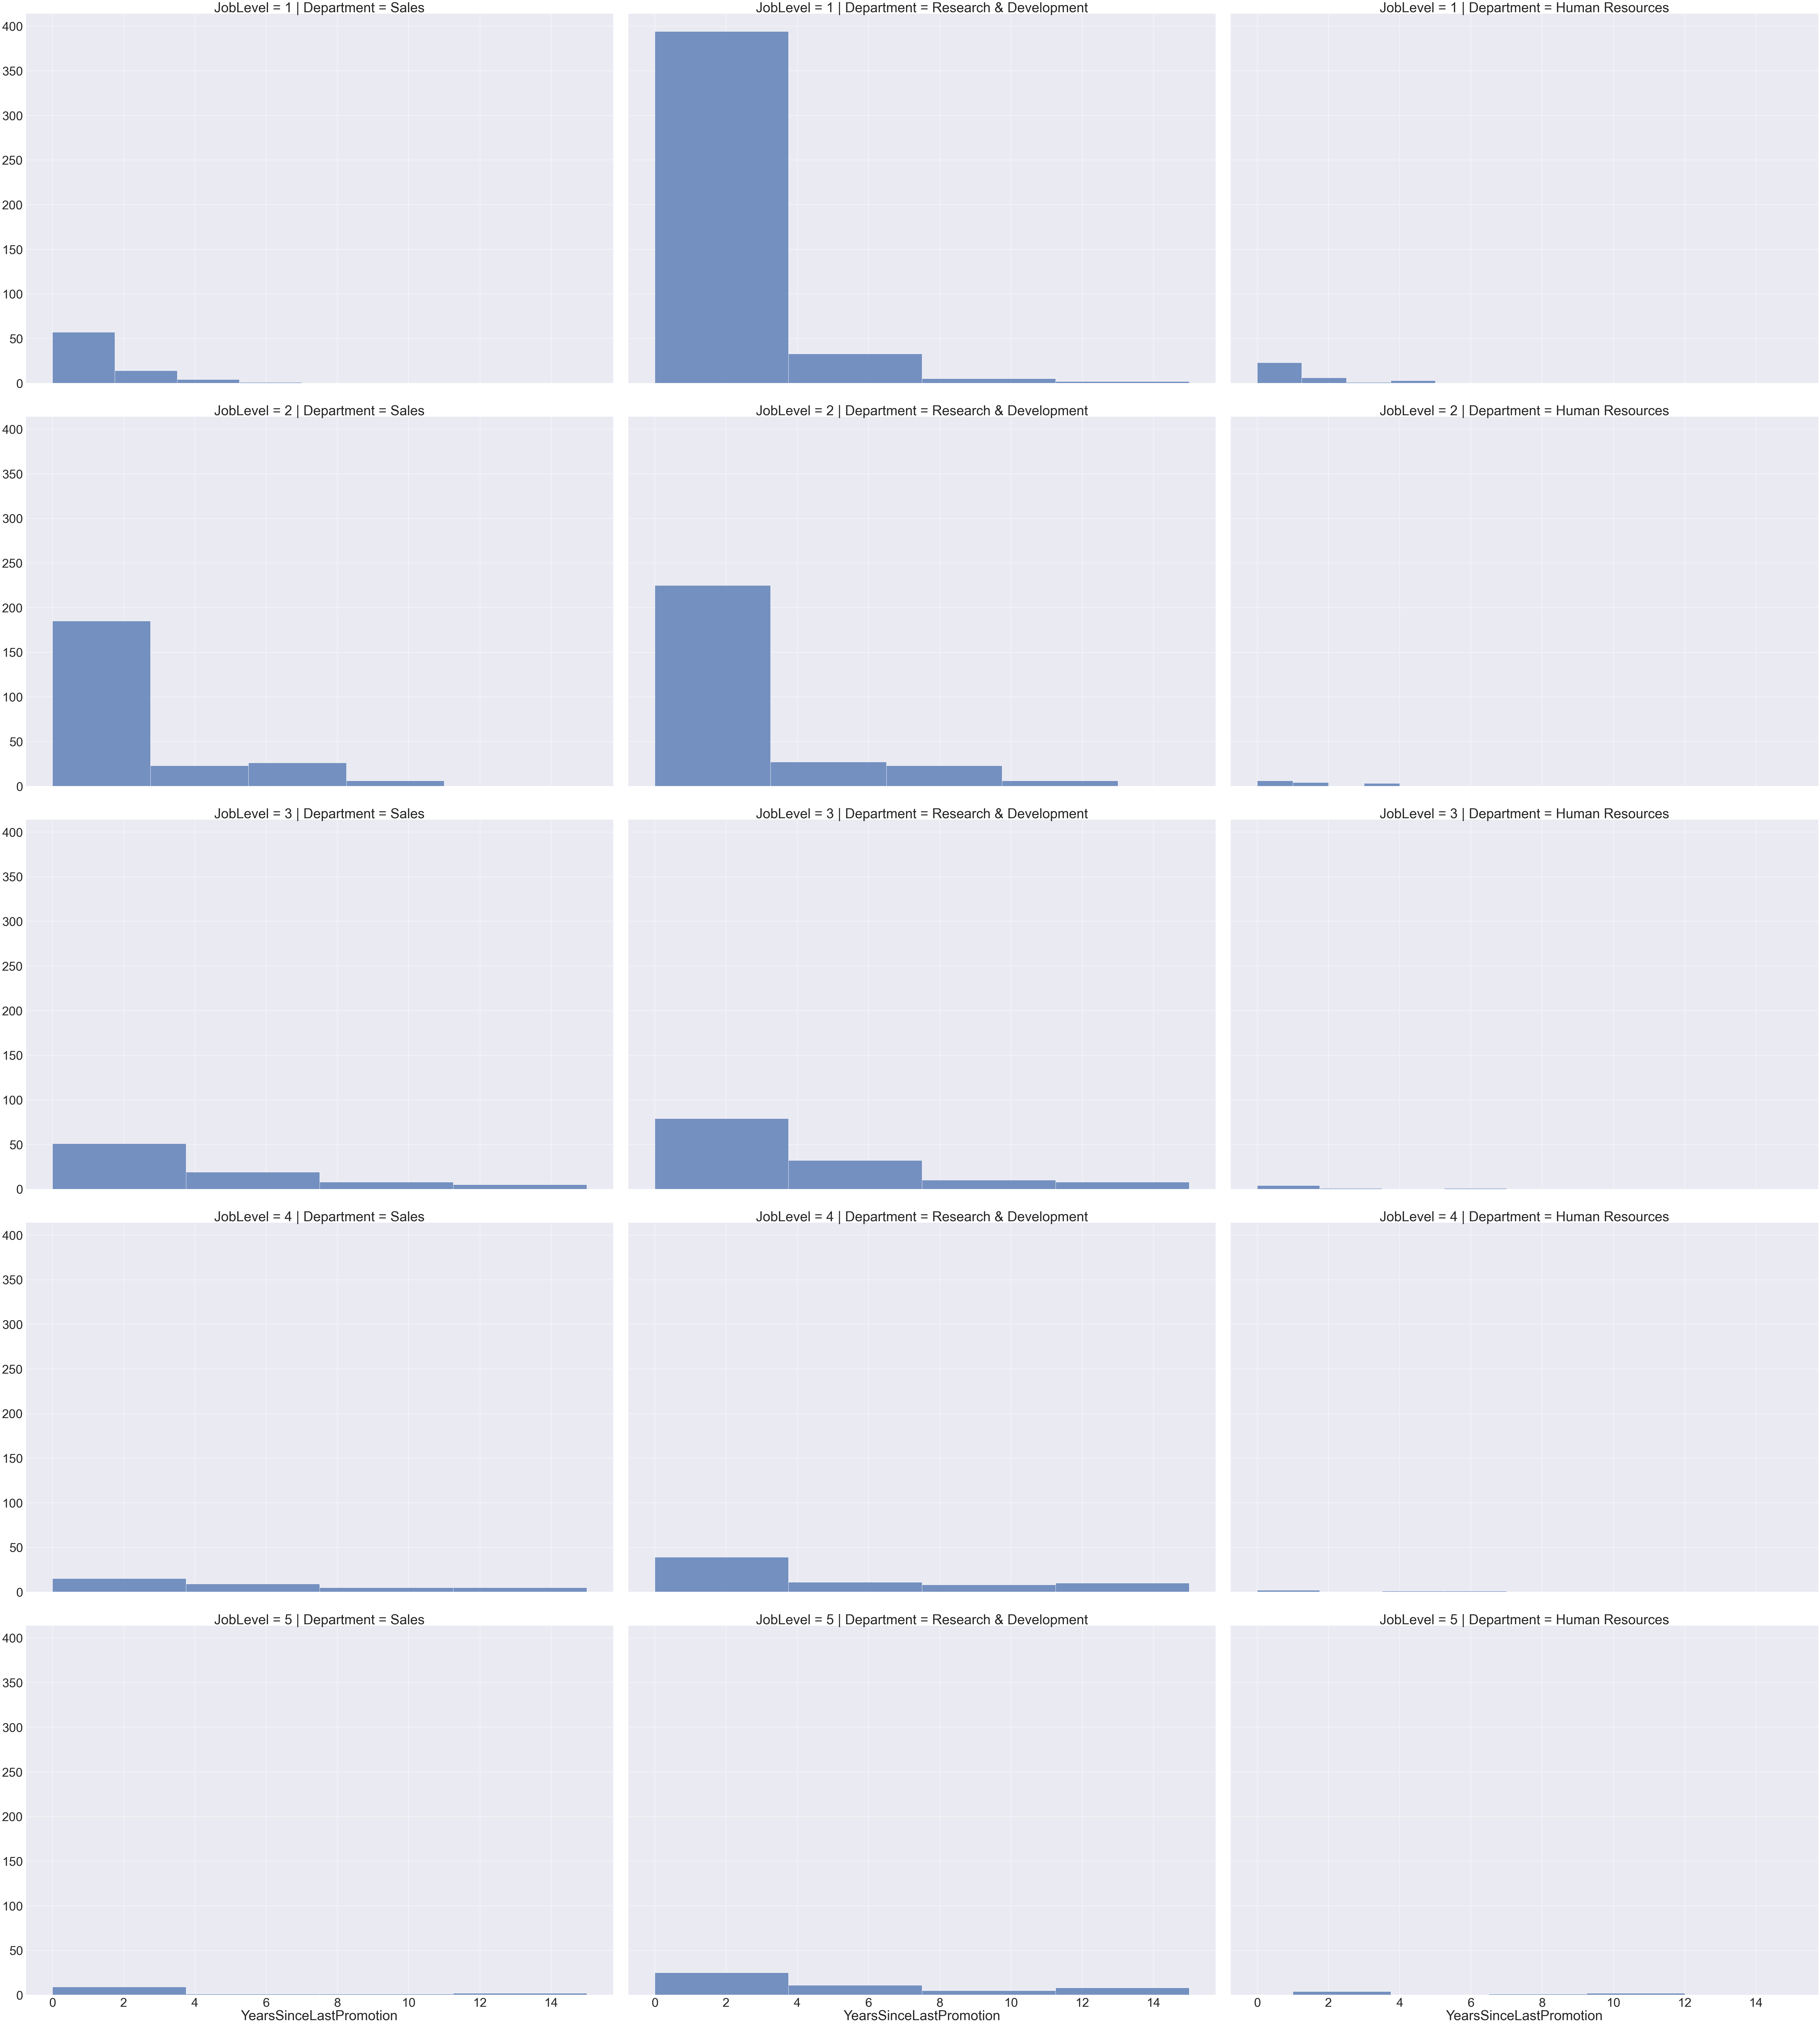

In [135]:
sns.set(font_scale=4)
g = sns.FacetGrid(data, col="Department",row = 'JobLevel',palette = 'Blues', height=20, aspect=1.5)
g.map(sns.histplot, "YearsSinceLastPromotion",bins =4)

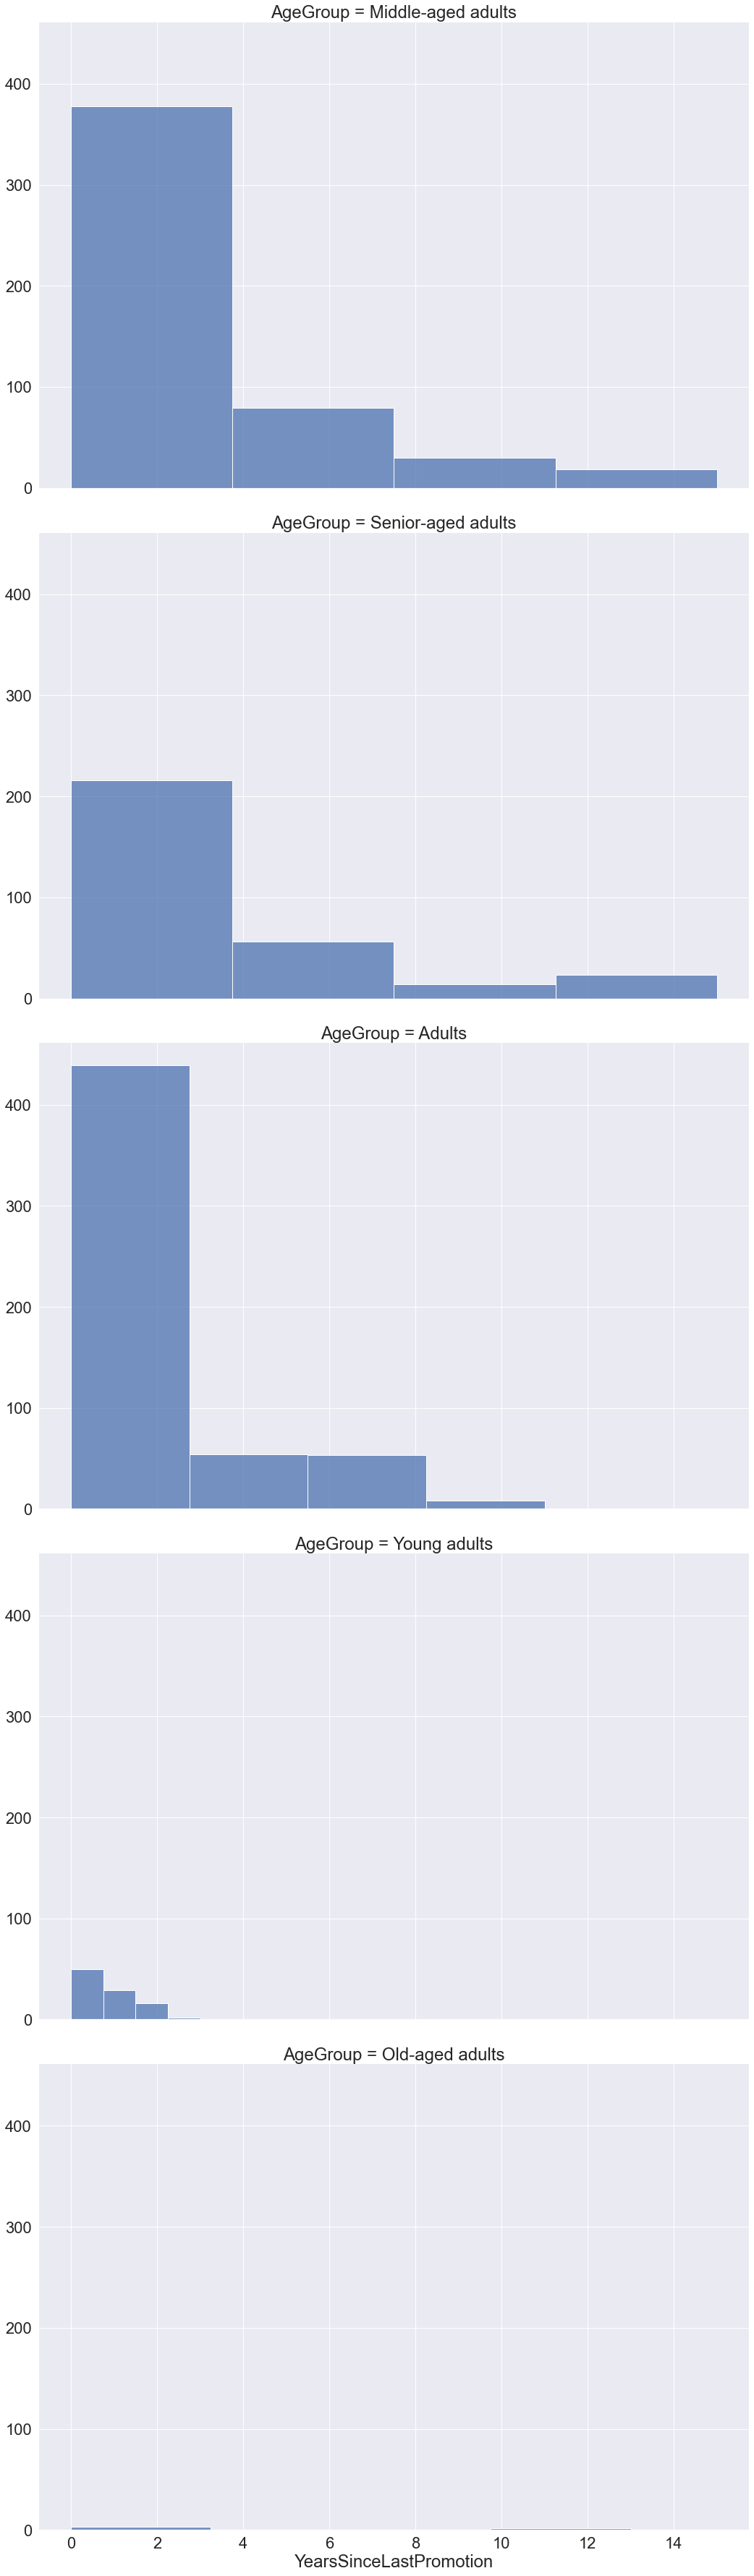

In [138]:
sns.set(font_scale=2)
g = sns.FacetGrid(data, row = 'AgeGroup',palette = 'Blues', height=10, aspect=1.5)
g.map(sns.histplot, "YearsSinceLastPromotion",bins =4)

People are being promoted quite often, especially in R&D. The majority was promoted 1-2 years ago. Mostly in first years people are being promoted at lower level positions.
It is fair for all age groups.

[Text(0, 0.5, 'Employees'),
 Text(0.5, 1.0, 'Training times last year and attrition')]

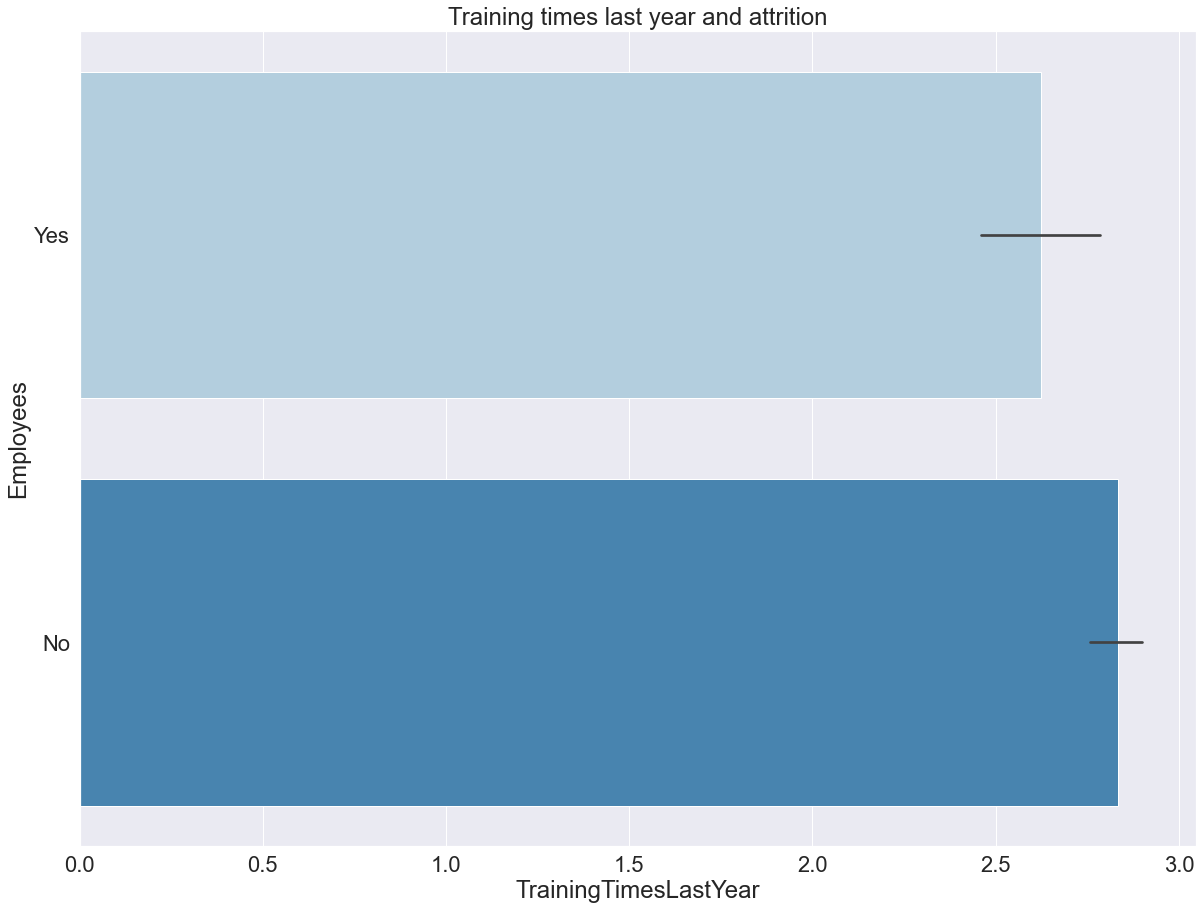

In [139]:
plt.figure(figsize=(20,15))
sns.set(font_scale=2)
ax =sns.barplot(x='TrainingTimesLastYear', y = 'Attrition',
             palette = 'Blues',
             data=data)
ax.set(ylabel='Employees', title = 'Training times last year and attrition') 

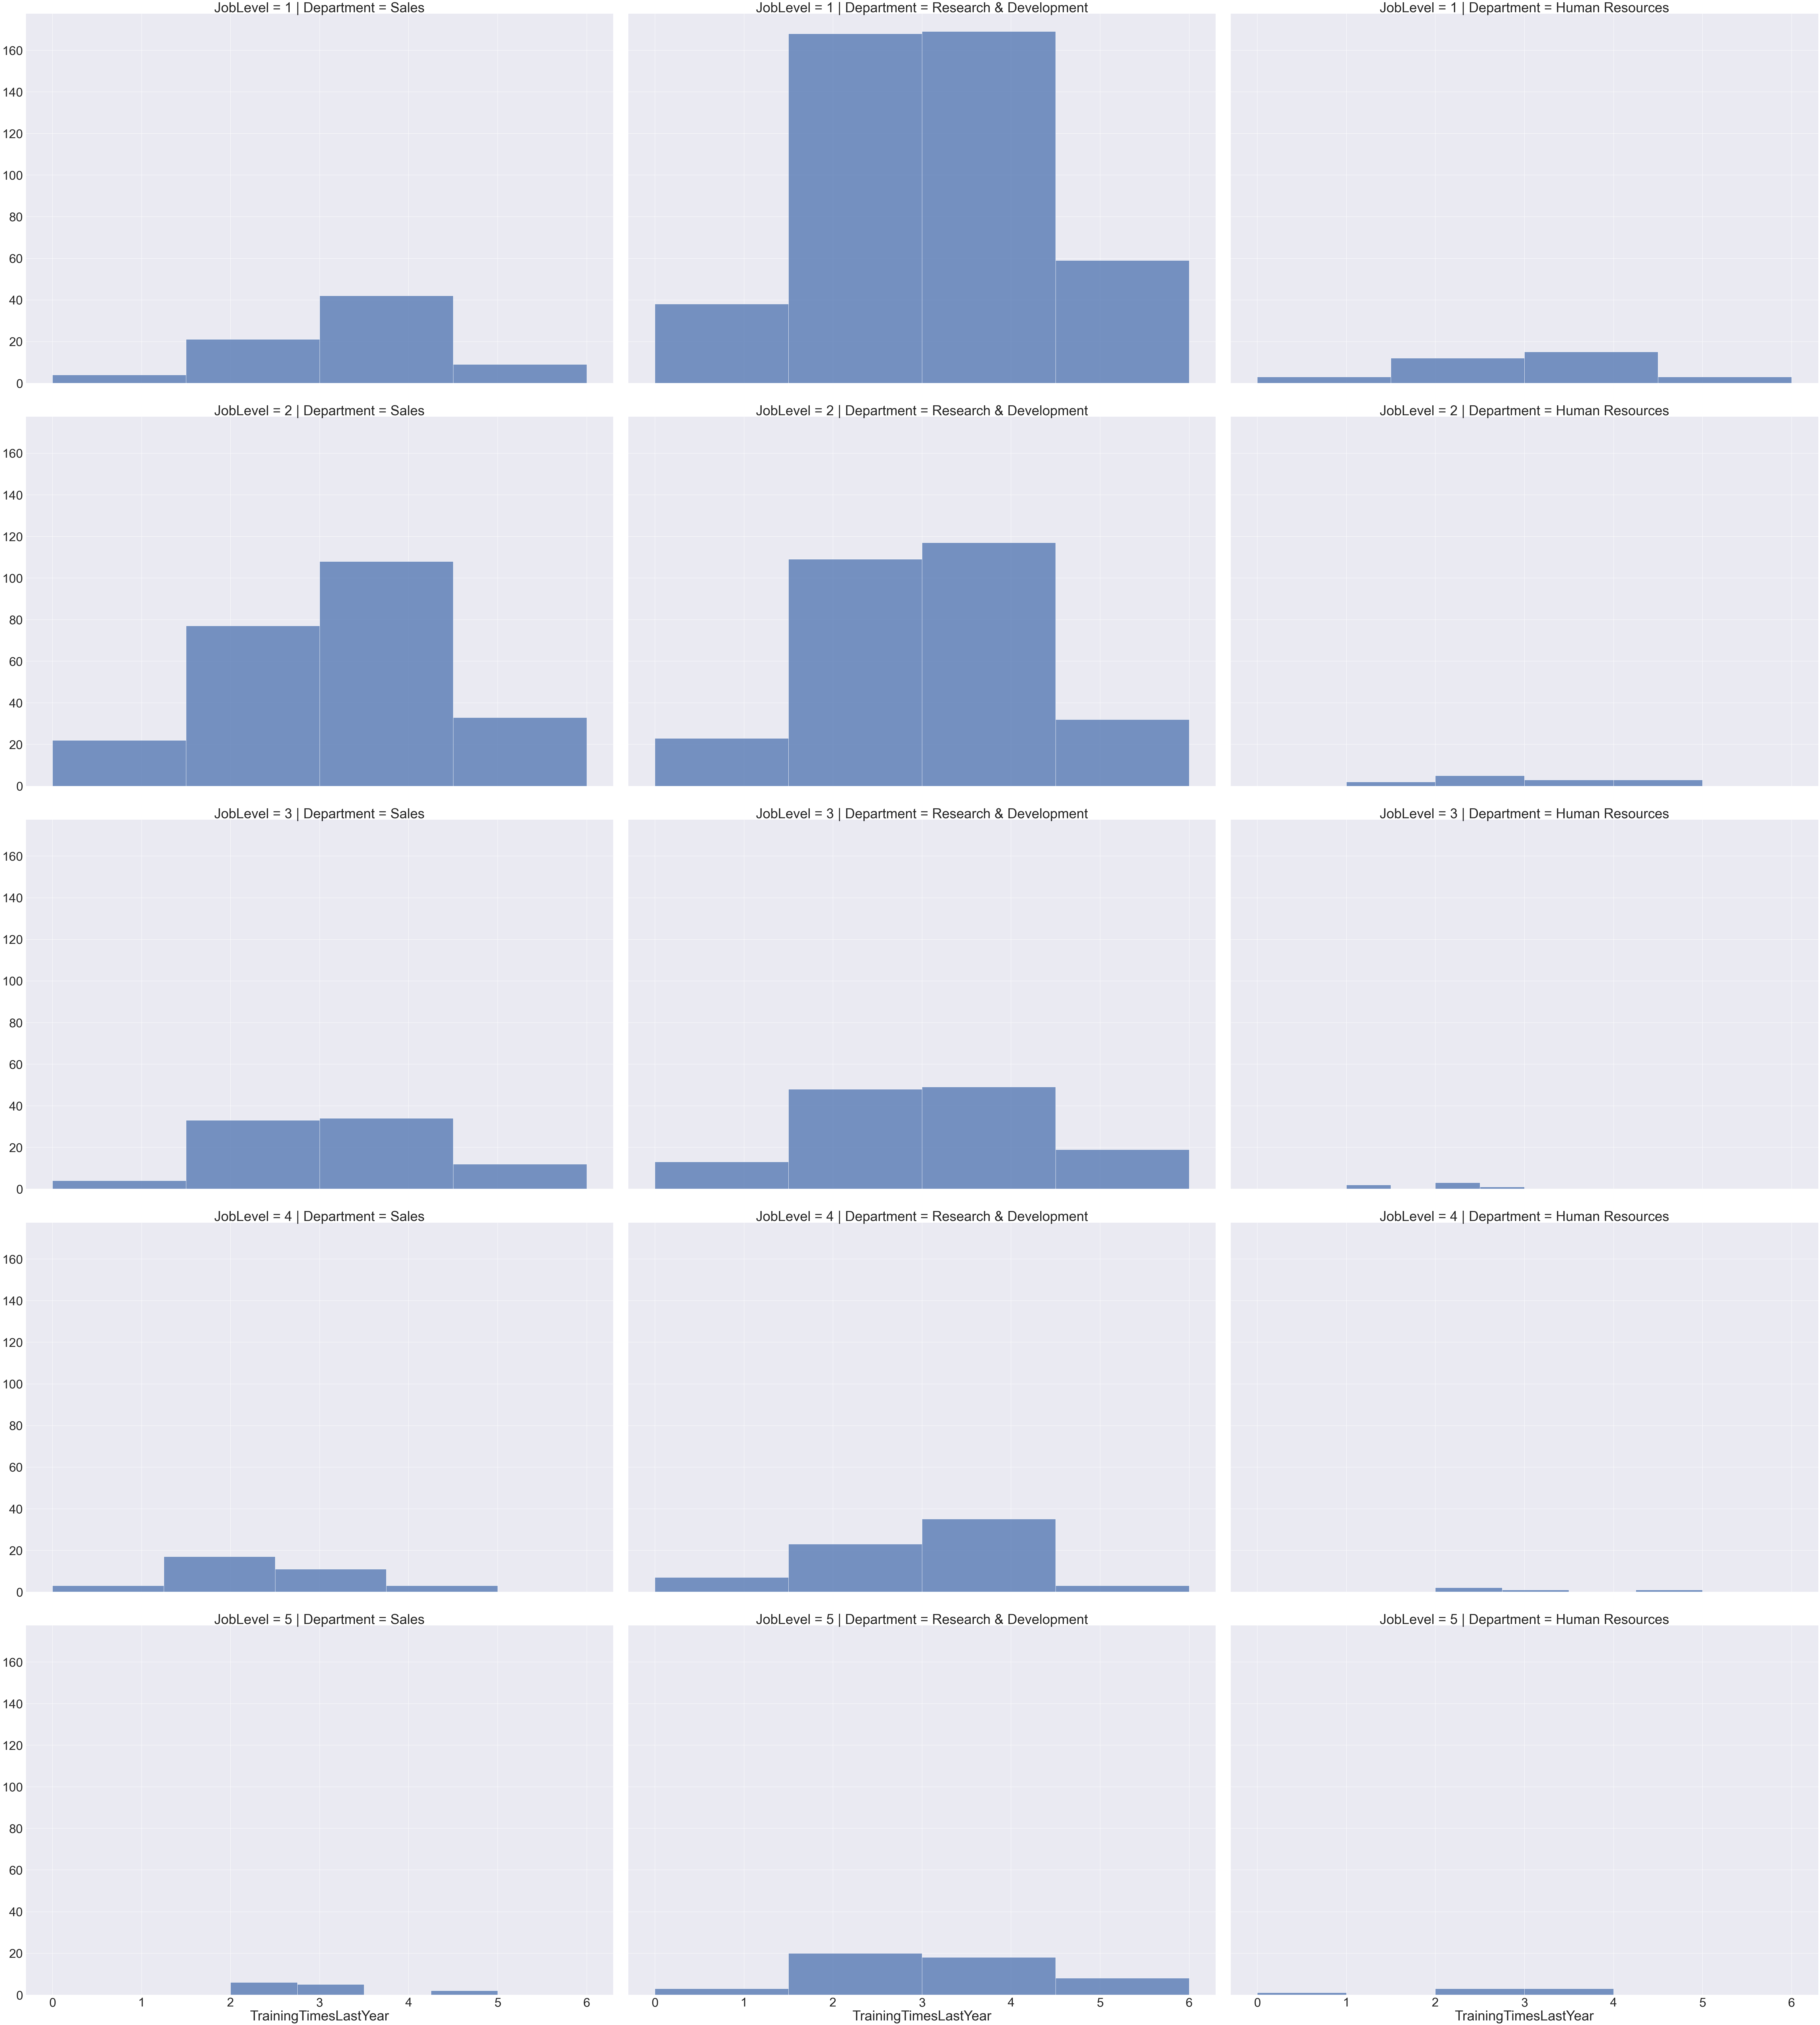

In [140]:
sns.set(font_scale=4)
g = sns.FacetGrid(data, col="Department",row = 'JobLevel',palette = 'Blues', height=20, aspect=1.5)
g.map(sns.histplot, "TrainingTimesLastYear",bins =4)

Overall trainings are being organized in 2-3 years. We can say that trainings are available for all job levels. However, it seems that on lower level people need probably more expertise to acquire, that is why trainings could be more often.
We can see as well a positive correlation between years from the last training and attrition

[Text(0, 0.5, 'Employees'),
 Text(0.5, 1.0, 'Years in the company (loyalty) and attrition')]

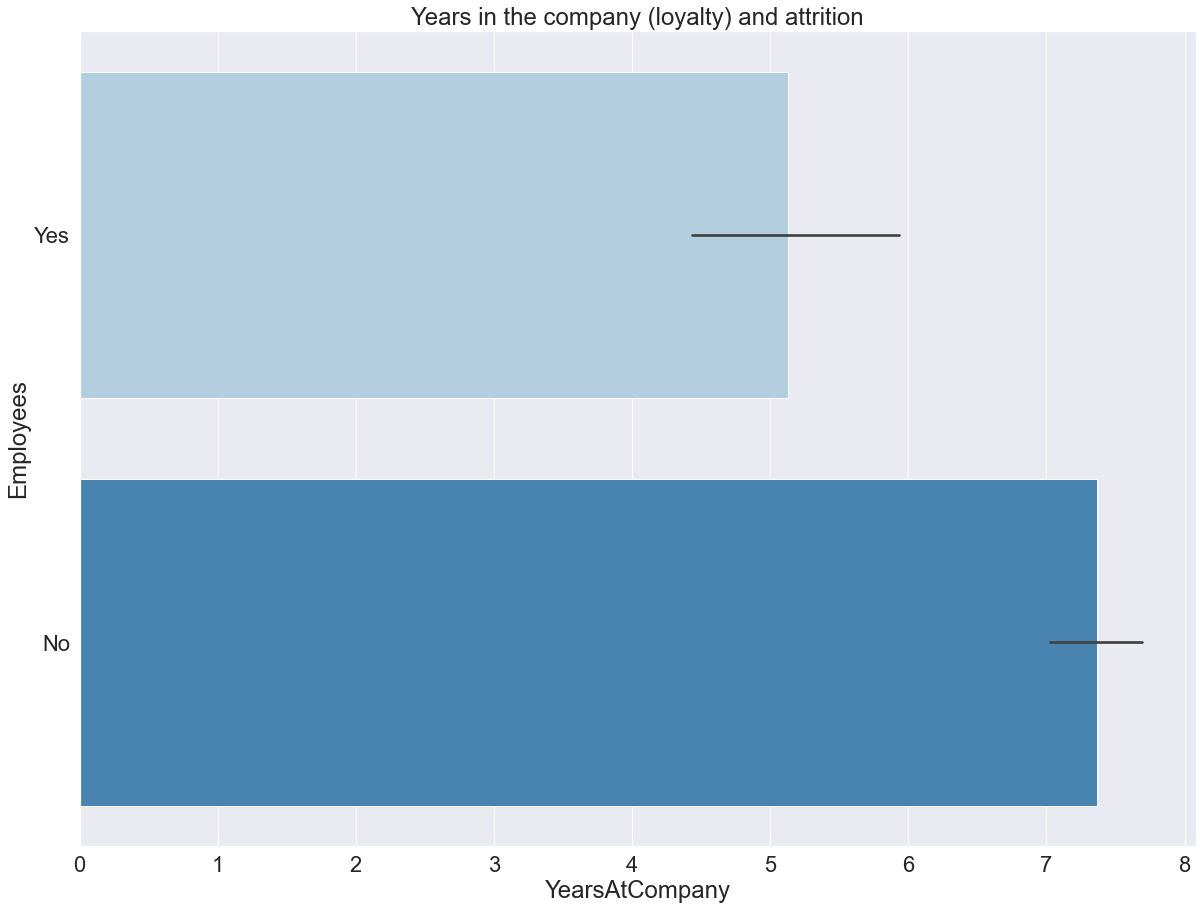

In [146]:
plt.figure(figsize=(20,15))
sns.set(font_scale=2)
ax =sns.barplot(x='YearsAtCompany', y = 'Attrition',
             palette = 'Blues',
             data=data)
ax.set(ylabel='Employees', title = 'Years in the company (loyalty) and attrition')

Loyalty is important as a factor which affects attrition. We can see that longer an employee works in the company, less change that he will leave.

[Text(0, 0.5, 'Employees'),
 Text(0.5, 1.0, 'Attrition based on performance rating')]

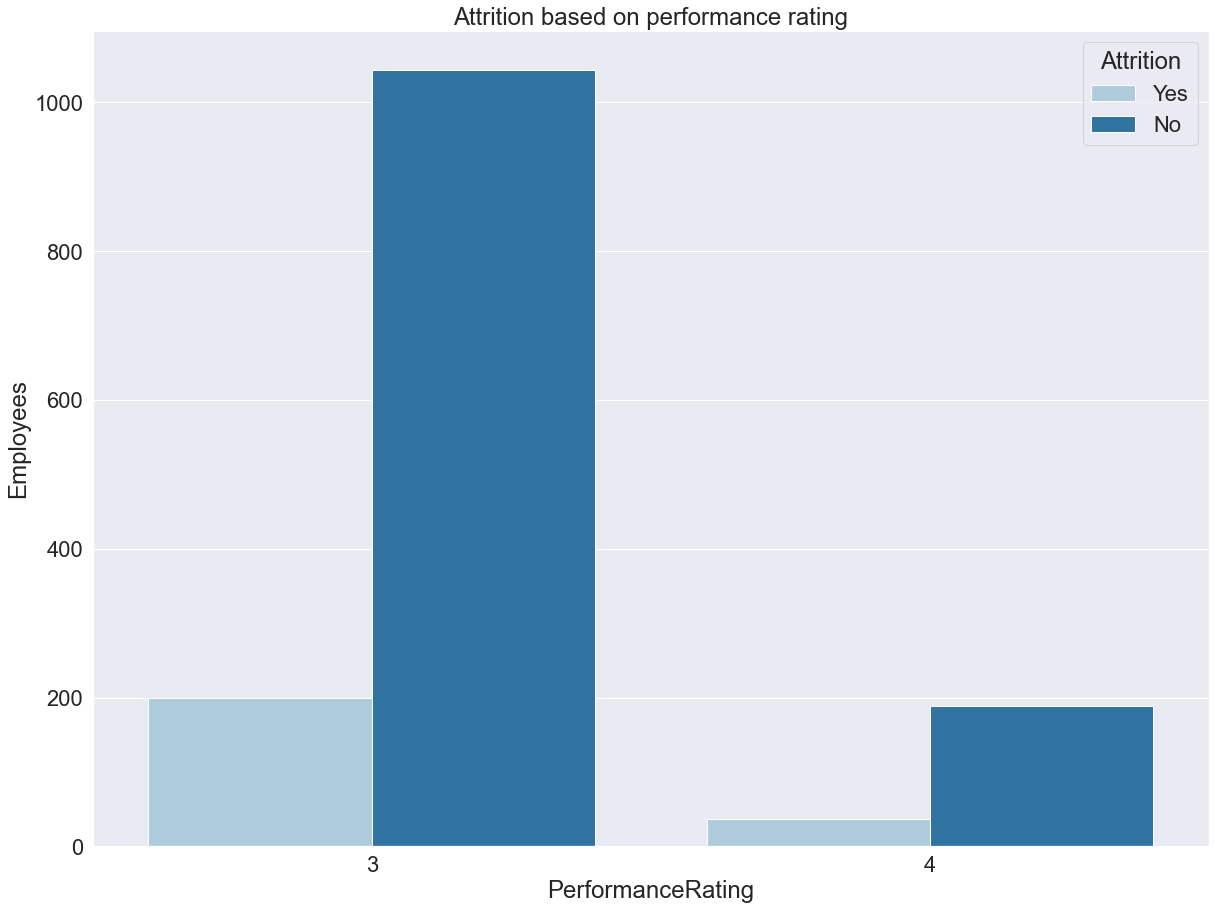

In [147]:
plt.figure(figsize=(20,15))
sns.set(font_scale=2)
g = sns.countplot(x ='PerformanceRating',data = data,palette = 'Paired', hue = 'Attrition' )
g.set(ylabel='Employees', title = 'Attrition based on performance rating')

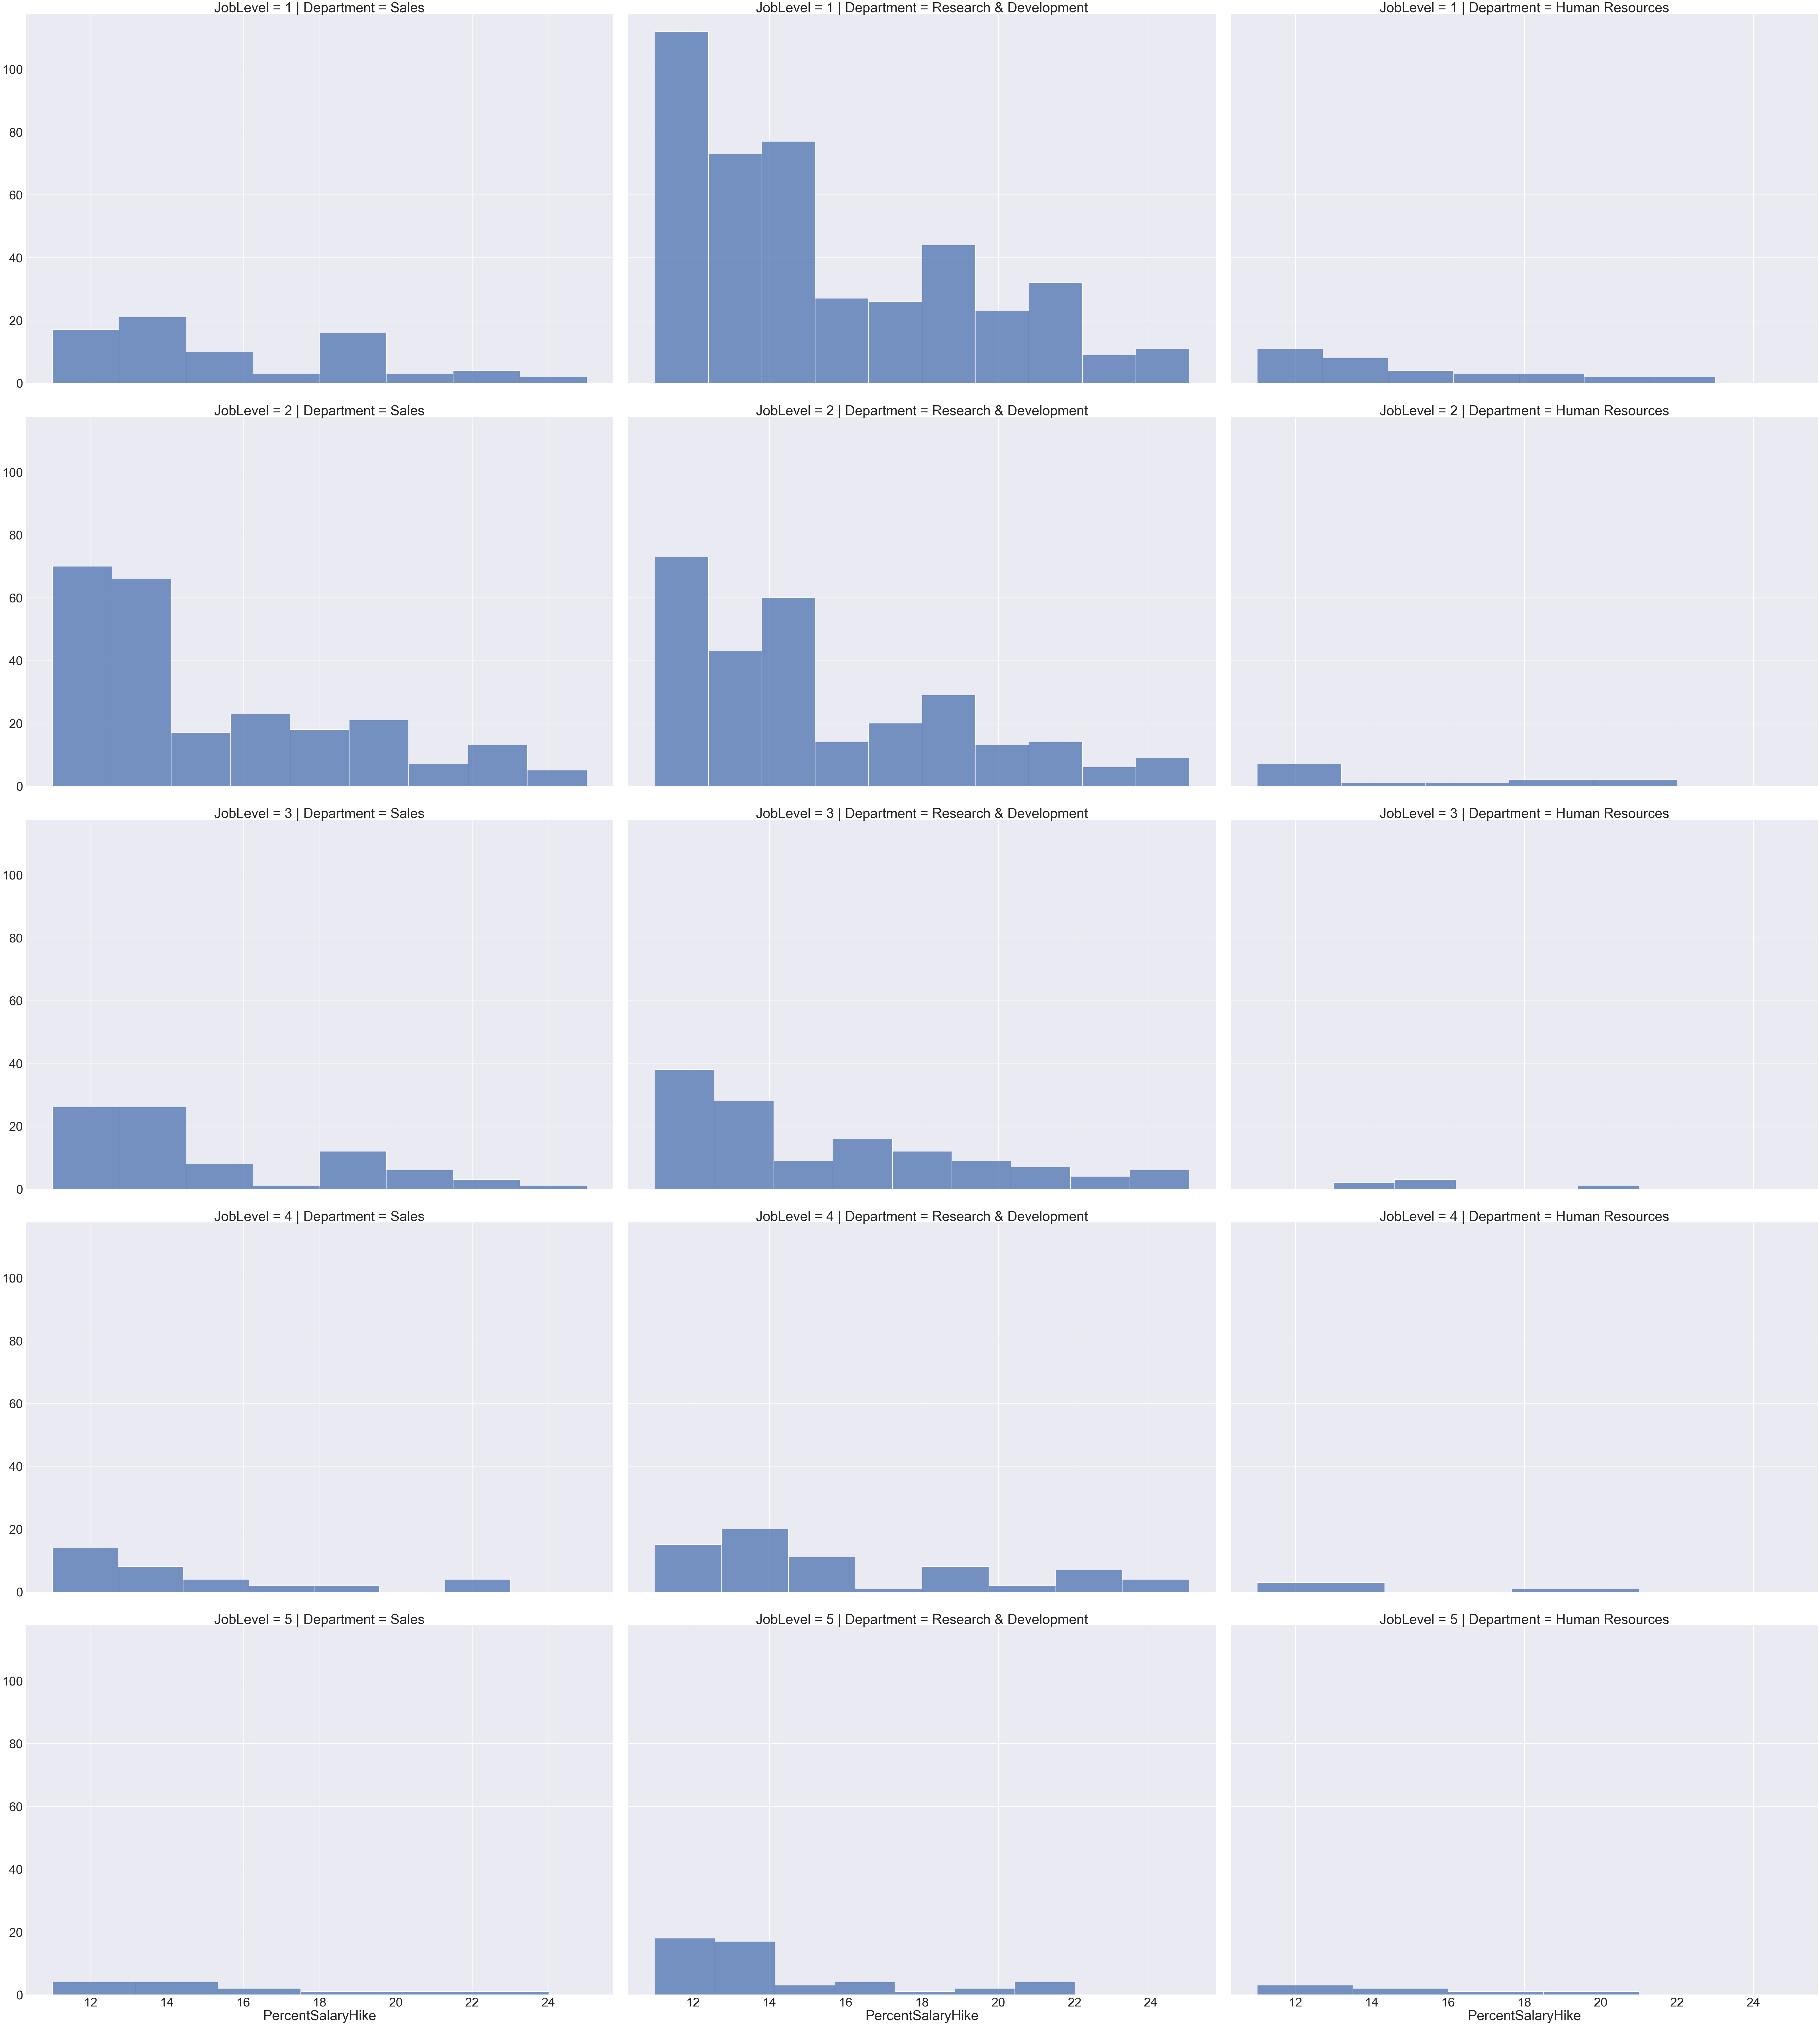

In [148]:
sns.set(font_scale=4)
g = sns.FacetGrid(data, col="Department",row = 'JobLevel',palette = 'Blues', height=20, aspect=1.5)
g.map(sns.histplot, "PercentSalaryHike")

As we can see higher the performance rating, the less chance that this employee will leave. Which is quite obvious: high performance rating tells about the productivity of the worker, which means that he is more involved in his work than the others.

As for the salary hike, we can see that overall in each department the salary hike is around 12-14%. Howevern in R&D department the average salary hike is higher than in the other departments. Especially we can see that salary growth slows down in Sales department on Middle job positions.

Thus, we can say:
* Personal development in the company affects overall the attrition
* Majority is being promoted in 1-2 years
* Trainings are being organized each 2-3 years for each department and job position
* Loyalty or number of years in the company affect directly the attrition
* Performance rating and salary hike have an influence on attrition rate
* Salary is being increased more in R&D department

Let's get an overall view by displaying a heatmap

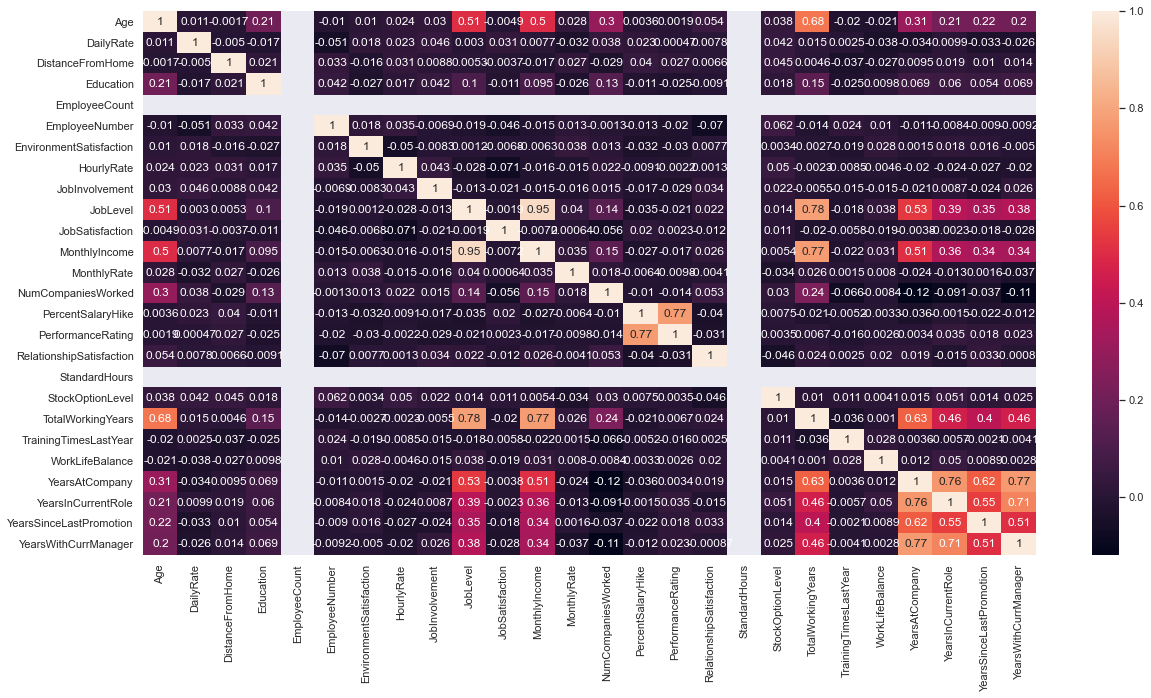

In [149]:
plt.figure(figsize=(20,10))
sns.set(font_scale=1)
corrMatrix = data.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

In general we can see most of dependencies we spotted already before.

## Modelling: predictions and features importance


Now we will use models in order to spot the most important factors which affect attrition and use them in case we will want to predict is the person will leave or stay with the company.


In [152]:

#data modifications
#drop columns which we do not need
df = data.drop(['EmployeeNumber','EmployeeCount','Over18','StandardHours'],axis=1) 
#This variables: all similar to each employee, or they are IDs

In [155]:
#Define features and target variables
X=df.drop(['Attrition'],axis=1)
#new data set with categorical variables conversion
X = pd.get_dummies(X ,drop_first=True)

target_map = {'Yes':1, 'No':0}
y=df["Attrition"].apply(lambda x: target_map[x])

In [156]:
# As we saw above, there is a significant skewed in Yes and No answers. In order to balance it we will use SMOTE method, in order to create synthetic values for training sample to balance Yes and No
#Splitting data on test and train
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

train_X, val_X, train_y, val_y = train_test_split(X,y, train_size= 0.80,random_state=0)

sm=SMOTE(random_state=0)
train_X_sm,train_y_sm, = sm.fit_resample(train_X,train_y)

In [157]:
#We will test several models
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score)
from sklearn.model_selection import GridSearchCV

#Logistic regression
lr = LogisticRegression(solver='liblinear')
lr_model = lr.fit(train_X,train_y)
lr_predict = lr_model.predict(val_X)

print("Accuracy score: {}".format(accuracy_score(val_y, lr_predict)))

Accuracy score: 0.8639455782312925


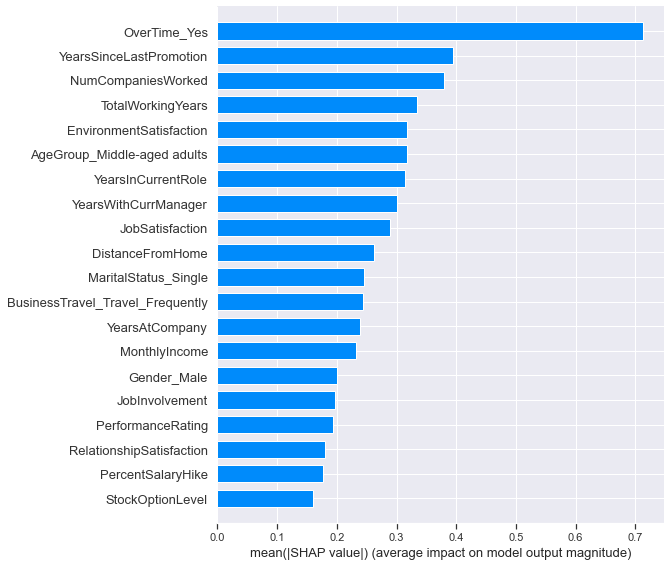

In [158]:
shap.initjs()

# Create a tree explainer and understanding the values we have 
shap_ex = shap.LinearExplainer(lr_model, val_X)
vals = shap_ex.shap_values(val_X)

# Looking at feature importance 
shap.summary_plot(vals, val_X, plot_type="bar")

In [159]:
#Random forest: looking for optimal parameters (hyper parameter tuning) and modelling
n_estimators = [int(x) for x in np.linspace(start = 30, stop = 500, num = 100)]
max_features = ['auto','sqrt']
max_depth = [2,8]
min_samples_leaf = [1,3] 
min_samples_split = [2,5] 

parameters = {'n_estimators': n_estimators,
              'max_features' : max_features,
              'max_depth': max_depth,
              'min_samples_leaf': min_samples_leaf,
              'min_samples_split': min_samples_split}

rf_model = RandomForestClassifier()
rf_grid = GridSearchCV(estimator = rf_model, param_grid=parameters, cv =3, verbose=2, n_jobs =4)

rf_grid.fit(train_X_sm,train_y_sm)


Fitting 3 folds for each of 1600 candidates, totalling 4800 fits
Accuracy score: 0.8537414965986394


In [160]:
rf_grid.best_params_

{'max_depth': 8,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 110}

In [161]:
rf_predictions = rf_grid.predict(val_X)
print("Accuracy score: {}".format(accuracy_score(val_y, rf_predictions)))

Accuracy score: 0.8537414965986394


In [162]:
#AdaBoostClassifier: looking for optimal parameters
ada = AdaBoostClassifier()
ada_model = ada.fit(train_X,train_y)
ada_predictions = ada_model.predict(val_X)
print("Accuracy score: {}".format(accuracy_score(val_y, ada_predictions)))


Accuracy score: 0.8571428571428571



## Conclusion

All models we built are rather accurate > 80% of data were predicted correctly.

According the most accurate model - logistic regression model, we can say:
1. The key factor which affects attrition is Overworking. If an employee has to stay after work often, he will probably resign. Taken into consideration that the majory of employees are married, this result is natural: people want to spend more time with their family. That is why company should introduce some kind of time management policy in order to help employees to not stay too much after work.
   It would be also interesting to know if the overwork is paid. This factor could also be very important
2. The next very important factor is Years in current role and Years since the last promotion. This is also quite easy to explain. The majority of employees would like to have a personal and professional growth in the company. If an employee keeps working on the same position for a long time, he losses interests and motivation. One of the recommendatin can be working on a company professional development program which will help employees to understand in which case they can be promoted and what they should do for that.
3. Years in the company also affects attrition. Here we can see how loyalty can affect the decision to quit. If an employee is working already several years in the same company (it would be even better if it is his first company (next factor))), he is getting used to people, his role, the way the company works. All this protects us from the uncomfortable situations, we know how to act in different situations. The company helps us to grow and we do everything to help the company gain more money. This can be a great symbiosis, which company should aim to keep by keeping an eye on each employee and pay attention to employees feedback
4. Environment satisfaction is the last factor we will review. Obviously the better the atmosphere in the company, better an employee will feel. HR department and management can consider a budget for each year on team building activities (bringing employees together and improving the atmosphere in a department), a buddy program can help new employees adapt faster and establish necessary relationships with their colleagues and the last but not least, it is very important to have a constant work with managers of the departments in order to help them dealing with conflicts, requests, and other issues by organizing trainings and small monthly meetings.


Other recommendations, as well as detailed conclusions for each of the variables can be found in the intermediate conclusions for each sections.
